<h1><center><font color='Orange'> Auto Insurance Claims </font></center></h1>

# Auto Insurance Fraud Claim Detection with Machine Learning.


## <font color='#4682B4'> Problem Statement </font>

The goal of this project is to build a model that can detect auto insurance fraud. The challenge behind fraud detection in machine learning is that frauds are far less common as compared to legit insurance claims. This type of problems is known as imbalanced class classification. 
<br>
Frauds are unethical and are losses to the company. By building a model that can classify auto insurance fraud, I am able to cut losses for the insurance company. Less losses equates to more earning.

**Relevance to businesses:** 

Imbalance class problems are common in many industries. Many a times, we are interested in a minority class against another much bigger class or classes. For instance, classification of other types of frauds, classification of defective goods, classification of at-risk teenagers, identifying high potential employees, identifying people of interest such as terrorist, just to name a few. 

**Criteria for success:**

The model should be able to classify if a claim is a fraud or not on a data set that it has not seen, accurately. This is measured by the F1 score and compared against a baseline naive prediction of F1: 0.397. The area under curve of the ROC (ROC AUC) will also be taken into consideration in model selection as a secondary criterion as it is important to distinguish between fraud and legit claims. This is because investigations into frauds can be time consuming and expensive and may even negatively affect customer experience. As a compulsory criterion, the ROC AUC must be above 0.50. On top of that, I aim to have a ROC AUC of at least 0.70.

**Background of insurance fraud**

Insurance fraud is a deliberate deception perpetrated against or by an insurance company or agent for the purpose of financial gain. Fraud may be committed at different points in the transaction by applicants, policyholders, third-party claimants, or professionals who provide services to claimants. Insurance agents and company employees may also commit insurance fraud. Common frauds include “padding,” or inflating claims; misrepresenting facts on an insurance application; submitting claims for injuries or damage that never occurred; and staging accidents.

The FBI estimates that the total cost of insurance fraud (excluding health insurance) is more than \$40 billion per year. 
Auto insurance fraud ranges from misrepresenting facts on insurance applications and inflating insurance claims to staging accidents and submitting claim forms for injuries or damage that never occurred, to false reports of stolen vehicles.

Fraud accounted for between 15 percent and 17 percent of total claims payments for auto insurance bodily injury in 2012, according to an Insurance Research Council (IRC) study. The study estimated that between \$5.6 billion and \$7.7 billion was fraudulently added to paid claims for auto insurance bodily injury payments in 2012, compared with a range of \$4.3 billion to \$5.8 billion in 2002. 

The current study aims to classify auto insurance fraud that arises from claims. The type of fraud is not disclosed in this data set and could be false reports, inflating claims, staging accidents or submitting claim forms for damages or injuries that never occurred. 

Source: https://www.iii.org/article/background-on-insurance-fraud

## <font color='#4682B4'>  Executive Summary </font>

The goal of this project is to build a model that can detect auto insurance fraud. The challenge behind fraud detection in machine learning is that frauds are far less common as compared to legit insurance claims. This type of problems is known as imbalanced class classification.

Several models were tested with different methods of handling imbalance datasets. The top models were also fitted and tested with different ensembles. 

The final fitted model is a weighted XGBoost which yielded an F1 score of 0.72 and a ROC AUC score of 0.84. The model performed far better than the baseline F1 score of 0.397 and ROC AUC target of 0.7. The model's F1 score and ROC AUC scores were the highest amongst the other models. In conclusion, the model was able to correctly distinguish between fraud claims and legit claims with high accuracy. 

Prior to modeling, the data was clean and exploratory data analysis was conducted. After which, the data was pre-processed for the modeling. After modeling, the models were evaluated, and the best fitted model was selected using the F1 score and the ROC AUC score. The performance of the final fitted model was discussed in further details and its top features were displayed. The project concluded by reiterated the importance of the research and what had been done and finally, with some limitations. 


### Contents:
- Problem Statement
- Executive Summary
- Data Dictionary
- About the Dataset
- Data Cleaning
- Exploratory Data Analysis
- Losses by Claims
- Pre-processing
- Baseline Score
- Modeling
- Ensemble Models
- Evaluation
- Final Model: Weighted XGBoost
- Conclusion and Limitations


## <font color='#4682B4'>  Business Problem / Problem Statement </font>
<h3> Description:- </h3>

The goal of this project is to build a model that can detect auto insurance fraud. The challenge behind fraud detection in machine learning is that frauds are far less common as compared to legit insurance claims. This type of problems is known as imbalanced class classification.

Frauds are unethical and are losses to the company. By building a model that can classify auto insurance fraud, I am able to cut losses for the insurance company. Less losses equates to more earning.

## <font color='#4682B4'>  Data Dictionary </font>

<h3> <font color='#4682B4'>  About the Dataset </font> </h3>

Data source: https://www.kaggle.com/roshansharma/insurance-claim

The inspiration for this project was to perform classification on imbalance class data sets, in particular fraud. Fraud datasets are very hard to come by and often unlabelled due to its sensitive nature. 

The current data set was labelled with n=1000 samples. Unlike many other data sets, this one was less popular with only the author and one other having a notebook of it on Kaggle, making this data set one that was rather novel in nature. The data set consist of 1000 auto incidents and auto insurance claims from Ohio, Illinois and Indiana from 01 January 2015 to 01 March 2015. Before any cleaning or feature engineering, the data set has a total of 39 variables. It is not stated if this data is from multiple insurance companies or just one company. However, throughout the report, "the insurance company" will be used to refer to the origin of this data.

The obvious con of this data set is the small sample size. However, there are still many companies who do not have big data sets. The ability to work with what is available is crucial for any company looking to transition into leveraging data science. In the 2017 MIT tech review, EmTech presentation, Professor Andrew Ng penned a cyclical diagram on the white board and explained that many companies start off with some small data and develop a product which have users, which in turn leads to generation of more products. In similar vein, companies may start off with a small data set and build towards a bigger data set as time goes by. Compared to a company that waits for the day when it has a huge data set, the company that started with a small data set and worked on it will more likely succeed earlier in its data science journey and reap its rewards. 

## <font color='#4682B4'>  Loading Required Libraries</font>

In [140]:
import numpy as np
import pandas as pd
#pip install mlens

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import pointbiserialr, stats
from imblearn.over_sampling import SMOTE, ADASYN 

from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, KFold, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

from xgboost import XGBClassifier
from xgboost import plot_importance

from mlens.ensemble import SuperLearner
from mlens.visualization import corrmat 

from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix


%config InlineBackend.figure_format = 'retina'
%matplotlib inline


pd.set_option('display.max_columns', 2000)
pd.set_option('display.max_rows', 500)

<h2> <font color='#4682B4'> Loading the Data-set </font> </h2> 

In [2]:
Data = pd.read_csv(r"D:\Projects\8.Auto Insurance Claims\insurance_claims.csv",sep=',')
Data

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       2014-10-17           OH   
1                   228   42         342868       2006-06-27           IN   
2                   134   29         687698       2000-09-06           OH   
3                   256   41         227811       1990-05-25           IL   
4                   228   44         367455       2014-06-06           IL   
5                   256   39         104594       2006-10-12           OH   
6                   137   34         413978       2000-06-04           IN   
7                   165   37         429027       1990-02-03           IL   
8                    27   33         485665       1997-02-05           IL   
9                   212   42         636550       2011-07-25           IL   
10                  235   42         543610       2002-05-26           OH   
11                  447   61         214618       1999-05-29           OH   
12                   60   23         842643       1997-11-20           OH   
13                  121   34         626808       2012-10-26           OH   
14                  180   38         644081       1998-12-28           OH   
15                  473   58         892874       1992-10-19           IN   
16                   70   26         558938       2005-06-08           OH   
17                  140   31         275265       2004-11-15           IN   
18                  160   37         921202       2014-12-28           OH   
19                  196   39         143972       1992-08-02           IN   
20                  460   62         183430       2002-06-25           IN   
21                  217   41         431876       2005-11-27           IL   
22                  370   55         285496       1994-05-27           IL   
23                  413   55         115399       1991-02-08           IN   
24                  237   40         736882       1996-02-02           IN   
25                    8   35         699044       2013-12-05           OH   
26                  257   43         863236       1990-09-20           IN   
27                  202   34         608513       2002-07-18           IN   
28                  224   40         914088       1990-02-08           OH   
29                  241   45         596785       2014-03-04           IL   
..                  ...  ...            ...              ...          ...   
970                 213   35         844129       1990-09-20           OH   
971                  79   25         732169       2000-11-05           OH   
972                 232   44         221854       1994-10-03           OH   
973                 230   37         776950       2005-04-11           IL   
974                 234   41         291006       1990-05-16           IN   
975                 240   40         845751       2004-09-11           IN   
976                 143   33         889764       1993-11-30           OH   
977                 266   42         929306       2003-03-06           IN   
978                  89   32         515457       1996-12-18           IN   
979                 229   37         556270       1995-02-21           IN   
980                 245   40         908935       2009-12-11           IL   
981                  50   44         525862       2000-10-18           OH   
982                 230   43         490514       2007-02-09           IN   
983                  17   39         774895       2006-10-28           IL   
984                 163   36         974522       2000-01-27           IN   
985                  29   32         669809       2002-04-05           OH   
986                 232   42         182953       2013-04-30           IN   
987                 235   39         836349       2013-05-01           IL   
988                 295   46         591269       1999-01-09           IN   
989                  22   21         550127       2007-07-04           IN   
9

### <font color='gray'> Understand the data </font>

In [3]:
Data.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip ...  police_report_available total_claim_amount injury_claim  \
0       466132 ...                      YES              71610         6510   
1       468176 ...                        ?               5070          780   
2       430632 ...                       NO              34650         7700   
3       608117 ...                       NO              63400         6340   
4       610706 ...                       NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

In [4]:
Data

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       2014-10-17           OH   
1                   228   42         342868       2006-06-27           IN   
2                   134   29         687698       2000-09-06           OH   
3                   256   41         227811       1990-05-25           IL   
4                   228   44         367455       2014-06-06           IL   
5                   256   39         104594       2006-10-12           OH   
6                   137   34         413978       2000-06-04           IN   
7                   165   37         429027       1990-02-03           IL   
8                    27   33         485665       1997-02-05           IL   
9                   212   42         636550       2011-07-25           IL   
10                  235   42         543610       2002-05-26           OH   
11                  447   61         214618       1999-05-29           OH   
12                   60   23         842643       1997-11-20           OH   
13                  121   34         626808       2012-10-26           OH   
14                  180   38         644081       1998-12-28           OH   
15                  473   58         892874       1992-10-19           IN   
16                   70   26         558938       2005-06-08           OH   
17                  140   31         275265       2004-11-15           IN   
18                  160   37         921202       2014-12-28           OH   
19                  196   39         143972       1992-08-02           IN   
20                  460   62         183430       2002-06-25           IN   
21                  217   41         431876       2005-11-27           IL   
22                  370   55         285496       1994-05-27           IL   
23                  413   55         115399       1991-02-08           IN   
24                  237   40         736882       1996-02-02           IN   
25                    8   35         699044       2013-12-05           OH   
26                  257   43         863236       1990-09-20           IN   
27                  202   34         608513       2002-07-18           IN   
28                  224   40         914088       1990-02-08           OH   
29                  241   45         596785       2014-03-04           IL   
..                  ...  ...            ...              ...          ...   
970                 213   35         844129       1990-09-20           OH   
971                  79   25         732169       2000-11-05           OH   
972                 232   44         221854       1994-10-03           OH   
973                 230   37         776950       2005-04-11           IL   
974                 234   41         291006       1990-05-16           IN   
975                 240   40         845751       2004-09-11           IN   
976                 143   33         889764       1993-11-30           OH   
977                 266   42         929306       2003-03-06           IN   
978                  89   32         515457       1996-12-18           IN   
979                 229   37         556270       1995-02-21           IN   
980                 245   40         908935       2009-12-11           IL   
981                  50   44         525862       2000-10-18           OH   
982                 230   43         490514       2007-02-09           IN   
983                  17   39         774895       2006-10-28           IL   
984                 163   36         974522       2000-01-27           IN   
985                  29   32         669809       2002-04-05           OH   
986                 232   42         182953       2013-04-30           IN   
987                 235   39         836349       2013-05-01           IL   
988                 295   46         591269       1999-01-09           IN   
989                  22   21         550127       2007-07-04           IN   
9

In [5]:
Data.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  _c39  
count     1000.000000    1000.000000  1000.000000   0.0  
mean      7399.570000   37928.950000  2005.103000   NaN  
std       4824.726179   18886.252893     6.015861   NaN  
min          0.000000      70.000000  1995.000000   NaN  
25%       4445.000000   30292.500000  2000.000000   NaN  
50%       6750.000000   42100.000000  2005.000000   NaN  
75%      10885.000000   50822.500000  2010.000000   NaN  
max      23670.000000   79560.000000  2015.000000   NaN

In [6]:
Data.describe(include='all')

months_as_customer          age  policy_number policy_bind_date  \
count          1000.000000  1000.000000    1000.000000             1000   
unique                 NaN          NaN            NaN              951   
top                    NaN          NaN            NaN       1992-08-05   
freq                   NaN          NaN            NaN                3   
mean            203.954000    38.948000  546238.648000              NaN   
std             115.113174     9.140287  257063.005276              NaN   
min               0.000000    19.000000  100804.000000              NaN   
25%             115.750000    32.000000  335980.250000              NaN   
50%             199.500000    38.000000  533135.000000              NaN   
75%             276.250000    44.000000  759099.750000              NaN   
max             479.000000    64.000000  999435.000000              NaN   

       policy_state policy_csl  policy_deductable  policy_annual_premium  \
count          1000       1000        1000.000000            1000.000000   
unique            3          3                NaN                    NaN   
top              OH    250/500                NaN                    NaN   
freq            352        351                NaN                    NaN   
mean            NaN        NaN        1136.000000            1256.406150   
std             NaN        NaN         611.864673             244.167395   
min             NaN        NaN         500.000000             433.330000   
25%             NaN        NaN         500.000000            1089.607500   
50%             NaN        NaN        1000.000000            1257.200000   
75%             NaN        NaN        2000.000000            1415.695000   
max             NaN        NaN        2000.000000            2047.590000   

        umbrella_limit    insured_zip ...  police_report_available  \
count     1.000000e+03    1000.000000 ...                     1000   
unique             NaN            NaN ...                        3   
top                NaN            NaN ...                       NO   
freq               NaN            NaN ...                      343   
mean      1.101000e+06  501214.488000 ...                      NaN   
std       2.297407e+06   71701.610941 ...                      NaN   
min      -1.000000e+06  430104.000000 ...                      NaN   
25%       0.000000e+00  448404.500000 ...                      NaN   
50%       0.000000e+00  466445.500000 ...                      NaN   
75%       0.000000e+00  603251.000000 ...                      NaN   
max       1.000000e+07  620962.000000 ...                      NaN   

       total_claim_amount  injury_claim property_claim vehicle_claim  \
count          1000.00000   1000.000000    1000.000000   1000.000000   
unique                NaN           NaN            NaN           NaN   
top                   NaN           NaN            NaN           NaN   
freq                  NaN           NaN            NaN           NaN   
mean          52761.94000   7433.420000    7399.570000  37928.950000   
std           26401.53319   4880.951853    4824.726179  18886.252893   
min             100.00000      0.000000       0.000000     70.000000   
25%           41812.50000   4295.000000    4445.000000  30292.500000   
50%           58055.00000   6775.000000    6750.000000  42100.000000   
75%           70592.50000  11305.000000   10885.000000  50822.500000   
max          114920.00000  21450.000000   23670.000000  79560.000000   

        auto_make  auto_model    auto_year fraud_reported _c39  
count        1000        1000  1000.000000           1000  0.0  
unique         14          39          NaN              2  NaN  
top          Saab         RAM          NaN              N  NaN  
freq           80          43          NaN            753  NaN  
mean          NaN         NaN  2005.103000            NaN  NaN  
std           NaN         NaN     6.015861            NaN  NaN  
min           NaN         NaN  19

In [7]:
# Checing the data information.
# Checking wheather data is missing or not, data types, and coulmns name.
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
months_as_customer             1000 non-null int64
age                            1000 non-null int64
policy_number                  1000 non-null int64
policy_bind_date               1000 non-null object
policy_state                   1000 non-null object
policy_csl                     1000 non-null object
policy_deductable              1000 non-null int64
policy_annual_premium          1000 non-null float64
umbrella_limit                 1000 non-null int64
insured_zip                    1000 non-null int64
insured_sex                    1000 non-null object
insured_education_level        1000 non-null object
insured_occupation             1000 non-null object
insured_hobbies                1000 non-null object
insured_relationship           1000 non-null object
capital-gains                  1000 non-null int64
capital-loss                   1000 non-null int64
incident_date    

__Here, Feature _c39 is null column,so we will drop it from the train data and also there is no other missing column present.__

In [8]:
#Checking the shape of the data
Data.shape

(1000, 40)

In [9]:
# read the first five rows
Data.head() 

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip ...  police_report_available total_claim_amount injury_claim  \
0       466132 ...                      YES              71610         6510   
1       468176 ...                        ?               5070          780   
2       430632 ...                       NO              34650         7700   
3       608117 ...                       NO              63400         6340   
4       610706 ...                       NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

In [10]:
# read the last five rows
Data.tail() 

months_as_customer  age  policy_number policy_bind_date policy_state  \
995                   3   38         941851       1991-07-16           OH   
996                 285   41         186934       2014-01-05           IL   
997                 130   34         918516       2003-02-17           OH   
998                 458   62         533940       2011-11-18           IL   
999                 456   60         556080       1996-11-11           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip ...  police_report_available total_claim_amount injury_claim  \
995       431289 ...                        ?              87200        17440   
996       608177 ...                        ?             108480        18080   
997       442797 ...                      YES              67500         7500   
998       441714 ...                      YES              46980         5220   
999       612260 ...                        ?               5060          460   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
995           8720         61040       Honda      Accord      2006   
996          18080         72320  Volkswagen      Passat      2015   
997           7500         52500      Suburu     Impreza      1996   
998           5220         36540        Audi          A5      1998   
999            920          3680    Mercedes        E400      2007   

    fraud_reported _c39  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[5 rows x 40 columns]

In [11]:
# return an array of column names
Data.columns.values 

array(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_date', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage',
       'bodily_injuries', 'witnesses', 'police_report_available',
       'total_claim_amount', 'injury_claim', 'property_claim',
       'vehicle_claim', 'auto_make', 'auto_model', 'auto_year',
       'fraud_reported', '_c39'], dtype=object)

In [12]:
Data.columns.values.tolist()  # return a list of column names

['months_as_customer',
 'age',
 'policy_number',
 'policy_bind_date',
 'policy_state',
 'policy_csl',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'capital-gains',
 'capital-loss',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'property_damage',
 'bodily_injuries',
 'witnesses',
 'police_report_available',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_make',
 'auto_model',
 'auto_year',
 'fraud_reported',
 '_c39']

In [13]:
# Checking the columns name
Data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [14]:
# Cheacking data types
Data.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [15]:
# Cheacking numeric values
Data._get_numeric_data()

months_as_customer  age  policy_number  policy_deductable  \
0                   328   48         521585               1000   
1                   228   42         342868               2000   
2                   134   29         687698               2000   
3                   256   41         227811               2000   
4                   228   44         367455               1000   
5                   256   39         104594               1000   
6                   137   34         413978               1000   
7                   165   37         429027               1000   
8                    27   33         485665                500   
9                   212   42         636550                500   
10                  235   42         543610                500   
11                  447   61         214618               2000   
12                   60   23         842643                500   
13                  121   34         626808               1000   
14                  180   38         644081               2000   
15                  473   58         892874               2000   
16                   70   26         558938               1000   
17                  140   31         275265                500   
18                  160   37         921202                500   
19                  196   39         143972               2000   
20                  460   62         183430               1000   
21                  217   41         431876               2000   
22                  370   55         285496               2000   
23                  413   55         115399               2000   
24                  237   40         736882               1000   
25                    8   35         699044               2000   
26                  257   43         863236               2000   
27                  202   34         608513                500   
28                  224   40         914088               2000   
29                  241   45         596785               2000   
..                  ...  ...            ...                ...   
970                 213   35         844129                500   
971                  79   25         732169                500   
972                 232   44         221854               2000   
973                 230   37         776950               1000   
974                 234   41         291006                500   
975                 240   40         845751                500   
976                 143   33         889764               1000   
977                 266   42         929306                500   
978                  89   32         515457               1000   
979                 229   37         556270               1000   
980                 245   40         908935               1000   
981                  50   44         525862               2000   
982                 230   43         490514               2000   
983                  17   39         774895               1000   
984                 163   36         974522               1000   
985                  29   32         669809               1000   
986                 232   42         182953                500   
987                 235   39         836349               2000   
988                 295   46         591269                500   
989                  22   21         550127               1000   
990                 286   43         663190                500   
991                 257   44         109392               1000   
992                  94   26         215278                500   
993                 124   28         674570               1000   
994                 141   30         681486               1000   
995                   3   38         941851               1000   
996                 285   41         186934               1000   
997                 130   34         918516                500   
998                 458   62         533940  

In [16]:
# Checking numeric and categorical columns or variables
numCols = Data.select_dtypes("number").columns
catCols = Data.select_dtypes("object").columns
numCols= list(set(numCols))
catCols= list(set(catCols))

In [17]:
numCols

['property_claim',
 'age',
 'incident_hour_of_the_day',
 'capital-loss',
 'injury_claim',
 'witnesses',
 'months_as_customer',
 'policy_annual_premium',
 'total_claim_amount',
 '_c39',
 'umbrella_limit',
 'capital-gains',
 'vehicle_claim',
 'policy_deductable',
 'number_of_vehicles_involved',
 'auto_year',
 'bodily_injuries',
 'policy_number',
 'insured_zip']

In [18]:
catCols

['collision_type',
 'incident_state',
 'incident_type',
 'auto_make',
 'policy_bind_date',
 'fraud_reported',
 'insured_sex',
 'incident_location',
 'policy_state',
 'incident_date',
 'incident_city',
 'police_report_available',
 'authorities_contacted',
 'insured_hobbies',
 'incident_severity',
 'policy_csl',
 'insured_education_level',
 'insured_relationship',
 'property_damage',
 'auto_model',
 'insured_occupation']

## <font color='gray'> Check Unique Values </font>

In [19]:
Data.insured_education_level.unique() # Checking unique values from insured_education_level column

array(['MD', 'PhD', 'Associate', 'Masters', 'High School', 'College',
       'JD'], dtype=object)

In [20]:
Data.authorities_contacted.unique()  # Checking unique values from authorities_contacted column

array(['Police', 'None', 'Fire', 'Other', 'Ambulance'], dtype=object)

OR

In [21]:
# for col in Data:
#     print(Data[col].unique())

df_dict = dict(zip([i for i in Data.columns] , [pd.DataFrame(Data[i].unique(), columns=[i]) for i in Data.columns]))

In [22]:
df_dict['insured_education_level']

insured_education_level
0                      MD
1                     PhD
2               Associate
3                 Masters
4             High School
5                 College
6                      JD

In [23]:
df_dict['authorities_contacted']

authorities_contacted
0                Police
1                  None
2                  Fire
3                 Other
4             Ambulance

OR

In [24]:
Data.describe(include='all').loc['unique', :]

months_as_customer              NaN
age                             NaN
policy_number                   NaN
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable               NaN
policy_annual_premium           NaN
umbrella_limit                  NaN
insured_zip                     NaN
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   NaN
capital-loss                    NaN
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day        NaN
number_of_vehicles_involved     NaN
property_damage             

OR

In [25]:
for col in list(Data):
    print(col)
    print(Data[col].unique())

months_as_customer
[328 228 134 256 137 165  27 212 235 447  60 121 180 473  70 140 160 196
 460 217 370 413 237   8 257 202 224 241  64 166 155 114 149 147  62 289
 431 199  79 116  37 106 269 265 163 355 175 192 430  91 223 195  22 439
  94  11 151 154 245 119 215 295 254 107 478 128 338 271 222 120 270 319
 194 227 244  78 200 284 275 153  31  41 127  61 207 219  80 325  29 239
 279 350 464 118 298  87 261 453 210 168 390 258 225 164 255 206 203 211
 274  81 280 112  24  93 171 124 287 122 398 214 209  82 193 288 104 101
 375 461 428  45 136 216 278 108  14 276  47  73 294 324  53 426 111  86
 296 125 177 238 449 252 359  19 285  30 342 468 343 404  63 335 142 272
  69  38 281 246 330 362 371 377 172  99 249 190 174  95   2 117 242 440
  20 208 156 232  84 394  35 369 332 243 264  32 259 186 201 436 189 105
  88  40  59  39 123 231 247  48 267 286 253  10 158   1  85 233 266  97
 399 305 129 283  96 176 159 290 299  66 334 429  15 230 250  65 475  77
 229 110 292 451 150 291 162 309

OR

In [26]:
import numpy as np
for col in list(Data):
    print(col)
    print(np.sort(Data[col].unique()))

months_as_customer
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  19  20  22  24  25  26  27  29  30  31  32  33  34  35  36  37  38  39
  40  41  43  45  46  47  48  50  51  53  54  55  56  57  58  59  60  61
  62  63  64  65  66  67  69  70  72  73  75  76  77  78  79  80  81  82
  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100
 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136
 137 138 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155
 156 157 158 159 160 161 162 163 164 165 166 167 168 169 171 172 173 174
 175 176 177 178 179 180 182 183 184 185 186 187 188 189 190 191 192 193
 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211
 212 213 214 215 216 217 218 219 220 222 223 224 225 227 228 229 230 231
 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 249 250
 251 252 253 254 255 256 257 258

OR

In [27]:
for i in Data.columns:
    print(Data[i].unique())

[328 228 134 256 137 165  27 212 235 447  60 121 180 473  70 140 160 196
 460 217 370 413 237   8 257 202 224 241  64 166 155 114 149 147  62 289
 431 199  79 116  37 106 269 265 163 355 175 192 430  91 223 195  22 439
  94  11 151 154 245 119 215 295 254 107 478 128 338 271 222 120 270 319
 194 227 244  78 200 284 275 153  31  41 127  61 207 219  80 325  29 239
 279 350 464 118 298  87 261 453 210 168 390 258 225 164 255 206 203 211
 274  81 280 112  24  93 171 124 287 122 398 214 209  82 193 288 104 101
 375 461 428  45 136 216 278 108  14 276  47  73 294 324  53 426 111  86
 296 125 177 238 449 252 359  19 285  30 342 468 343 404  63 335 142 272
  69  38 281 246 330 362 371 377 172  99 249 190 174  95   2 117 242 440
  20 208 156 232  84 394  35 369 332 243 264  32 259 186 201 436 189 105
  88  40  59  39 123 231 247  48 267 286 253  10 158   1  85 233 266  97
 399 305 129 283  96 176 159 290 299  66 334 429  15 230 250  65 475  77
 229 110 292 451 150 291 162 309 396 273 419 315  7

OR

In [28]:
# Get a series object containing the count of unique elements
# in each column of dataframe
uniqueValues = Data.nunique()
uniqueValues

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

OR

In [29]:
# Count unique elements in each column including NaN
uniqueValues = Data.nunique(dropna=False)
print("Count Unique values in each column including NaN")
print(uniqueValues)

Count Unique values in each column including NaN
months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehic

OR

In [30]:
# Get unique elements in multiple columns i.e. Name & Age
uniqueValues = (Data['months_as_customer'].append(Data['age'])).unique()
print('Unique elements in column "months_as_customer" & "age" :')
print(uniqueValues)

Unique elements in column "months_as_customer" & "age" :
[328 228 134 256 137 165  27 212 235 447  60 121 180 473  70 140 160 196
 460 217 370 413 237   8 257 202 224 241  64 166 155 114 149 147  62 289
 431 199  79 116  37 106 269 265 163 355 175 192 430  91 223 195  22 439
  94  11 151 154 245 119 215 295 254 107 478 128 338 271 222 120 270 319
 194 227 244  78 200 284 275 153  31  41 127  61 207 219  80 325  29 239
 279 350 464 118 298  87 261 453 210 168 390 258 225 164 255 206 203 211
 274  81 280 112  24  93 171 124 287 122 398 214 209  82 193 288 104 101
 375 461 428  45 136 216 278 108  14 276  47  73 294 324  53 426 111  86
 296 125 177 238 449 252 359  19 285  30 342 468 343 404  63 335 142 272
  69  38 281 246 330 362 371 377 172  99 249 190 174  95   2 117 242 440
  20 208 156 232  84 394  35 369 332 243 264  32 259 186 201 436 189 105
  88  40  59  39 123 231 247  48 267 286 253  10 158   1  85 233 266  97
 399 305 129 283  96 176 159 290 299  66 334 429  15 230 250  65 47

## <font color='gray'> Check Missing Values </font>

In [31]:
missing_stats = []

for col in Data.columns:
    missing_stats.append((col, Data[col].nunique(), Data[col].isnull().sum() * 100 / Data.shape[0], Data[col].value_counts(normalize=True, dropna=False).values[0] * 100, Data[col].dtype))
    
stats_df = pd.DataFrame(missing_stats, columns=['feature', 'unique_values', 'percent_missing', 'percent_biggest_cat', 'type'])
stats_df.sort_values('percent_missing', ascending=False)

feature  unique_values  percent_missing  \
39                         _c39              0            100.0   
1                           age             46              0.0   
22               incident_state              7              0.0   
23                incident_city              7              0.0   
24            incident_location           1000              0.0   
25     incident_hour_of_the_day             24              0.0   
26  number_of_vehicles_involved              4              0.0   
27              property_damage              3              0.0   
28              bodily_injuries              3              0.0   
29                    witnesses              4              0.0   
30      police_report_available              3              0.0   
31           total_claim_amount            763              0.0   
32                 injury_claim            638              0.0   
33               property_claim            626              0.0   
34                vehicle_claim            726              0.0   
35                    auto_make             14              0.0   
36                   auto_model             39              0.0   
37                    auto_year             21              0.0   
38               fraud_reported              2              0.0   
21        authorities_contacted              5              0.0   
0            months_as_customer            391              0.0   
19               collision_type              4              0.0   
9                   insured_zip            995              0.0   
2                 policy_number           1000              0.0   
3              policy_bind_date            951              0.0   
4                  policy_state              3              0.0   
5                    policy_csl              3              0.0   
6             policy_deductable              3              0.0   
7         policy_annual_premium            991              0.0   
8                umbrella_limit             11              0.0   
10                  insured_sex              2              0.0   
18                incident_type              4              0.0   
11      insured_education_level              7              0.0   
12           insured_occupation             14              0.0   
13              insured_hobbies             20              0.0   
14         insured_relationship              6              0.0   
15                capital-gains            338              0.0   
16                 capital-loss            354              0.0   
17                incident_date             60              0.0   
20            incident_severity              4              0.0   

    percent_biggest_cat     type  
39                100.0  float64  
1                   4.9    int64  
22                 26.2   object  
23                 15.7   object  
24                  0.1   object  
25                  5.4    int64  
26                 58.1    int64  
27                 36.0   object  
28                 34.0    int64  
29                 25.8    int64  
30                 34.3   object  
31                  0.5    int64  
32                  2.5    int64  
33                  1.9    int64  
34                  0.7    int64  
35                  8.0   object  
36                  4.3   object  
37                  5.6    int64  
38                 75.3   object  
21                 29.2   object  
0                   0.8    int64  
19                 29.2   object  
9                   0.2    int64  
2                   0.1    int64  
3                   0.3   object  
4                  35.2   object  
5                  35.1   object  
6                  35.1    int64  
7                   0.2  float64  
8                  79.8    int64  
10                 53.7   object  
18                 41.9   object  
11                 16.1   object  
12                  9.3   object  
13                  6.4   object  
14              

In [32]:
# checking missing values
Data.isnull()

months_as_customer    age  policy_number  policy_bind_date  policy_state  \
0                 False  False          False             False         False   
1                 False  False          False             False         False   
2                 False  False          False             False         False   
3                 False  False          False             False         False   
4                 False  False          False             False         False   
5                 False  False          False             False         False   
6                 False  False          False             False         False   
7                 False  False          False             False         False   
8                 False  False          False             False         False   
9                 False  False          False             False         False   
10                False  False          False             False         False   
11                False  False          False             False         False   
12                False  False          False             False         False   
13                False  False          False             False         False   
14                False  False          False             False         False   
15                False  False          False             False         False   
16                False  False          False             False         False   
17                False  False          False             False         False   
18                False  False          False             False         False   
19                False  False          False             False         False   
20                False  False          False             False         False   
21                False  False          False             False         False   
22                False  False          False             False         False   
23                False  False          False             False         False   
24                False  False          False             False         False   
25                False  False          False             False         False   
26                False  False          False             False         False   
27                False  False          False             False         False   
28                False  False          False             False         False   
29                False  False          False             False         False   
..                  ...    ...            ...               ...           ...   
970               False  False          False             False         False   
971               False  False          False             False         False   
972               False  False          False             False         False   
973               False  False          False             False         False   
974               False  False          False             False         False   
975               False  False          False             False         False   
976               False  False          False             False         False   
977               False  False          False             False         False   
978               False  False          False             False         False   
979               False  False          False             False         False   
980               False  False          False             False         False   
981               False  False          False             False         False   
982               False  False          False             False         False   
983               False  False          False             False         False   
984               False  False          False             False         False   
985               False  False          False             False         False   
986               False  False          False             False         False   
987               False  False      

In [33]:
# checking non-missing values
# count the number of NaN in this dataframe using dataframe.isnull()
Data.notnull()

months_as_customer   age  policy_number  policy_bind_date  policy_state  \
0                  True  True           True              True          True   
1                  True  True           True              True          True   
2                  True  True           True              True          True   
3                  True  True           True              True          True   
4                  True  True           True              True          True   
5                  True  True           True              True          True   
6                  True  True           True              True          True   
7                  True  True           True              True          True   
8                  True  True           True              True          True   
9                  True  True           True              True          True   
10                 True  True           True              True          True   
11                 True  True           True              True          True   
12                 True  True           True              True          True   
13                 True  True           True              True          True   
14                 True  True           True              True          True   
15                 True  True           True              True          True   
16                 True  True           True              True          True   
17                 True  True           True              True          True   
18                 True  True           True              True          True   
19                 True  True           True              True          True   
20                 True  True           True              True          True   
21                 True  True           True              True          True   
22                 True  True           True              True          True   
23                 True  True           True              True          True   
24                 True  True           True              True          True   
25                 True  True           True              True          True   
26                 True  True           True              True          True   
27                 True  True           True              True          True   
28                 True  True           True              True          True   
29                 True  True           True              True          True   
..                  ...   ...            ...               ...           ...   
970                True  True           True              True          True   
971                True  True           True              True          True   
972                True  True           True              True          True   
973                True  True           True              True          True   
974                True  True           True              True          True   
975                True  True           True              True          True   
976                True  True           True              True          True   
977                True  True           True              True          True   
978                True  True           True              True          True   
979                True  True           True              True          True   
980                True  True           True              True          True   
981                True  True           True              True          True   
982                True  True           True              True          True   
983                True  True           True              True          True   
984                True  True           True              True          True   
985                True  True           True              True          True   
986                True  True           True              True          True   
987                True  True           True              True          True   
988  

In [34]:
# only want to know if there are any missing values
Data.isnull().values.any()  

True

In [35]:
# knowling number of non-missing values for each variable
Data.notnull().sum() 

months_as_customer             1000
age                            1000
policy_number                  1000
policy_bind_date               1000
policy_state                   1000
policy_csl                     1000
policy_deductable              1000
policy_annual_premium          1000
umbrella_limit                 1000
insured_zip                    1000
insured_sex                    1000
insured_education_level        1000
insured_occupation             1000
insured_hobbies                1000
insured_relationship           1000
capital-gains                  1000
capital-loss                   1000
incident_date                  1000
incident_type                  1000
collision_type                 1000
incident_severity              1000
authorities_contacted          1000
incident_state                 1000
incident_city                  1000
incident_location              1000
incident_hour_of_the_day       1000
number_of_vehicles_involved    1000
property_damage             

In [36]:
# Count total NaN at each column in DataFrame
Data.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [37]:
# knowing how many missing values in the data
# Count all NaN in a DataFrame (both columns & Rows)
Data.isnull().sum().sum() 

1000

OR

In [38]:
# OR By using these we can Cheacking missing values
print(Data.isnull().values.sum())

1000


In [39]:
# only want to know if there are any missing values in _c39
Data["_c39"].isnull().values.any() 

True

In [40]:
# return the number of missing values in _c39
Data["_c39"].isnull().sum()

1000

In [41]:
# Count total NaN at each row in DataFrame
for i in range(len(Data.index)) :
    print("Nan in row ", i , " : " ,  Data.iloc[i].isnull().sum())

Nan in row  0  :  1
Nan in row  1  :  1
Nan in row  2  :  1
Nan in row  3  :  1
Nan in row  4  :  1
Nan in row  5  :  1
Nan in row  6  :  1
Nan in row  7  :  1
Nan in row  8  :  1
Nan in row  9  :  1
Nan in row  10  :  1
Nan in row  11  :  1
Nan in row  12  :  1
Nan in row  13  :  1
Nan in row  14  :  1
Nan in row  15  :  1
Nan in row  16  :  1
Nan in row  17  :  1
Nan in row  18  :  1
Nan in row  19  :  1
Nan in row  20  :  1
Nan in row  21  :  1
Nan in row  22  :  1
Nan in row  23  :  1
Nan in row  24  :  1
Nan in row  25  :  1
Nan in row  26  :  1
Nan in row  27  :  1
Nan in row  28  :  1
Nan in row  29  :  1
Nan in row  30  :  1
Nan in row  31  :  1
Nan in row  32  :  1
Nan in row  33  :  1
Nan in row  34  :  1
Nan in row  35  :  1
Nan in row  36  :  1
Nan in row  37  :  1
Nan in row  38  :  1
Nan in row  39  :  1
Nan in row  40  :  1
Nan in row  41  :  1
Nan in row  42  :  1
Nan in row  43  :  1
Nan in row  44  :  1
Nan in row  45  :  1
Nan in row  46  :  1
Nan in row  47  :  1
Na

Nan in row  417  :  1
Nan in row  418  :  1
Nan in row  419  :  1
Nan in row  420  :  1
Nan in row  421  :  1
Nan in row  422  :  1
Nan in row  423  :  1
Nan in row  424  :  1
Nan in row  425  :  1
Nan in row  426  :  1
Nan in row  427  :  1
Nan in row  428  :  1
Nan in row  429  :  1
Nan in row  430  :  1
Nan in row  431  :  1
Nan in row  432  :  1
Nan in row  433  :  1
Nan in row  434  :  1
Nan in row  435  :  1
Nan in row  436  :  1
Nan in row  437  :  1
Nan in row  438  :  1
Nan in row  439  :  1
Nan in row  440  :  1
Nan in row  441  :  1
Nan in row  442  :  1
Nan in row  443  :  1
Nan in row  444  :  1
Nan in row  445  :  1
Nan in row  446  :  1
Nan in row  447  :  1
Nan in row  448  :  1
Nan in row  449  :  1
Nan in row  450  :  1
Nan in row  451  :  1
Nan in row  452  :  1
Nan in row  453  :  1
Nan in row  454  :  1
Nan in row  455  :  1
Nan in row  456  :  1
Nan in row  457  :  1
Nan in row  458  :  1
Nan in row  459  :  1
Nan in row  460  :  1
Nan in row  461  :  1
Nan in row

In [42]:
# In a single cell we get original dataframe,missing total value count, missing value in row and in cloumns.. etc

Data = pd.read_csv(r"D:\Projects\8.Auto Insurance Claims\insurance_claims.csv")

print("Original Dataframe" , Data, sep='\n')

print("Check NaN in Dataframe" , Data.isnull(), sep='\n')
    
print("***Count all NaN in a DataFrame (both columns & Rows)***")
    
print("Total NaN in Dataframe" , Data.isnull().sum().sum(), sep='\n')
    
print("***Count NaN in each column of a DataFrame***")
    
print("Nan in each columns" , Data.isnull().sum(), sep='\n')
    
print("***Count NaN in each row of a DataFrame***")
    
for i in range(len(Data.index)) :
    print("Nan in row ", i , " : " ,  Data.iloc[i].isnull().sum())

Original Dataframe
     months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       2014-10-17           OH   
1                   228   42         342868       2006-06-27           IN   
2                   134   29         687698       2000-09-06           OH   
3                   256   41         227811       1990-05-25           IL   
4                   228   44         367455       2014-06-06           IL   
5                   256   39         104594       2006-10-12           OH   
6                   137   34         413978       2000-06-04           IN   
7                   165   37         429027       1990-02-03           IL   
8                    27   33         485665       1997-02-05           IL   
9                   212   42         636550       2011-07-25           IL   
10                  235   42         543610       2002-05-26           OH   
11                  447   61         214618       1999-05

Nan in row  17  :  1
Nan in row  18  :  1
Nan in row  19  :  1
Nan in row  20  :  1
Nan in row  21  :  1
Nan in row  22  :  1
Nan in row  23  :  1
Nan in row  24  :  1
Nan in row  25  :  1
Nan in row  26  :  1
Nan in row  27  :  1
Nan in row  28  :  1
Nan in row  29  :  1
Nan in row  30  :  1
Nan in row  31  :  1
Nan in row  32  :  1
Nan in row  33  :  1
Nan in row  34  :  1
Nan in row  35  :  1
Nan in row  36  :  1
Nan in row  37  :  1
Nan in row  38  :  1
Nan in row  39  :  1
Nan in row  40  :  1
Nan in row  41  :  1
Nan in row  42  :  1
Nan in row  43  :  1
Nan in row  44  :  1
Nan in row  45  :  1
Nan in row  46  :  1
Nan in row  47  :  1
Nan in row  48  :  1
Nan in row  49  :  1
Nan in row  50  :  1
Nan in row  51  :  1
Nan in row  52  :  1
Nan in row  53  :  1
Nan in row  54  :  1
Nan in row  55  :  1
Nan in row  56  :  1
Nan in row  57  :  1
Nan in row  58  :  1
Nan in row  59  :  1
Nan in row  60  :  1
Nan in row  61  :  1
Nan in row  62  :  1
Nan in row  63  :  1
Nan in row  6

Nan in row  431  :  1
Nan in row  432  :  1
Nan in row  433  :  1
Nan in row  434  :  1
Nan in row  435  :  1
Nan in row  436  :  1
Nan in row  437  :  1
Nan in row  438  :  1
Nan in row  439  :  1
Nan in row  440  :  1
Nan in row  441  :  1
Nan in row  442  :  1
Nan in row  443  :  1
Nan in row  444  :  1
Nan in row  445  :  1
Nan in row  446  :  1
Nan in row  447  :  1
Nan in row  448  :  1
Nan in row  449  :  1
Nan in row  450  :  1
Nan in row  451  :  1
Nan in row  452  :  1
Nan in row  453  :  1
Nan in row  454  :  1
Nan in row  455  :  1
Nan in row  456  :  1
Nan in row  457  :  1
Nan in row  458  :  1
Nan in row  459  :  1
Nan in row  460  :  1
Nan in row  461  :  1
Nan in row  462  :  1
Nan in row  463  :  1
Nan in row  464  :  1
Nan in row  465  :  1
Nan in row  466  :  1
Nan in row  467  :  1
Nan in row  468  :  1
Nan in row  469  :  1
Nan in row  470  :  1
Nan in row  471  :  1
Nan in row  472  :  1
Nan in row  473  :  1
Nan in row  474  :  1
Nan in row  475  :  1
Nan in row

Nan in row  846  :  1
Nan in row  847  :  1
Nan in row  848  :  1
Nan in row  849  :  1
Nan in row  850  :  1
Nan in row  851  :  1
Nan in row  852  :  1
Nan in row  853  :  1
Nan in row  854  :  1
Nan in row  855  :  1
Nan in row  856  :  1
Nan in row  857  :  1
Nan in row  858  :  1
Nan in row  859  :  1
Nan in row  860  :  1
Nan in row  861  :  1
Nan in row  862  :  1
Nan in row  863  :  1
Nan in row  864  :  1
Nan in row  865  :  1
Nan in row  866  :  1
Nan in row  867  :  1
Nan in row  868  :  1
Nan in row  869  :  1
Nan in row  870  :  1
Nan in row  871  :  1
Nan in row  872  :  1
Nan in row  873  :  1
Nan in row  874  :  1
Nan in row  875  :  1
Nan in row  876  :  1
Nan in row  877  :  1
Nan in row  878  :  1
Nan in row  879  :  1
Nan in row  880  :  1
Nan in row  881  :  1
Nan in row  882  :  1
Nan in row  883  :  1
Nan in row  884  :  1
Nan in row  885  :  1
Nan in row  886  :  1
Nan in row  887  :  1
Nan in row  888  :  1
Nan in row  889  :  1
Nan in row  890  :  1
Nan in row

__So need to Drop the _c39 Feature from the data, because its having the null col, We will do these it further in data preprocess__

### <font color='gray'> Class Imbalance </font>

In [43]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.countplot(x=Data['fraud_reported'])
plt.title('Distribution of classes')
plt.xlabel('Target class')

Text(0.5, 0, 'Target class')

In [44]:
Data['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

<h2> <font color='#4682B4'> Data Cleaning</font> </h2> 

In the data cleaning, every features' percentage missing of missing values, number of unique values, and percentage of biggest category were considered. 

In general, the data set had no missing values for any variable but \_c39, which had 100% missing values. Since a row with no values have no value, it was dropped. 

There were 4 variables (collision_type, police_report_available, property_damage, auto_make) that contained values "?". I decided to impute them with the word "undocumented" instead of dropping them as they may be important. Missing information from these variables may be a predictor to fraud.  Missing information on a collision type or on a police report seems suspicious, for instance. 

There were date variables which where extracted as well. A new variable 'policy_bind_year was extracted from policy_bind_date using regex to reduce the number of categories the variable had. Moreover, the amount of granuality may not be required and thus I made the decision to extract a year, which we may use to count number of years later. As all accidents happened in 2015 (Jan 01 to Mar 01), I extracted months out of incident dates. 

I also inspected the data set for values that may seem out of the blue. For instance, umbrella limit has a negative value. Umbrella limit is an insurance rider that pays your liabilities in case you get sued for example. Thus, this cannot be negative value. The single negative value was edited to become positive from deduction that it is an error in data entry. 

Data types were then identified (nominal, ordinal, interval/ratio). Ordinal variables were coded in ascending order and treated as quantitative. For example, incident severity was coded from 0 to 3 in order of severity. After which, nominal data were inspected. Those with too many unique categories may not be useful. variable with more than 20 unique categories was inspected. Some of these variables were dropped. For example, incident location which had 1000 unique variable, insured zip which had 995 variables. One of the  variables that had smaller number of categories exceeding 20 was auto model. The variable's correlation was inspected against fraud_reported to see if it is meaningful to keep this variable. As auto make was already recorded, this variable was dropped. In sum, all nominal variables with more than 20 categories were dropped after investigations. 

 __Train Data Preprocesssing__

__Dropping the _c39 Feature from the data, because its having the null col__

- Changing the dataframe name as **Train_Data from Data** as we did changes in data that we drop _c39 complete column

In [45]:
Data.drop('_c39',axis=1,inplace=True)

In [46]:
# Changing the Dataframe name as we did changes so that its should not overlap with same name in cache memory
Train_Data = Data
Train_Data

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       2014-10-17           OH   
1                   228   42         342868       2006-06-27           IN   
2                   134   29         687698       2000-09-06           OH   
3                   256   41         227811       1990-05-25           IL   
4                   228   44         367455       2014-06-06           IL   
5                   256   39         104594       2006-10-12           OH   
6                   137   34         413978       2000-06-04           IN   
7                   165   37         429027       1990-02-03           IL   
8                    27   33         485665       1997-02-05           IL   
9                   212   42         636550       2011-07-25           IL   
10                  235   42         543610       2002-05-26           OH   
11                  447   61         214618       1999-05-29           OH   
12                   60   23         842643       1997-11-20           OH   
13                  121   34         626808       2012-10-26           OH   
14                  180   38         644081       1998-12-28           OH   
15                  473   58         892874       1992-10-19           IN   
16                   70   26         558938       2005-06-08           OH   
17                  140   31         275265       2004-11-15           IN   
18                  160   37         921202       2014-12-28           OH   
19                  196   39         143972       1992-08-02           IN   
20                  460   62         183430       2002-06-25           IN   
21                  217   41         431876       2005-11-27           IL   
22                  370   55         285496       1994-05-27           IL   
23                  413   55         115399       1991-02-08           IN   
24                  237   40         736882       1996-02-02           IN   
25                    8   35         699044       2013-12-05           OH   
26                  257   43         863236       1990-09-20           IN   
27                  202   34         608513       2002-07-18           IN   
28                  224   40         914088       1990-02-08           OH   
29                  241   45         596785       2014-03-04           IL   
..                  ...  ...            ...              ...          ...   
970                 213   35         844129       1990-09-20           OH   
971                  79   25         732169       2000-11-05           OH   
972                 232   44         221854       1994-10-03           OH   
973                 230   37         776950       2005-04-11           IL   
974                 234   41         291006       1990-05-16           IN   
975                 240   40         845751       2004-09-11           IN   
976                 143   33         889764       1993-11-30           OH   
977                 266   42         929306       2003-03-06           IN   
978                  89   32         515457       1996-12-18           IN   
979                 229   37         556270       1995-02-21           IN   
980                 245   40         908935       2009-12-11           IL   
981                  50   44         525862       2000-10-18           OH   
982                 230   43         490514       2007-02-09           IN   
983                  17   39         774895       2006-10-28           IL   
984                 163   36         974522       2000-01-27           IN   
985                  29   32         669809       2002-04-05           OH   
986                 232   42         182953       2013-04-30           IN   
987                 235   39         836349       2013-05-01           IL   
988                 295   46         591269       1999-01-09           IN   
989                  22   21         550127       2007-07-04           IN   
9

__Checking the changes of column drop__

In [47]:
Train_Data.shape

(1000, 39)

In [48]:
Train_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
months_as_customer             1000 non-null int64
age                            1000 non-null int64
policy_number                  1000 non-null int64
policy_bind_date               1000 non-null object
policy_state                   1000 non-null object
policy_csl                     1000 non-null object
policy_deductable              1000 non-null int64
policy_annual_premium          1000 non-null float64
umbrella_limit                 1000 non-null int64
insured_zip                    1000 non-null int64
insured_sex                    1000 non-null object
insured_education_level        1000 non-null object
insured_occupation             1000 non-null object
insured_hobbies                1000 non-null object
insured_relationship           1000 non-null object
capital-gains                  1000 non-null int64
capital-loss                   1000 non-null int64
incident_date    

In [49]:
#extract out the year as 

Train_Data['policy_bind_year']=Train_Data['policy_bind_date'].str.extract('(\d{4})\-').astype('int32')

In [50]:
#extract the month out 
#all accidents are from 2015 jan and feb, so year isnt very important

Train_Data['incident_month']=Train_Data['incident_date'].str.extract('\d{4}\-(\d{2})').astype('int32')

In [51]:
Train_Data.collision_type.unique()

array(['Side Collision', '?', 'Rear Collision', 'Front Collision'],
      dtype=object)

In [52]:
Train_Data['collision_type']

0       Side Collision
1                    ?
2       Rear Collision
3      Front Collision
4                    ?
5       Rear Collision
6      Front Collision
7      Front Collision
8      Front Collision
9       Rear Collision
10     Front Collision
11     Front Collision
12      Rear Collision
13                   ?
14      Rear Collision
15      Side Collision
16      Rear Collision
17      Side Collision
18      Side Collision
19      Side Collision
20      Rear Collision
21      Side Collision
22      Rear Collision
23     Front Collision
24      Rear Collision
25      Rear Collision
26                   ?
27                   ?
28      Side Collision
29      Rear Collision
            ...       
970     Side Collision
971    Front Collision
972     Rear Collision
973     Rear Collision
974     Side Collision
975     Rear Collision
976     Side Collision
977     Side Collision
978    Front Collision
979     Rear Collision
980     Rear Collision
981    Front Collision
982    Fron

In [53]:
Train_Data.police_report_available.unique()

array(['YES', '?', 'NO'], dtype=object)

In [54]:
Train_Data['police_report_available']

0      YES
1        ?
2       NO
3       NO
4       NO
5       NO
6        ?
7      YES
8      YES
9        ?
10       ?
11     YES
12      NO
13      NO
14     YES
15      NO
16     YES
17     YES
18      NO
19      NO
20       ?
21       ?
22     YES
23       ?
24      NO
25     YES
26     YES
27       ?
28     YES
29      NO
      ... 
970    YES
971      ?
972    YES
973      ?
974      ?
975      ?
976      ?
977     NO
978    YES
979    YES
980    YES
981     NO
982    YES
983      ?
984     NO
985      ?
986      ?
987      ?
988     NO
989      ?
990    YES
991     NO
992    YES
993      ?
994    YES
995      ?
996      ?
997    YES
998    YES
999      ?
Name: police_report_available, Length: 1000, dtype: object

In [55]:
Train_Data.property_damage.unique()

array(['YES', '?', 'NO'], dtype=object)

In [56]:
Train_Data['property_damage']

0      YES
1        ?
2       NO
3        ?
4       NO
5       NO
6        ?
7        ?
8       NO
9       NO
10     YES
11     YES
12     YES
13      NO
14      NO
15     YES
16       ?
17      NO
18     YES
19       ?
20      NO
21       ?
22      NO
23       ?
24      NO
25      NO
26     YES
27     YES
28      NO
29      NO
      ... 
970    YES
971     NO
972      ?
973    YES
974     NO
975    YES
976      ?
977      ?
978      ?
979     NO
980    YES
981      ?
982      ?
983      ?
984    YES
985      ?
986    YES
987      ?
988    YES
989    YES
990      ?
991     NO
992    YES
993      ?
994      ?
995    YES
996    YES
997      ?
998      ?
999      ?
Name: property_damage, Length: 1000, dtype: object

In [57]:
Train_Data.auto_make.unique()

array(['Saab', 'Mercedes', 'Dodge', 'Chevrolet', 'Accura', 'Nissan',
       'Audi', 'Toyota', 'Ford', 'Suburu', 'BMW', 'Jeep', 'Honda',
       'Volkswagen'], dtype=object)

In [58]:
Train_Data['auto_make']

0            Saab
1        Mercedes
2           Dodge
3       Chevrolet
4          Accura
5            Saab
6          Nissan
7            Audi
8          Toyota
9            Saab
10           Ford
11           Audi
12           Saab
13         Toyota
14          Dodge
15         Accura
16         Nissan
17         Suburu
18         Accura
19         Nissan
20         Suburu
21         Accura
22         Suburu
23          Dodge
24           Ford
25           Ford
26         Toyota
27         Suburu
28          Dodge
29         Accura
          ...    
970          Ford
971      Mercedes
972          Jeep
973        Suburu
974     Chevrolet
975          Ford
976        Accura
977        Suburu
978         Dodge
979          Saab
980        Suburu
981         Dodge
982           BMW
983        Suburu
984        Toyota
985          Jeep
986        Toyota
987     Chevrolet
988         Honda
989     Chevrolet
990          Jeep
991        Accura
992        Nissan
993    Volkswagen
994       

In [59]:
# So replace "?" with undocumented 

Train_Data['collision_type'] = Train_Data['collision_type'].replace("?", "undocumented")
Train_Data['police_report_available'] = Train_Data['police_report_available'].replace("?", "undocumented")
Train_Data['property_damage'] = Train_Data['property_damage'].replace("?", "undocumented")
Train_Data['auto_make'] = Train_Data['auto_make'].replace("Suburu", "Subaru")

__Checking the changes of replace__

In [60]:
Train_Data.collision_type.unique()

array(['Side Collision', 'undocumented', 'Rear Collision',
       'Front Collision'], dtype=object)

In [61]:
Train_Data.police_report_available.unique()

array(['YES', 'undocumented', 'NO'], dtype=object)

In [62]:
Train_Data.property_damage.unique()

array(['YES', 'undocumented', 'NO'], dtype=object)

In [63]:
Train_Data.auto_make.unique()

array(['Saab', 'Mercedes', 'Dodge', 'Chevrolet', 'Accura', 'Nissan',
       'Audi', 'Toyota', 'Ford', 'Subaru', 'BMW', 'Jeep', 'Honda',
       'Volkswagen'], dtype=object)

In [64]:
#incident_severity can be seen as ordinal
#code them in order of severity 

Train_Data['incident_severity'] = Train_Data['incident_severity'].map({"Trivial Damage":0,
                                                       "Minor Damage":1,
                                                       "Major Damage":2,
                                                       "Total Loss":3
                                                      }).astype("int32")
Train_Data.incident_severity.value_counts()

1    354
3    280
2    276
0     90
Name: incident_severity, dtype: int64

In [65]:
#umbrella limit is like an insruance topup that pays your liabilities in case you get sued
#cannot be zero
#this 0 is an error

Train_Data['umbrella_limit'].sort_values(ascending=True)

290    -1000000
0             0
623           0
624           0
625           0
627           0
628           0
629           0
630           0
632           0
633           0
634           0
635           0
636           0
637           0
638           0
640           0
641           0
642           0
643           0
645           0
646           0
647           0
648           0
649           0
622           0
650           0
621           0
618           0
589           0
         ...   
349     7000000
226     7000000
66      7000000
161     7000000
795     7000000
794     7000000
664     7000000
791     7000000
474     7000000
619     7000000
50      7000000
185     7000000
936     7000000
183     7000000
184     7000000
875     8000000
119     8000000
922     8000000
314     8000000
503     8000000
262     8000000
48      8000000
31      8000000
88      9000000
700     9000000
657     9000000
458     9000000
975     9000000
430    10000000
115    10000000
Name: umbrella_limit, Le

In [67]:
#edit to positve as on 290 row its -ve so we convert it into +ve.
Train_Data['umbrella_limit'].iloc[290] = 1000000

In [68]:
#check
Train_Data['umbrella_limit'].sort_values(ascending=True)

0             0
622           0
623           0
624           0
625           0
627           0
628           0
629           0
630           0
632           0
633           0
634           0
621           0
635           0
637           0
638           0
640           0
641           0
642           0
643           0
645           0
646           0
647           0
648           0
649           0
636           0
650           0
620           0
617           0
588           0
         ...   
50      7000000
794     7000000
791     7000000
795     7000000
936     7000000
66      7000000
161     7000000
474     7000000
263     7000000
157     7000000
394     7000000
519     7000000
255     7000000
154     7000000
349     7000000
314     8000000
262     8000000
922     8000000
875     8000000
31      8000000
503     8000000
48      8000000
119     8000000
458     9000000
657     9000000
700     9000000
88      9000000
975     9000000
115    10000000
430    10000000
Name: umbrella_limit, Le

#### Identify by data types

In [70]:
all_var = list(Train_Data.columns)
len(all_var)

41

In [71]:
#continuous variables = ordinal, interval, ratio

cont_var =['age','incident_hour_of_the_day',
           'number_of_vehicles_involved','total_claim_amount',
           'injury_claim','property_claim','vehicle_claim',
           'months_as_customer','policy_annual_premium','policy_deductable',
           'umbrella_limit','capital-gains','capital-loss', 
           'auto_year','witnesses','bodily_injuries','policy_bind_year','incident_severity']

len(cont_var)

18

In [72]:
#ordinal var

ord_var = ['policy_deductable','witnesses','bodily_injuries','incident_severity']
len(ord_var)

4

In [73]:
#quan var = interval or ratio 

quan_var = (list(set(cont_var) - set(ord_var))) 
len(quan_var)

14

In [74]:
#norminal aka discrete var

nom_var = (list(set(all_var) - set(cont_var))) 
len(nom_var)

23

In [75]:
#check for norminal data with very large number of categories

for col in nom_var:
    print("###", col, "###" )
    print("  ")
    print(Train_Data[col].value_counts())
    print("---------------------------------------------")
    print("  ")

### insured_occupation ###
  
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64
---------------------------------------------
  
### collision_type ###
  
Rear Collision     292
Side Collision     276
Front Collision    254
undocumented       178
Name: collision_type, dtype: int64
---------------------------------------------
  
### incident_state ###
  
NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64
---------------------------------------------
  
### incident_type ###
  
Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incid

In [77]:
#for those that have not too many unique, we can plot them out

large_cat = []

for col in nom_var:
    if Train_Data[col].nunique() > 20:
        large_cat.append(col)
        print(col, Train_Data[col].nunique())
    else: 
        pass
    
#incident location, insured zip, policy bind date, policy number too many unique to be meaningful

policy_bind_date 951
incident_location 1000
incident_date 60
auto_model 39
policy_number 1000
insured_zip 995


In [78]:
#get a data frame with var that have large num categories
#only auto model 
large_dummy = pd.get_dummies(Train_Data[['auto_model','incident_date']], drop_first=True)

#put in the DV
large_dummy['fraud_reported']=Train_Data['fraud_reported']

#numerical code the DV
large_dummy['fraud_reported'] = large_dummy['fraud_reported'].map({"Y":1,"N":0})

#unique to each case. wont be useful
large_dummy.head(10)


auto_model_92x  auto_model_93  auto_model_95  auto_model_A3  auto_model_A5  \
0               1              0              0              0              0   
1               0              0              0              0              0   
2               0              0              0              0              0   
3               0              0              0              0              0   
4               0              0              0              0              0   
5               0              0              1              0              0   
6               0              0              0              0              0   
7               0              0              0              0              1   
8               0              0              0              0              0   
9               1              0              0              0              0   

   auto_model_Accord  auto_model_C300  auto_model_CRV  auto_model_Camry  \
0                  0                0               0                 0   
1                  0                0               0                 0   
2                  0                0               0                 0   
3                  0                0               0                 0   
4                  0                0               0                 0   
5                  0                0               0                 0   
6                  0                0               0                 0   
7                  0                0               0                 0   
8                  0                0               0                 1   
9                  0                0               0                 0   

   auto_model_Civic       ...        incident_date_2015-02-21  \
0                 0       ...                               0   
1                 0       ...                               0   
2                 0       ...                               0   
3                 0       ...                               0   
4                 0       ...                               0   
5                 0       ...                               0   
6                 0       ...                               0   
7                 0       ...                               0   
8                 0       ...                               0   
9                 0       ...                               0   

   incident_date_2015-02-22  incident_date_2015-02-23  \
0                         0                         0   
1                         0                         0   
2                         1                         0   
3                         0                         0   
4                         0                         0   
5                         0                         0   
6                         0                         0   
7                         0                         0   
8                         0                         0   
9                         0                         0   

   incident_date_2015-02-24  incident_date_2015-02-25  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   
5                         0                         0   
6                         0                         0   
7                         0                         0   
8                         0                         0   
9                         0                         0   

   incident_date_2015-02-26  incident_date_2015-02-27  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0 

In [79]:
#Color negative numbers red, positive blue
def color(val):
    color = 'green' if val ==1 else 'red' if val < -0.3 else 'blue' if val > 0.3 else 'black'   #write like lambda
    return 'color: %s' % color


corr = large_dummy.corr()
corr.style.applymap(color)


#no correlation with make and fraud. drop var

In [80]:
#drop this variables from analysis 

Train_Data.drop(large_cat, axis=1, inplace=True)

In [81]:
#redefine the norminal var
#remove dv from the list

nom_var.remove('fraud_reported')
nom_var = (list(set(nom_var) - set(large_cat))) 
len(nom_var)

16

In [83]:
#check columns add up 

print ('total var count:{}'.format(len(list(Train_Data.columns))),
       'continous var count:{}'.format(len(cont_var)),
       'norminal var count:{}'.format(len(nom_var)))

total var count:35 continous var count:18 norminal var count:16


<h2> <font color='#4682B4'> Exploratory Data Analysis </font> </h2> 

### Dependent variable
Exploratory data analysis was conducted started with the dependent variable, Fraud_reported. There were 247 frauds and 753 non-frauds. 24.7% of the data were frauds while 75.3% were non-fraudulent claims. 

In [84]:
#count each level of the Dv

Train_Data.fraud_reported.value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [85]:
#proportion of each level of DV

Train_Data.fraud_reported.value_counts(normalize=True)

N    0.753
Y    0.247
Name: fraud_reported, dtype: float64

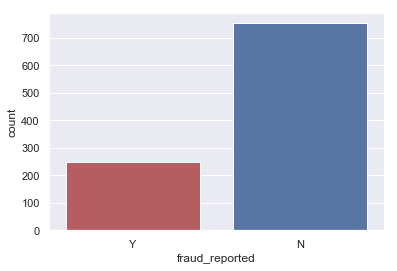

In [86]:
#dist of dv
#plt.style.use('dark_background') for ppt 
sns.set()

sns.countplot(x ="fraud_reported", data=Train_Data, palette=['r','b']);

### Correlations among variables
Next, correlations amongst continuous variables (ordinal, interval/ratio variables) were inspected. Heatmap was plotted for variables with at least 0.3 Pearson's correlation coefficient , including the DV.

Month as customer and age had a correlation of 0.92. Probably because drivers buy auto insurance when they own a car and this time measure only increases with age. 

Incident severity and different types of claims have a clear correlation ($r$ = 0.36 - 0.50)

Apart from that, there don’t seem to be much correlations in the data.
There don’t seem to be multicollinearity problem except maybe that all the claims are all correlated, and somehow total claims have accounted for them.
However, the other claims provide some granularity that will not otherwise be captured by total claims. Thus, these variables were kept. 

In [87]:
#Color negative numbers red

def color(val):
    color = 'green' if val ==1 else 'red' if val < -0.3 else 'blue' if val > 0.3 else 'black'   #write like lambda
    return 'color: %s' % color


corr = Train_Data[cont_var].corr()
corr.style.applymap(color)

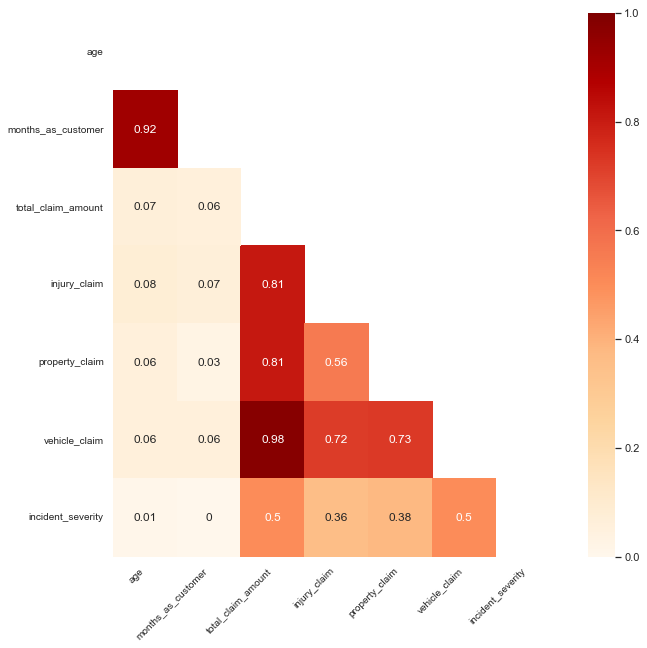

In [88]:
sns.set_style('white')

# heatmap from those with at least 0.3 magnitude in corr, includeing the DV
corr_list=['age','months_as_customer','total_claim_amount',
           'injury_claim', 'property_claim','vehicle_claim',
           'incident_severity','fraud_reported']

corr_df = Train_Data[corr_list]
corr=round(corr_df.corr(),2)

# Set the default matplotlib figure size to 7x7:
fix, ax = plt.subplots(figsize=(10,10))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True  #triu triangle upper

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(corr, mask=mask, ax=ax, annot=True, cmap='OrRd')

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=10, ha= 'right', rotation=45 )
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=10, va="center", rotation=0)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

## Visualization

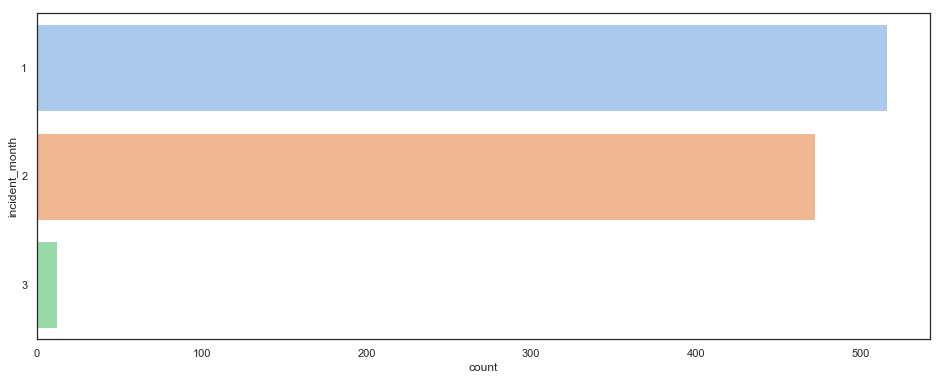

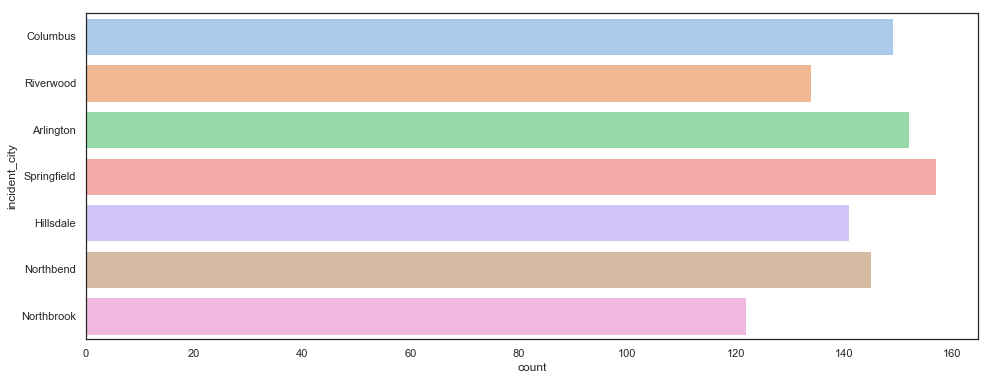

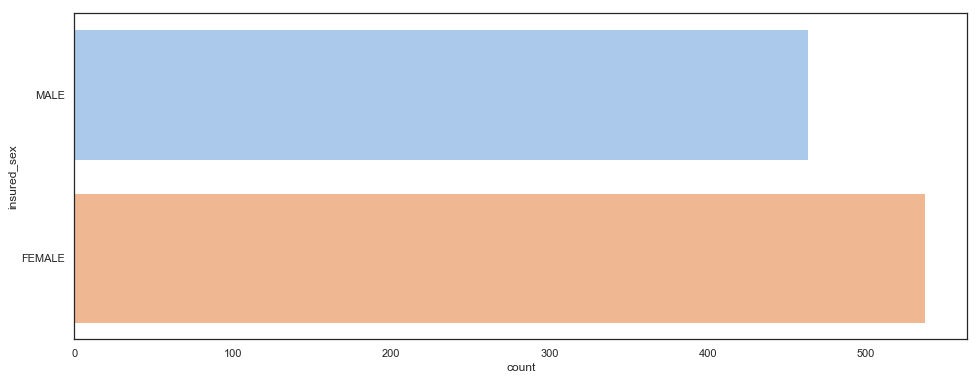

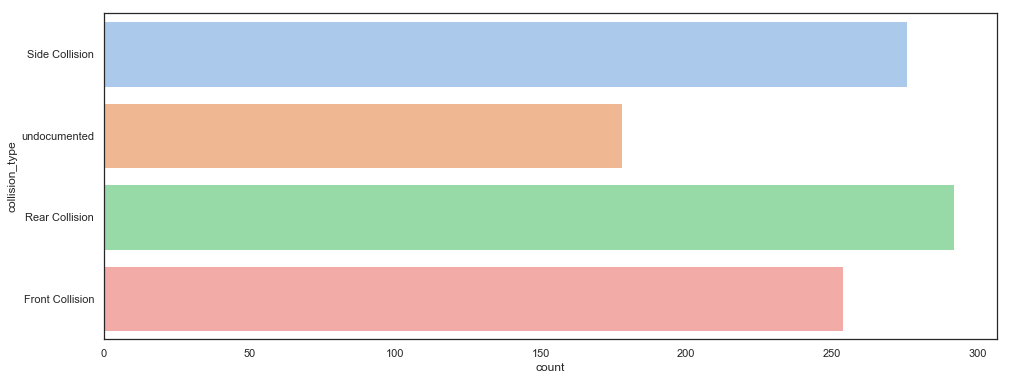

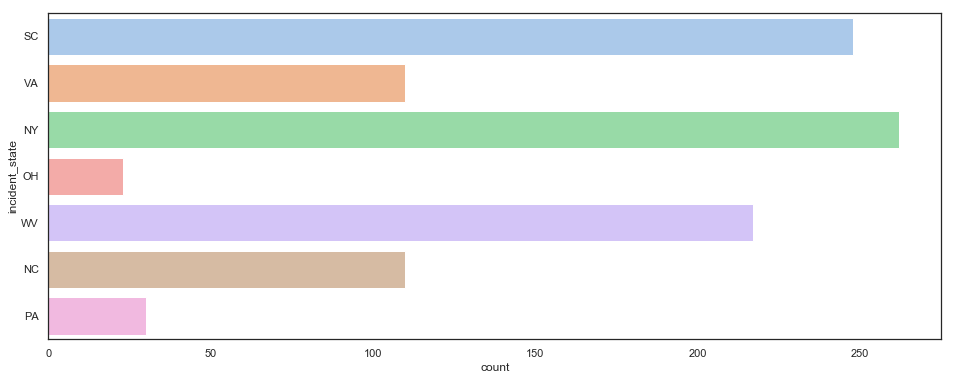

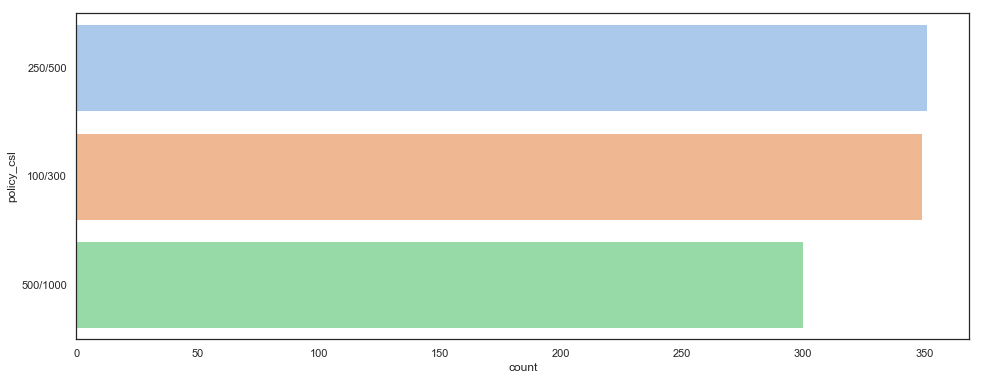

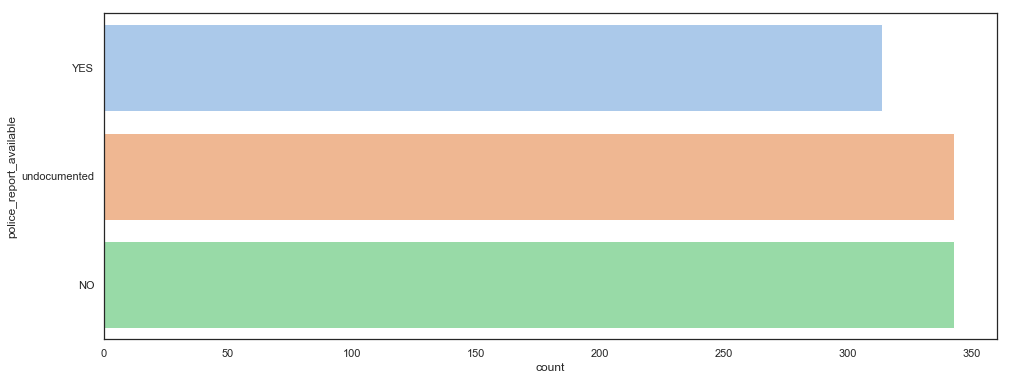

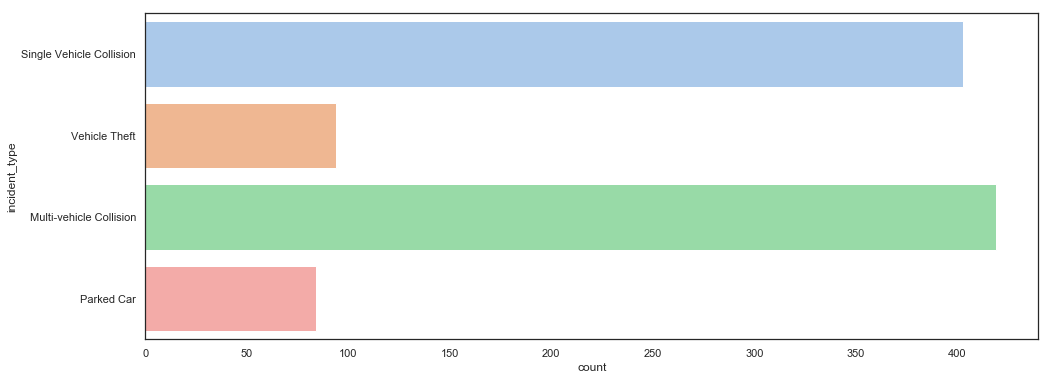

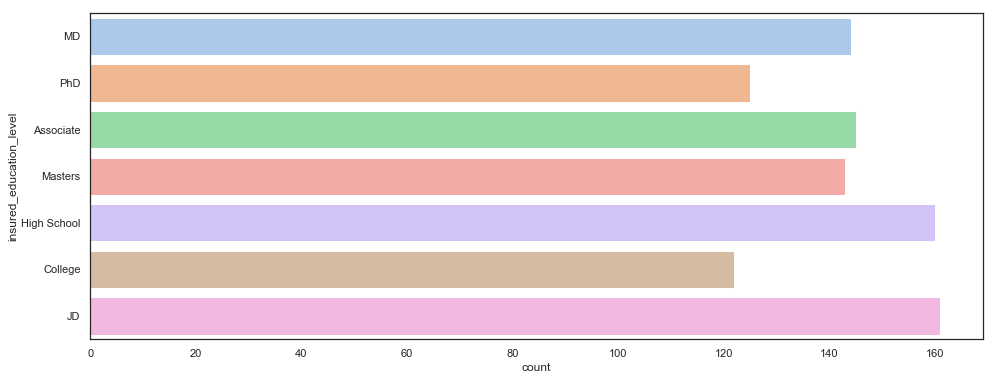

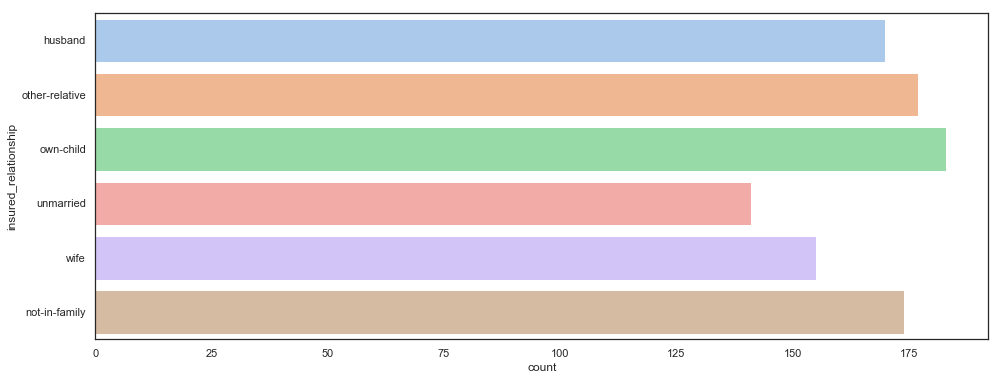

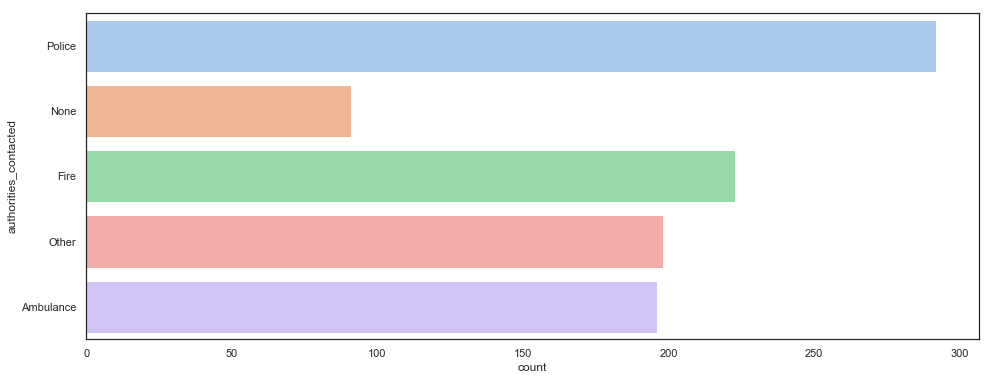

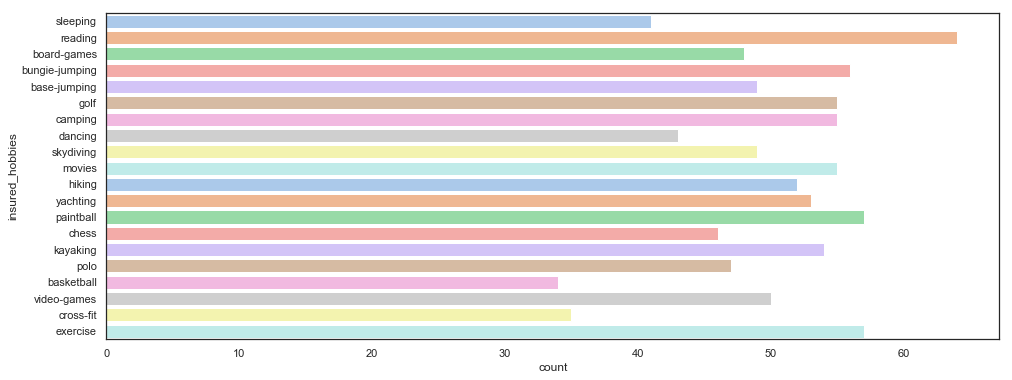

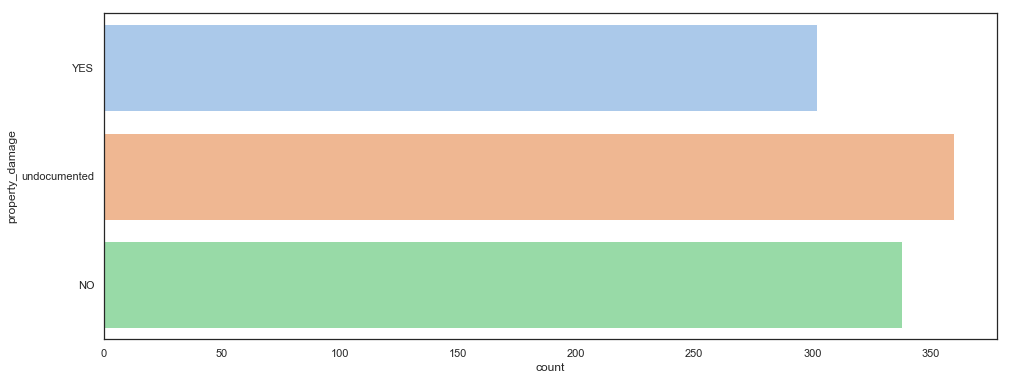

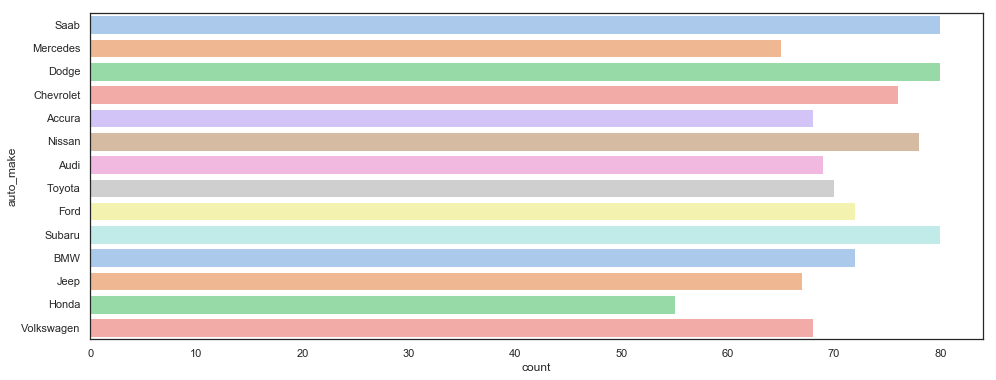

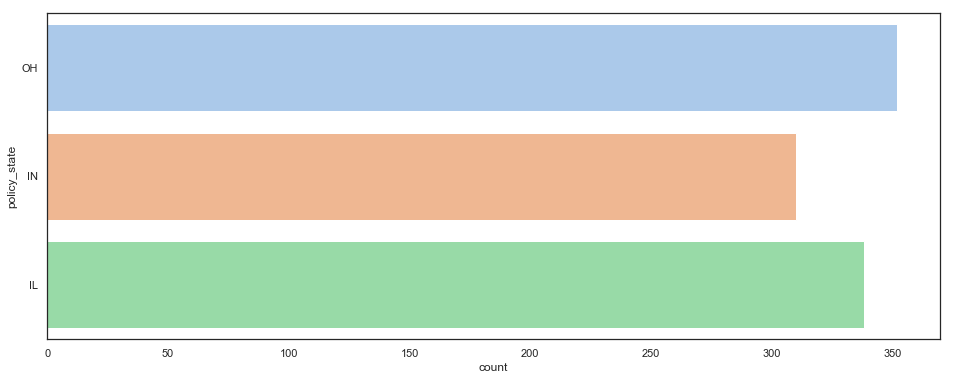

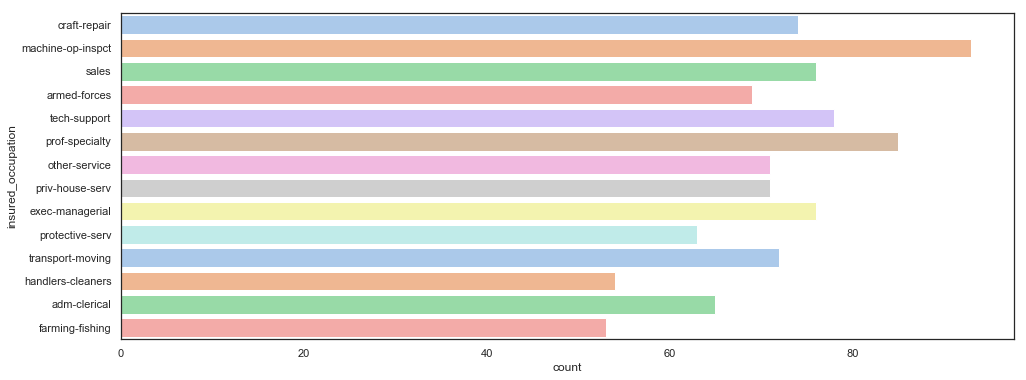

In [90]:
#countplot of discrete var , 

for i, name in enumerate(Train_Data[nom_var]):
    plt.figure(i,figsize=(16,6))
    sns.countplot(y=name, data=Train_Data, palette="pastel")

Nominal variables' counts were visualized with bar plots. I sum up some observations in point: 

- **Authorities_contacted:** Police are the most frequently contacted followed by the fire brigades. 
- **Auto_make:** apart from Honda (least), most are relatively even. 
- **Collision_type:** the distribution looks evenly spread across the categories. Most are rear collisions. Smallest groups are the undocumented collisions. we can explore which collisions will be the most expensive and have the most frauds.
- **Incident_city:** relatively even with Springfield and Arlington being the highest. 
- **Incident_type:** very few incidents are by theft/parked car. Most are by multivehicle collision and single vehicle collision. We can explore how claims and fraud differ across them. 
- **Property_damage:** relatively even but undocumented damage has the highest numbers

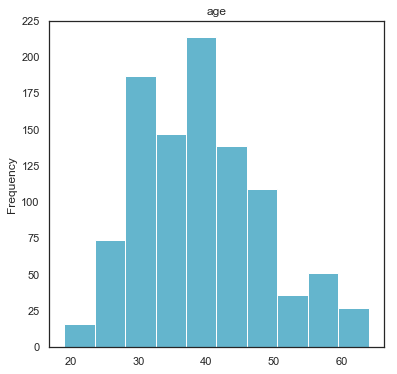

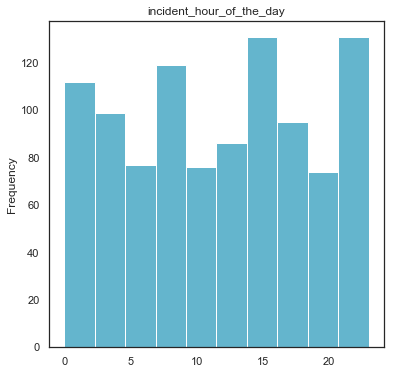

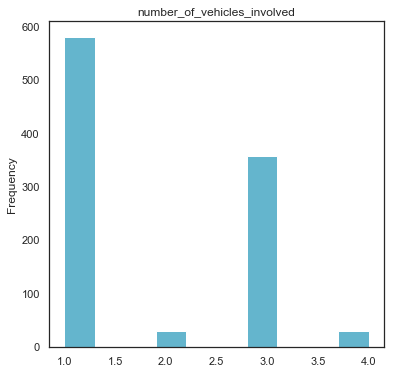

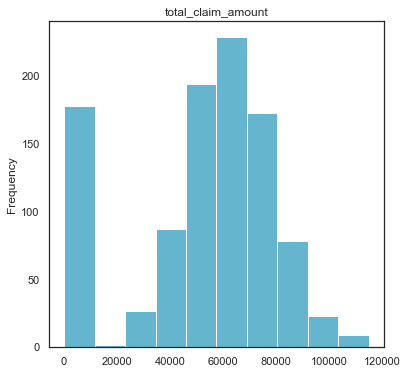

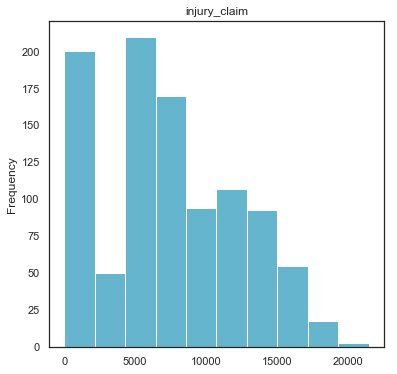

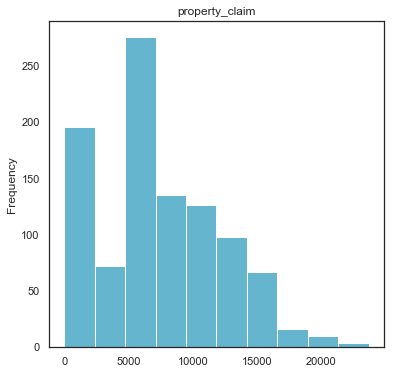

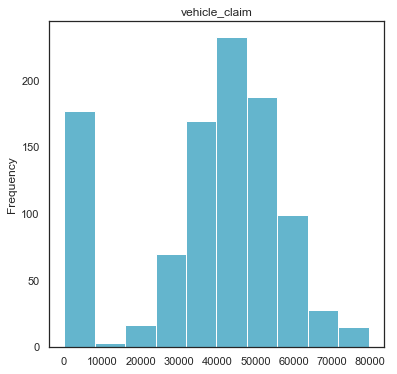

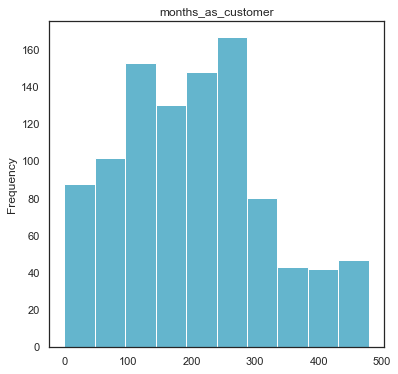

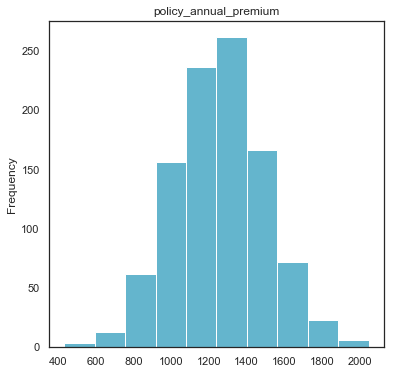

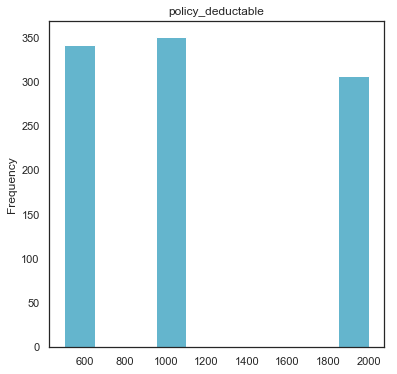

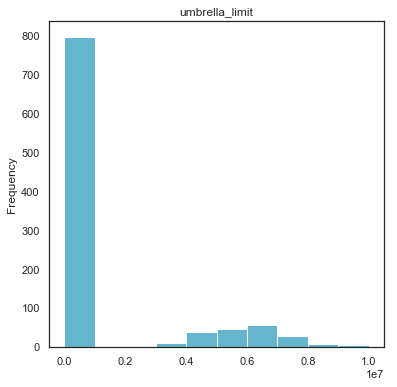

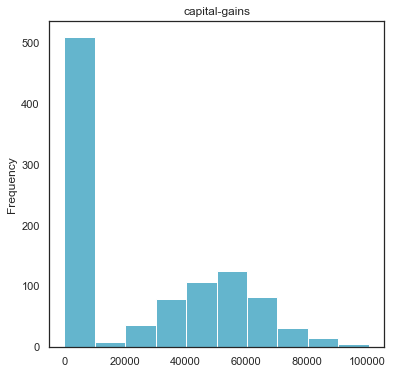

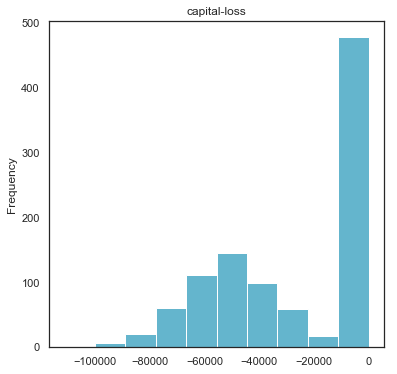

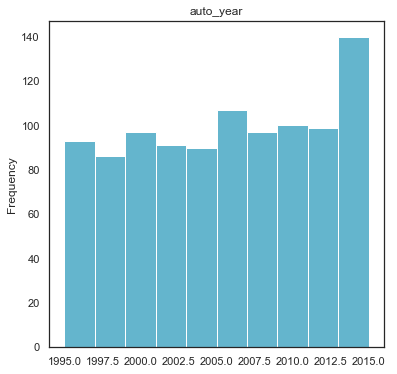

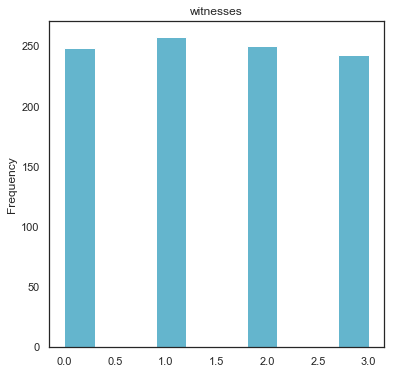

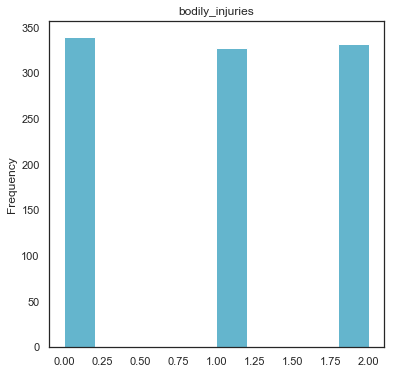

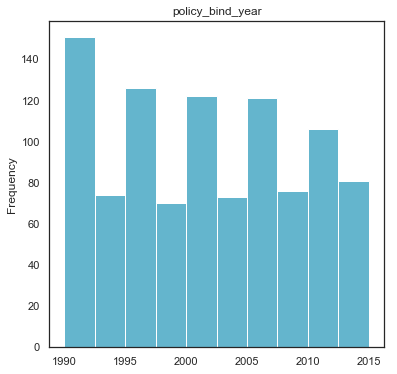

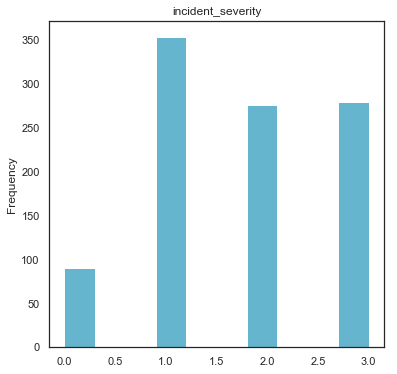

In [92]:
#distribution of ordinal and continuous variables

for i, name in enumerate(Train_Data[cont_var]):
    plt.figure(i,figsize=(6,6))
    Train_Data[name].plot(kind="hist", color="c", title=name)

Continuous variables' counts were visualized with bar plots. I sum up some observations in point: 

- **policy annual premium:** looks like a normal distribution.
- **policy bind years:** have staggering frequencies with some range of years more popular than others. This may be some auto market cycle. 1990 to 2992 is the highest.
- **capital gain and loss:** are mostly 0

### Visualizing variables against the DV

Counts of every variable split by the DV was plotted. Below are a few notable plots.

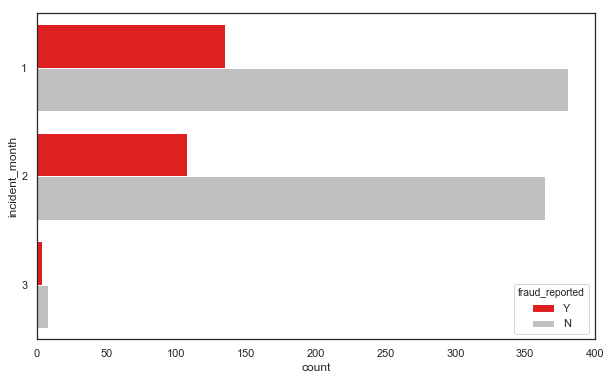

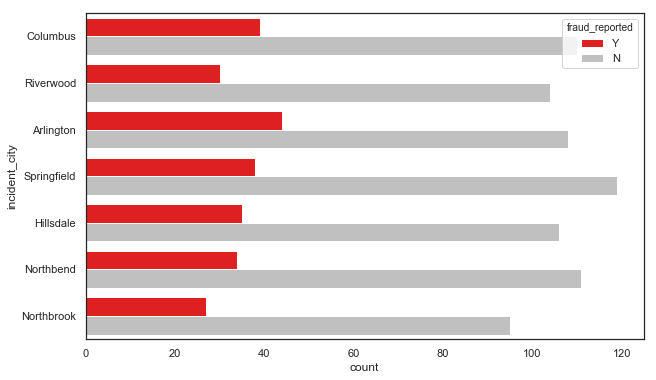

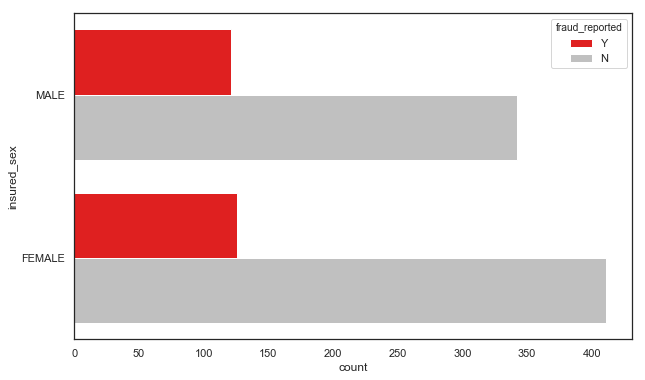

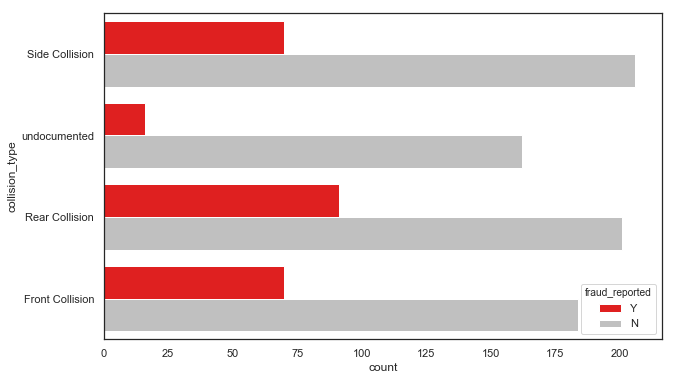

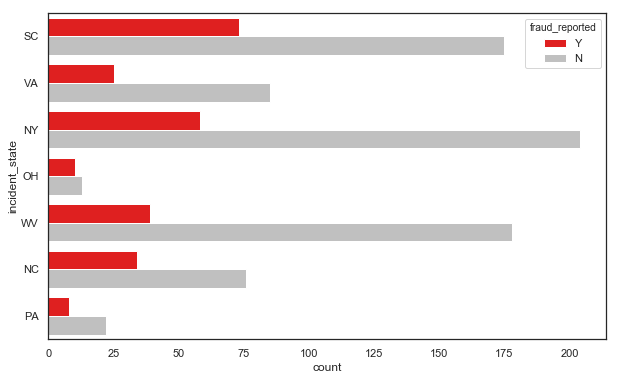

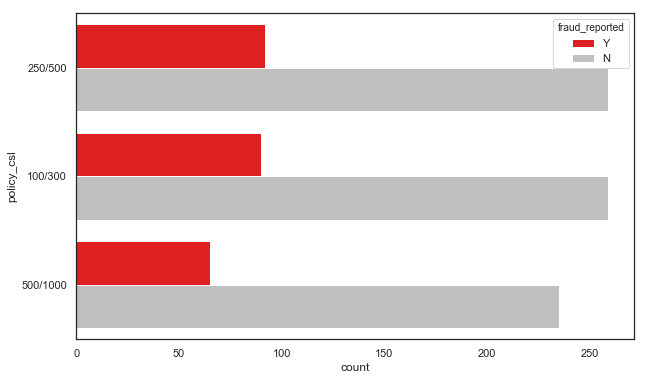

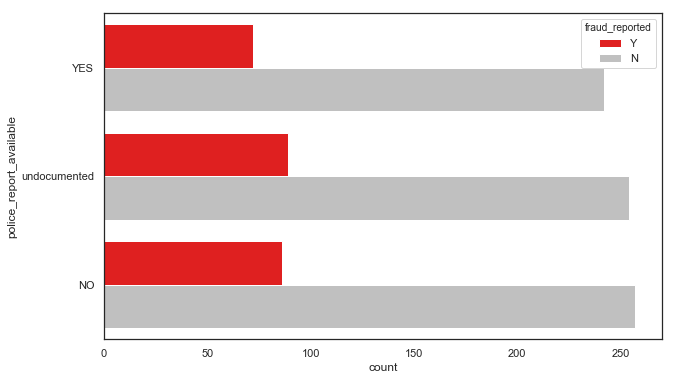

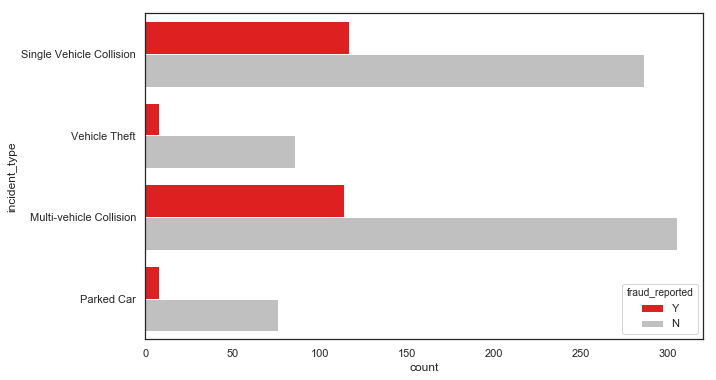

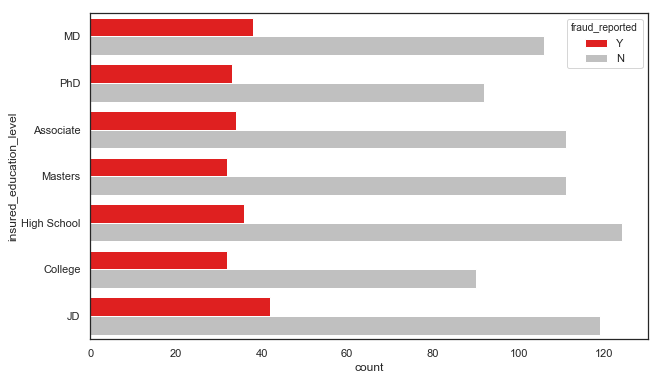

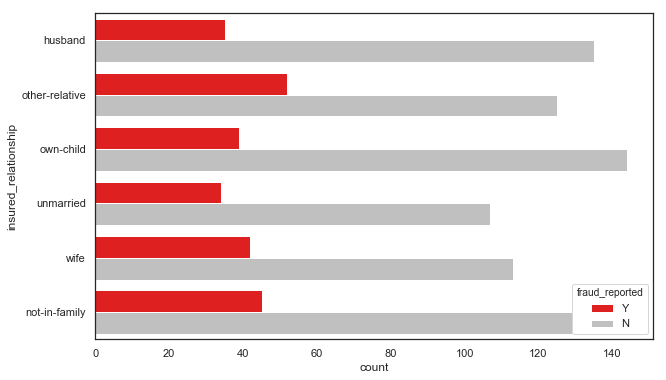

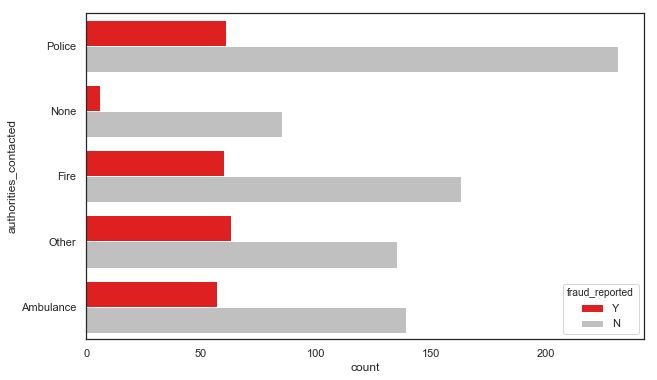

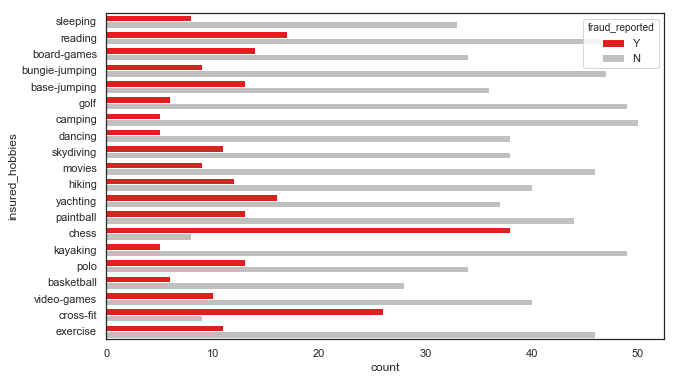

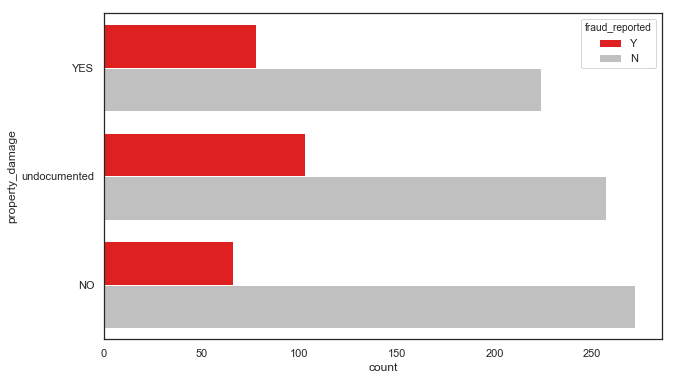

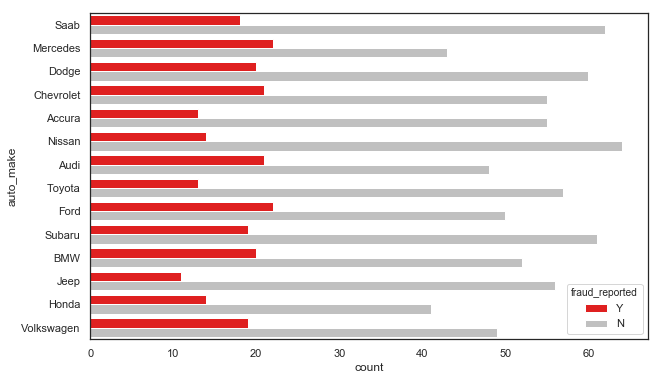

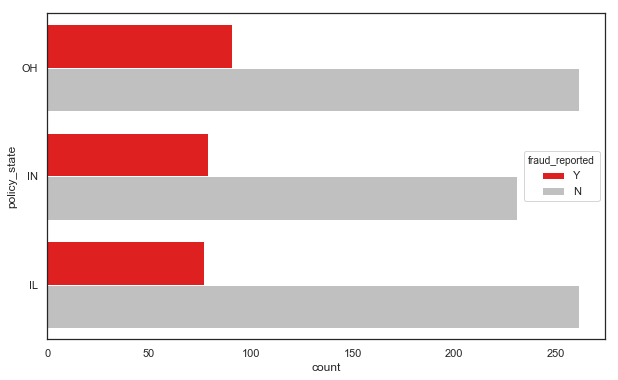

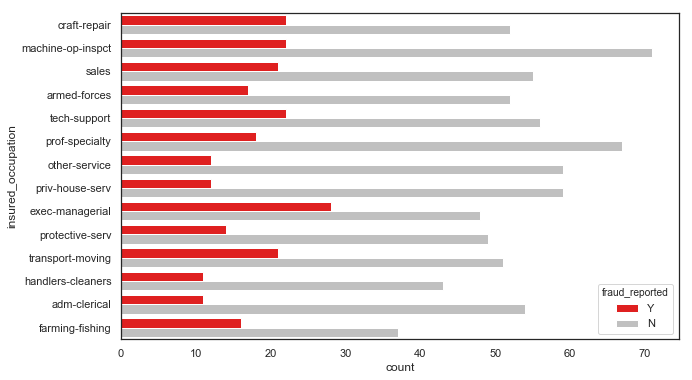

In [94]:
#each discrete var and fraud reported's dist

for i, name in enumerate(Train_Data[nom_var]):
    plt.figure(i,figsize=(10,6))
    sns.countplot(y=name, data=Train_Data, hue="fraud_reported", palette=['red','silver'])

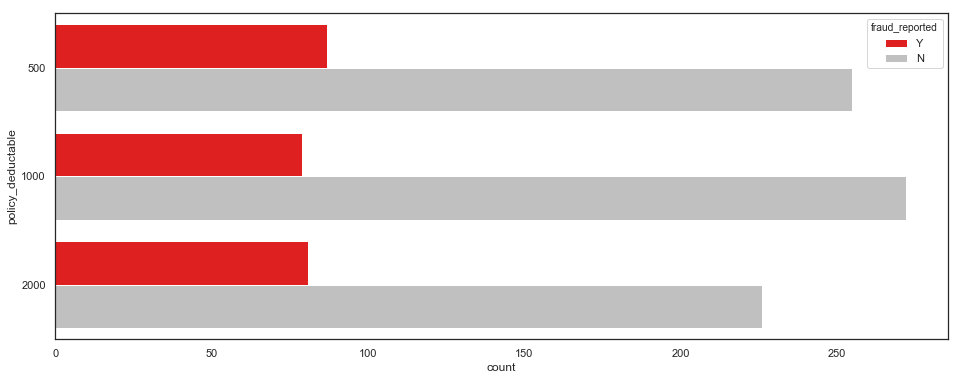

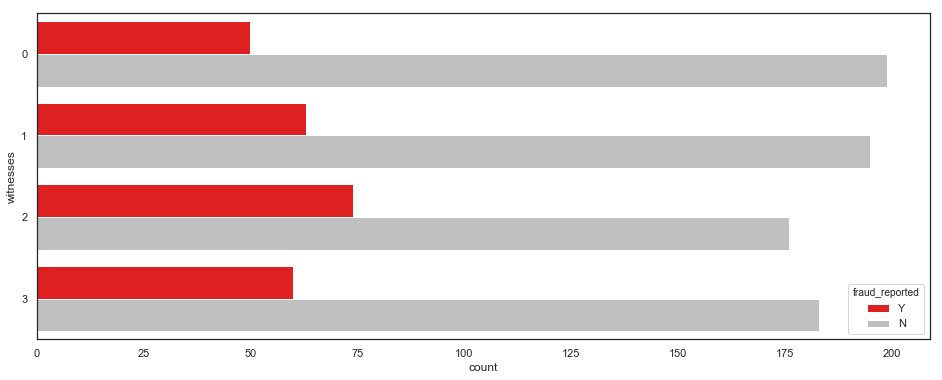

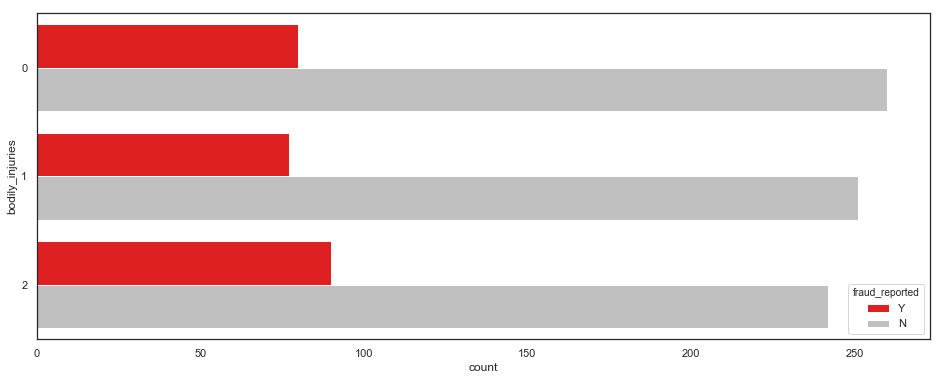

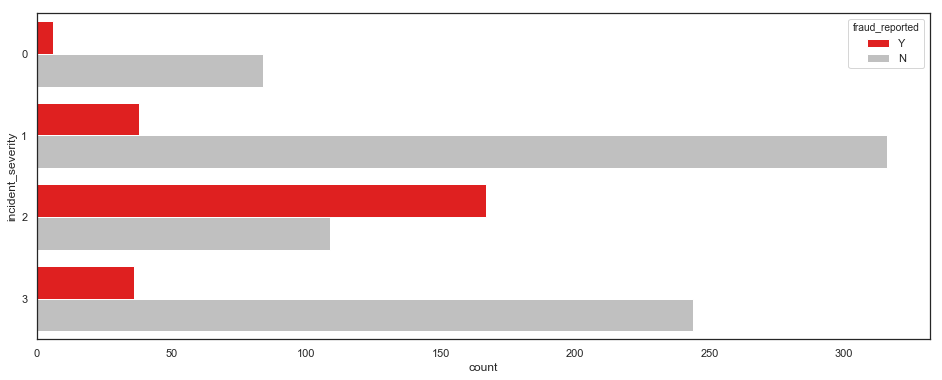

In [95]:
#each ordinal var and fraud reported's dist
#plt.style.use('dark_background')
#plt.style.use('default')


for i, name in enumerate(Train_Data[ord_var]):
    plt.figure(i,figsize=(16,6))
    sns.countplot(data=Train_Data, y=name, hue='fraud_reported', palette=['red','silver'])
    

<Figure size 1152x432 with 0 Axes>

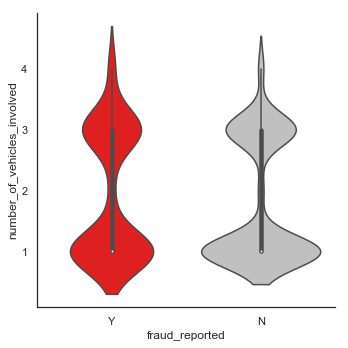

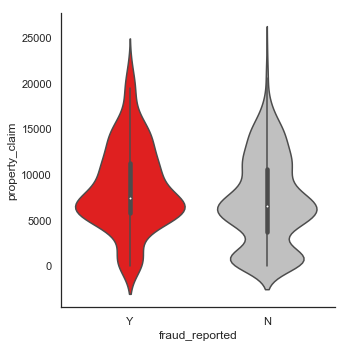

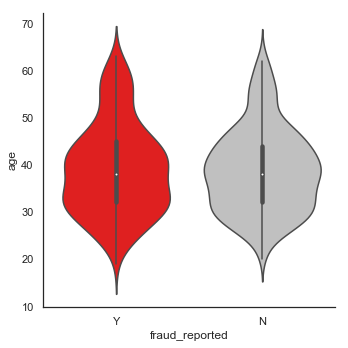

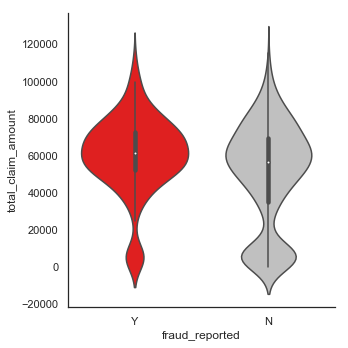

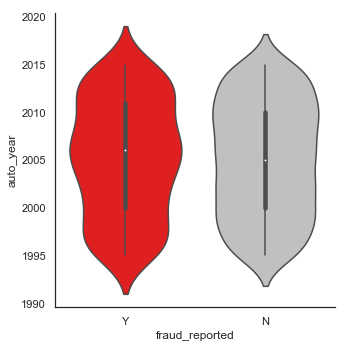

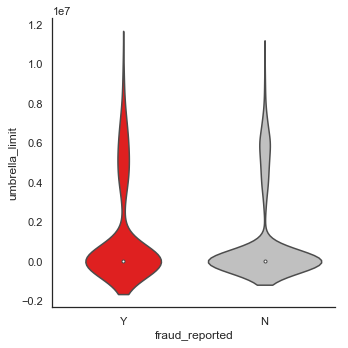

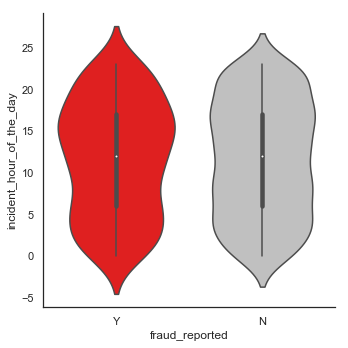

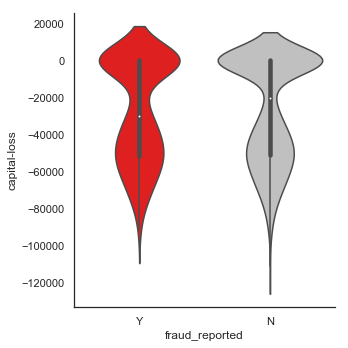

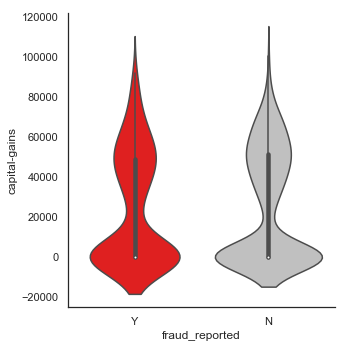

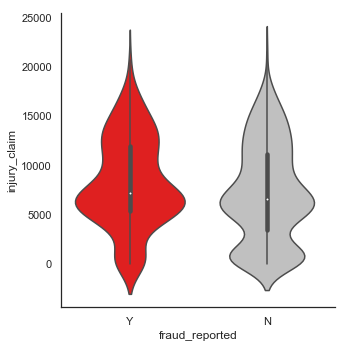

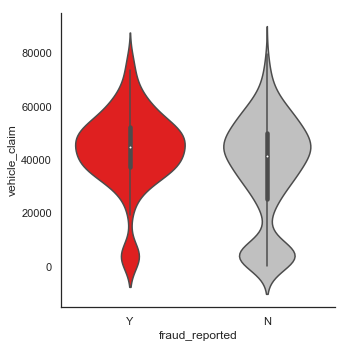

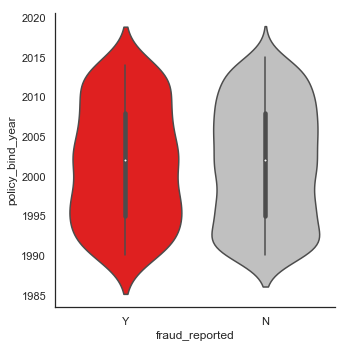

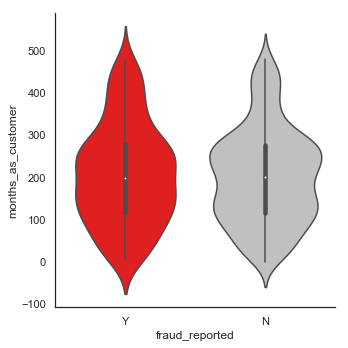

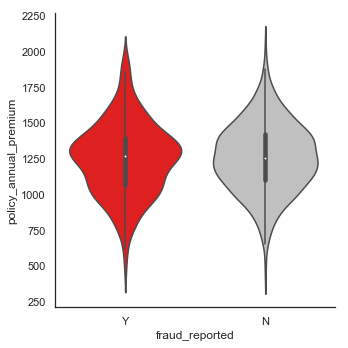

In [97]:
#each continous var and fraud reported's dist

for i, name in enumerate(Train_Data[quan_var]):
    plt.figure(i,figsize=(16,6))
    sns.catplot(data=Train_Data, x="fraud_reported", y=name, kind='violin', palette=['red','silver'])
    

**Observations**

Little have I suspected that fraud differed across hobbies. It seems like chess players and cross-fitters have higher tendencies of fraud. I stopped to think if the sports develop one to be inclined to fraud or that people with tendencies are drawn to it.

<br>
<details><summary>Drop down to jump to that graph</summary>

![](images/fig3.png)
    
</details>

Major incident severity seems to have highest fraud cases that exceed non fraud cases.

<br>
<details><summary>Drop down to jump to that graph</summary>

![](images/fig4.PNG)
    
</details>

There seem to be more frauds than non-fraud claims along the mean of total claims. 

<br>
<details><summary>Drop down to jump to that graph</summary>

![](images/fig5.PNG)
    
</details>


### Additional visualization and observations

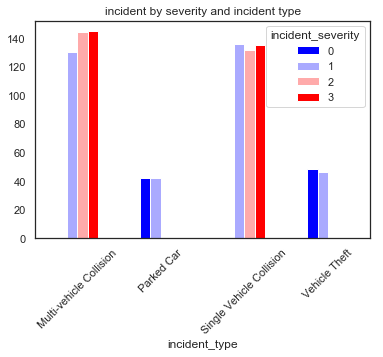

In [98]:
#cross tab of incident type and severity 
#more severe accidents seem to only be present with collision 

incident = pd.crosstab(Train_Data['incident_type'], Train_Data['incident_severity'])

incident.plot(kind='bar', colormap='bwr',figsize=(6,4))
plt.xticks(rotation=45)
plt.title("incident by severity and incident type");

More severe accidents seem to only be present with collision.

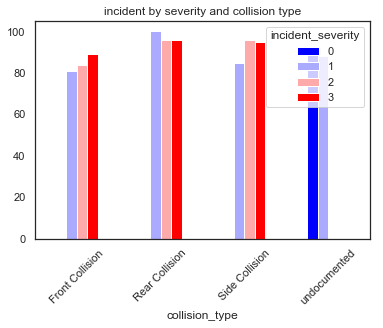

In [100]:
#undocumented collision types tend to be less severe

incident = pd.crosstab(Train_Data['collision_type'], Train_Data['incident_severity'])

incident.plot(kind='bar', colormap='bwr', figsize=(6,4))
plt.xticks(rotation=45)
plt.title("incident by severity and collision type");

Undocumented collision types tend to be less severe. Perhaps the drivers see no need to document since accidents are not major.

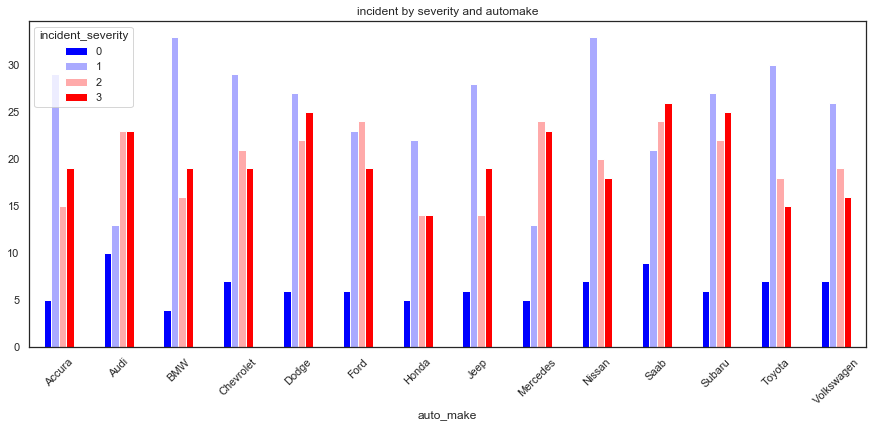

In [101]:
# seems like bmw and nissan gets a lot of minor accident
# fiercer cars like dodge, subaru, saab, merc get into mor severe accident

incident = pd.crosstab(Train_Data['auto_make'], Train_Data['incident_severity'])
incident.plot(kind='bar', colormap='bwr',figsize=(15,6))
plt.xticks(rotation=45)
plt.title("incident by severity and automake");

Seems like bmw and nissan gets a lot of minor accident
Fiercer cars like dodge, subaru, saab, merc get into mor severe accident

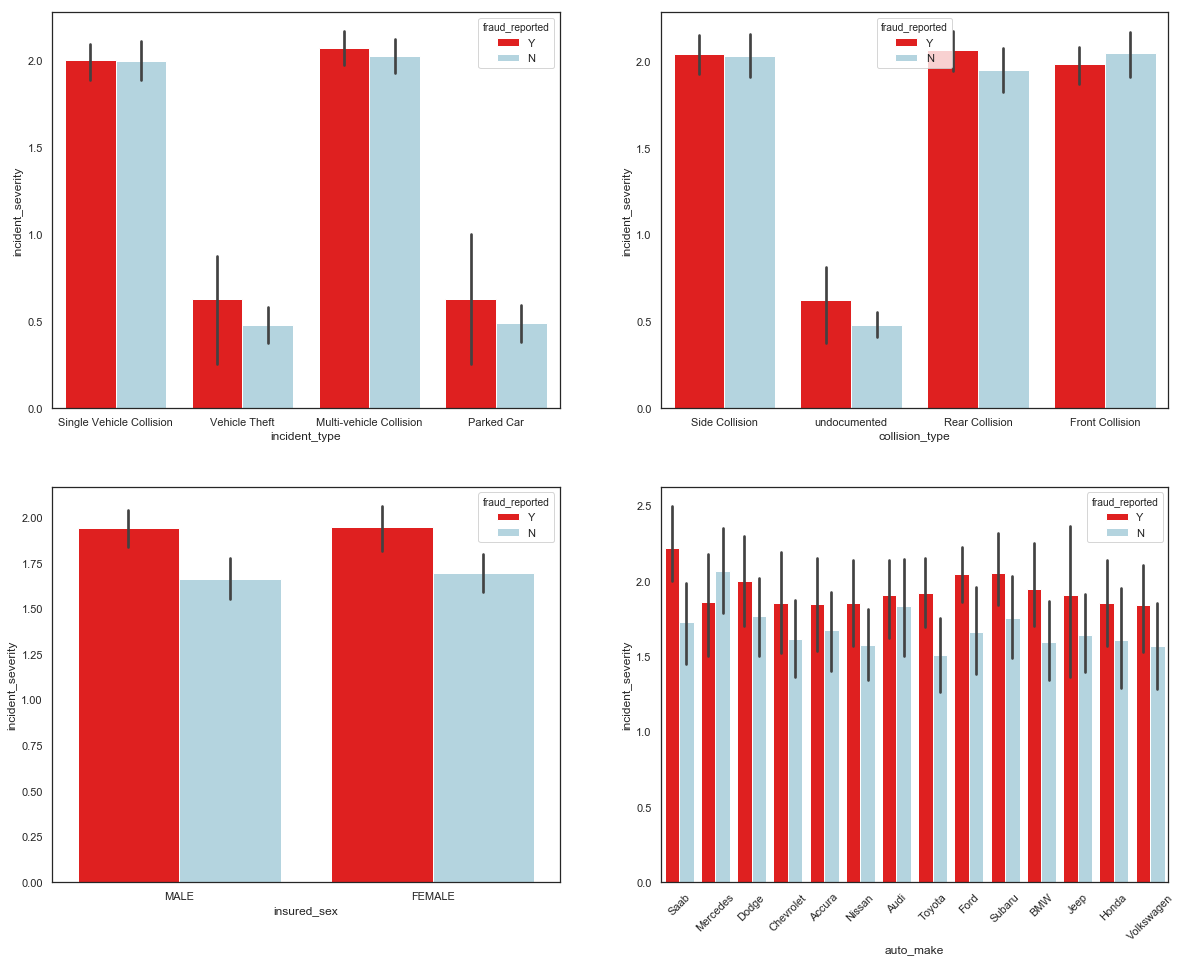

In [103]:
#severity and claims and fraud

fig, axes = plt.subplots(2,2, figsize=(20,16))

axes[0][0] = sns.barplot(x="incident_type", y="incident_severity",
                hue="fraud_reported", 
                data=Train_Data, palette=['red','lightblue'], ax=axes[0][0]);

axes[0][1] = sns.barplot(x="collision_type", y="incident_severity",
                hue="fraud_reported", 
                data=Train_Data, palette=['red','lightblue'], ax=axes[0][1]);

axes[1][0] = sns.barplot(x="insured_sex", y="incident_severity",
                hue="fraud_reported", 
                data=Train_Data, palette=['red','lightblue'], ax=axes[1][0]);

axes[1][1] = sns.barplot(x="auto_make", y="incident_severity",
                hue="fraud_reported", 
                data=Train_Data, palette=['red','lightblue'], ax=axes[1][1]);

plt.xticks(rotation=45);

# although theft and parked car are less severe, they have more fraud cases.. maybe acrimony and vengeful?
# rear collision and undocumented have more fraud.. again we see a trend that less severe accidetns more fraud (undoc)
# no obvious trend by sex 
#saab subaru ford seem to have more fraud cases

Although theft and parked car are less severe, they have more fraud cases. Perhaps due to acrimony and feelings of needing compensation for the perceived unfairness of an accident involving their vehicle while they were not involved or at fault. Rear collision and undocumented have more fraud. I see a trend that less severe accidents have more frauds. There is no obvious trend by sex. Saab, Subaru and Ford seem to have more fraud cases.

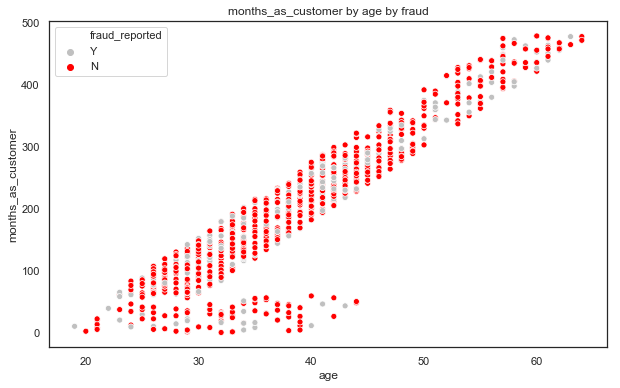

In [104]:
#try to see if there are any iteractions
#dont seem like it 
#a bunch of people across age are relatively new insurance  customers
#the rest are drivers that have insurance over the years.
#no clear pattern of interaction here

plt.figure(figsize=(10, 6))

sns.scatterplot(x="age", y="months_as_customer", 
            hue="fraud_reported", data=Train_Data,
            palette=['silver','red'])

plt.title("months_as_customer by age by fraud");

I tried to see if there are any interactions between months as customer and age on fraud but there don’t seem to be. From the graph we can see that a group of people across age are relatively new insurance customers while the rest are drivers that have insurance over the years.

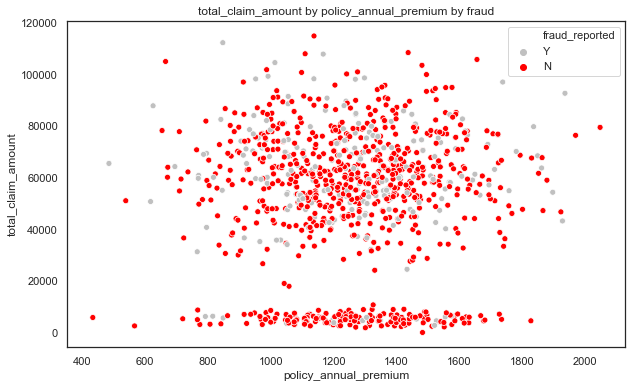

In [105]:
#no clear pattern but seems like claims close to 0 has most frauds

plt.figure(figsize=(10, 6))

sns.scatterplot(x="policy_annual_premium", y="total_claim_amount", 
            hue="fraud_reported", data=Train_Data,
            palette=['silver','red'])

plt.title("total_claim_amount by policy_annual_premium by fraud");

When plotted total claim amount and policy annual premium and fraud as a scatter plot, there were no clear patterns, but I noticed that there seem to be a high density of frauds at lower total claim amounts (lower than $20, 000).

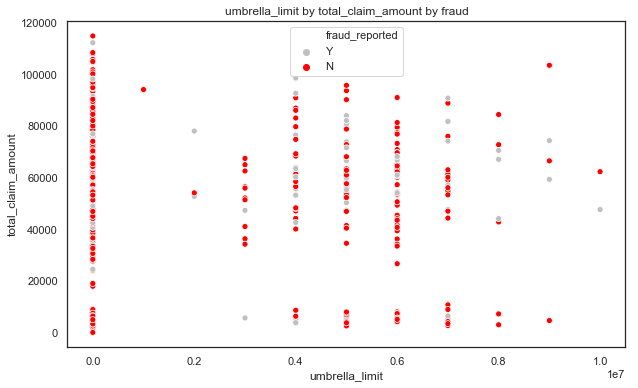

In [106]:
#seems like no umbrella limit more fraud?
#this people may have little to lose which is why they dont perchase umbrella 
#inversely, those who purchase have a lot of asset and a lot to lose so may be less prone to fraud?

plt.figure(figsize=(10, 6))

sns.scatterplot(x="umbrella_limit", y="total_claim_amount", 
            hue="fraud_reported", data=Train_Data,
            palette=['silver','red'])

plt.title("umbrella_limit by total_claim_amount by fraud");

When I plotted seems like no umbrella limit with total claim amount, I noticed that those without umbrella limit have more density of fraud? This people may have little to lose which is why they don't purchase umbrella. Inversely, those who purchase have a lot of asset and a lot to lose so may be less prone to fraud.

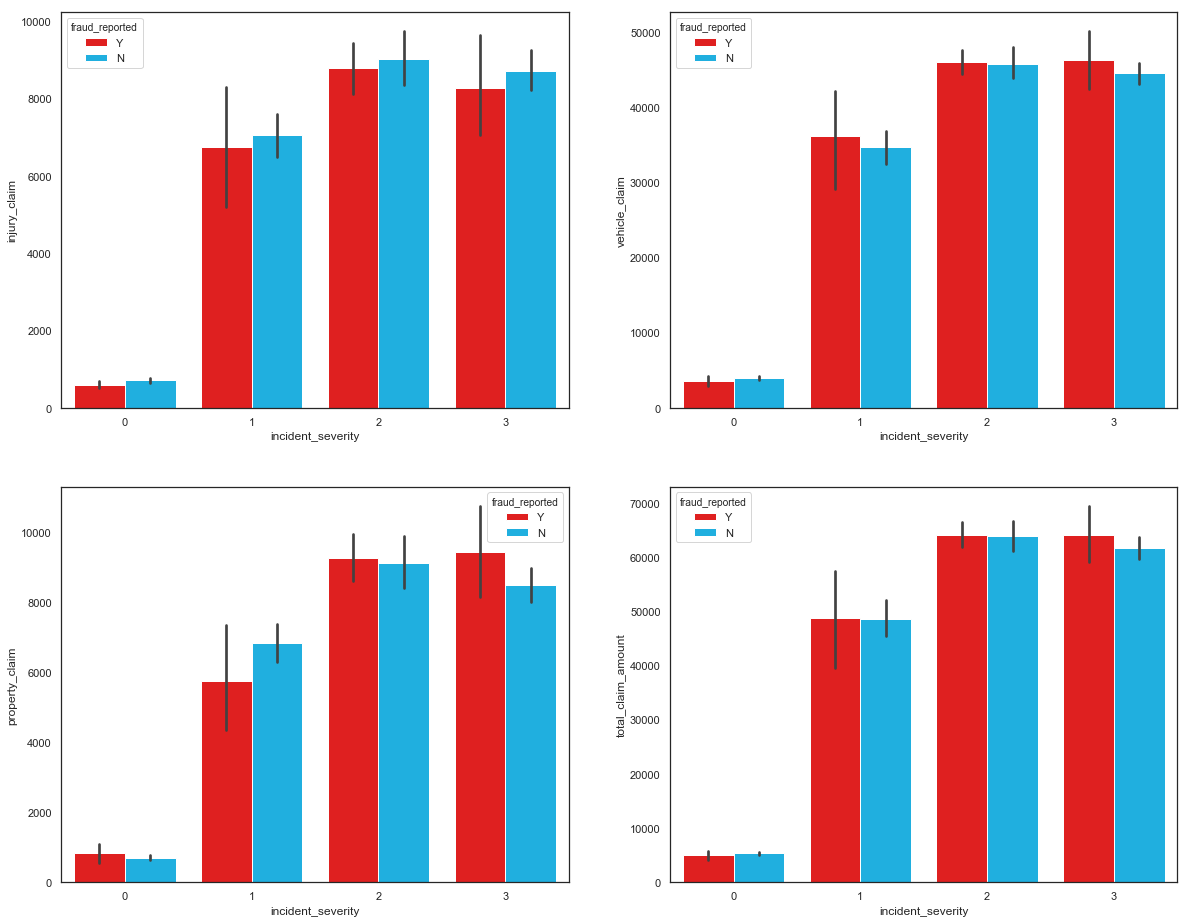

In [108]:
#severity and claims and fraud

fig, axes = plt.subplots(2,2, figsize=(20,16))

axes[0][0] = sns.barplot(x="incident_severity", y="injury_claim",
                hue="fraud_reported", 
                data=Train_Data, palette=['red','deepskyblue'], ax=axes[0][0]);

axes[0][1] = sns.barplot(x="incident_severity", y="vehicle_claim",
                hue="fraud_reported", 
                data=Train_Data, palette=['red','deepskyblue'], ax=axes[0][1]);

axes[1][0] = sns.barplot(x="incident_severity", y="property_claim",
                hue="fraud_reported", 
                data=Train_Data, palette=['red','deepskyblue'], ax=axes[1][0]);

axes[1][1] = sns.barplot(x="incident_severity", y="total_claim_amount",
                hue="fraud_reported", 
                data=Train_Data, palette=['red','deepskyblue'], ax=axes[1][1]);

# vehicle claims and property claims have more frauds than injury claims
# does someone act more honestly after injury??

Next, I looked at different types of claims and incident severity and frauds. Vehicle claims and property claims have more frauds than injury claims. Perhaps damage of vehicles and property causes more perceived unfairness. Trend of fraud is less obvious in total claims against incident severity as after summing and aggregating across different types of claims, the variances cancel out each other.

<h2> <font color='#4682B4'> Losses by claims </font> </h2> 
 
Here, I define loss as simply money going out from the insurance company. Source of money coming in, on the other hand, are premiums. Although we know premiums and claims are not the only source of money going in or out of an insurance company, these 2 variables are used since they are the only information, we have from this data set. Typically, other source of money movement maybe investments made by the insurance company, for instance.

In [109]:
#create a variable that measure how much claims - how much premiums was paid by a client to indeicate a loss/profit

Train_Data['loss_by_claims'] = Train_Data['total_claim_amount'] - (Train_Data['policy_annual_premium'] * (2015 - Train_Data['policy_bind_year']))

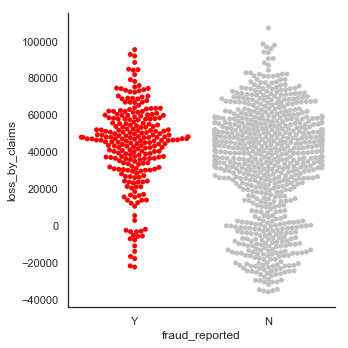

In [110]:
#note this is not how much the insurance company earns because there are a lot of other cars with no indicents 
sns.set_style("white") 

sns.catplot(data=Train_Data, y="loss_by_claims", x="fraud_reported", hue='fraud_reported', kind='swarm', palette=['red','silver']);

In [111]:
Train_Data[['capital-loss','capital-gains','loss_by_claims']]

capital-loss  capital-gains  loss_by_claims
0               0          53300        70203.09
1               0              0        -5704.98
2               0          35100        13452.90
3          -62400          48900        28006.50
4          -46000          66000         4916.09
5               0              0        51940.10
6          -77000              0        58649.75
7               0              0        23164.25
8               0              0         1726.18
9          -39300              0        37037.28
10              0          38400        70719.44
11         -51000              0        96725.44
12              0              0        34643.52
13         -32800          52800         4470.17
14         -55500          41300        24080.79
15              0          55700        37097.80
16              0          63600        40115.60
17              0          53500        70084.96
18         -37800          45500        71555.78
19         -27300          57000        26458.21
20              0              0        31716.52
21              0          46700        29088.50
22         -68200          72700        51104.22
23         -31000              0        67709.04
24         -53500              0        61097.11
25              0              0        68966.16
26         -29200              0       -24032.50
27         -30200          31000        -5304.91
28         -55600              0        37547.50
29              0              0        90545.50
..            ...            ...             ...
970        -77700          58500        52353.50
971        -35200          53400        39854.40
972             0          25800        30585.56
973        -51500              0        38492.60
974        -78600          59400        74491.00
975        -70900              0        49679.19
976         -5700          38400        43998.02
977        -49600              0        40154.04
978             0          27600        65800.33
979        -55400              0        27921.20
980             0          39300        74001.30
981        -65800              0        43272.35
982             0          28900        43085.36
983        -80800          32500        -4128.55
984        -49900          55700        28841.85
985        -21500              0        54507.50
986        -58400              0        75111.94
987             0              0        57412.78
988             0              0        33933.92
989        -54000          37500        43295.60
990        -32800          77500         1436.97
991        -32200          59400        35452.08
992             0          50300        30918.72
993        -32100              0        42908.04
994        -82100              0        -4296.32
995             0              0        55740.80
996             0          70900       107043.21
997             0          35100        50898.12
998             0              0        41552.32
999             0              0        -9497.61

[1000 rows x 3 columns]

In [112]:
Train_Data.groupby('fraud_reported')['loss_by_claims'].sum()

fraud_reported
N    25126613.43
Y    10806751.60
Name: loss_by_claims, dtype: float64

In [113]:
Train_Data.groupby('fraud_reported')['loss_by_claims'].mean()

fraud_reported
N    33368.676534
Y    43752.030769
Name: loss_by_claims, dtype: float64

In [114]:
43752.030769-33368.676534

10383.354234999999

In [115]:
Train_Data.groupby('fraud_reported')['loss_by_claims'].std()

fraud_reported
N    29690.411374
Y    21812.675584
Name: loss_by_claims, dtype: float64

In [116]:
Train_Data[['fraud_reported', 'loss_by_claims']].isnull().sum()

fraud_reported    0
loss_by_claims    0
dtype: int64

In [117]:
df_ttest = Train_Data[['fraud_reported', 'loss_by_claims']]
df_ttest.head()

fraud_reported  loss_by_claims
0              Y        70203.09
1              Y        -5704.98
2              N        13452.90
3              Y        28006.50
4              N         4916.09

In [119]:
from scipy.stats import pointbiserialr, stats
stats.ttest_ind(df_ttest.loc[df_ttest['fraud_reported']=='Y', 'loss_by_claims'], df_ttest.loc[df_ttest['fraud_reported']=='N', 'loss_by_claims'])

Ttest_indResult(statistic=5.065425715463792, pvalue=4.852489023999467e-07)

I created a variable that measure how much claims minus how much premiums were paid by a client to indicate losses by claim. a positive will indicate a loss while a negative will be a profit. Every time a claim is more than the total premiums paid by a client; it is a loss for the insurance company.

In 2015, the insurance company lost \\$8,198,060.09 through fraudulent claims. The average lost for fraud is \\$43,752.03*(M =  43752.03, SD = 21812.68)*, which is \\$10,383.35 more (*p < .001*). than average lost through legit claims *(M =  33368.68, SD = 29690.41)*.

Note that this is not how much the insurance company earns because the data set only show incident claims. 

The national averages for having an at-fault accident in the past, in the United States, is approximately 12 percent of car owners. 


<h2> <font color='#4682B4'> Preprocessing </font> </h2>
The DV, fraud_reported was coded 1 for fraud and 0 for non-fraud. 

Six interaction terms were created. Interaction between property claim amount and incident severity, vehicle claim amount and incident severity, injury claim amount and incident severity, total claim amount and incident severity, policy annual premium and total claim amount, umbrella limit and total claim amount.

Nominal variables were one-hot encoded, and the data set was split into 75% train and 25% test set, stratified on fraud reported. 

In [120]:
#DV numerical code
Train_Data['fraud_reported'] = Train_Data['fraud_reported'].map({"Y":1, "N":0})
Train_Data['fraud_reported']

0      1
1      1
2      0
3      1
4      0
5      1
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     1
15     1
16     0
17     0
18     0
19     0
20     0
21     0
22     1
23     1
24     0
25     1
26     0
27     1
28     0
29     0
      ..
970    0
971    0
972    1
973    1
974    1
975    0
976    0
977    1
978    0
979    0
980    0
981    0
982    1
983    0
984    0
985    0
986    1
987    1
988    0
989    0
990    0
991    0
992    0
993    0
994    0
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 1000, dtype: int64

In [121]:
Train_Data['insured_sex'] = Train_Data['insured_sex'].map({"FEMALE":0,"MALE":1})

In [122]:
Train_Data['capital-loss']=Train_Data['capital-loss']*(-1)

In [123]:
Train_Data['capital-loss'].max()

111100

In [124]:
#check that they are coded

Train_Data['pclaim_severity_int'] = Train_Data['property_claim']*Train_Data['incident_severity']
Train_Data['vclaim_severity_int'] = Train_Data['vehicle_claim']*Train_Data['incident_severity']
Train_Data['iclaim_severity_int'] = Train_Data['injury_claim']*Train_Data['incident_severity']
Train_Data['tclaim_severity_int'] = Train_Data['total_claim_amount']*Train_Data['incident_severity']

Train_Data['prem_claim_int'] = Train_Data['policy_annual_premium']*Train_Data['total_claim_amount']
Train_Data['umlimit_tclaim_int'] = Train_Data['umbrella_limit']*Train_Data['total_claim_amount']


#### Dummy coding

In [125]:
rem = ['insured_sex','incident_month']
dum_list = [e for e in nom_var if e not in rem]
len(dum_list)

14

In [127]:
dum = pd.get_dummies(Train_Data[dum_list], drop_first=True)
dum.head()

incident_city_Columbus  incident_city_Hillsdale  incident_city_Northbend  \
0                       1                        0                        0   
1                       0                        0                        0   
2                       1                        0                        0   
3                       0                        0                        0   
4                       0                        0                        0   

   incident_city_Northbrook  incident_city_Riverwood  \
0                         0                        0   
1                         0                        1   
2                         0                        0   
3                         0                        0   
4                         0                        0   

   incident_city_Springfield  collision_type_Rear Collision  \
0                          0                              0   
1                          0                              0   
2                          0                              1   
3                          0                              0   
4                          0                              0   

   collision_type_Side Collision  collision_type_undocumented  \
0                              1                            0   
1                              0                            1   
2                              0                            0   
3                              0                            0   
4                              0                            1   

   incident_state_NY                 ...                   \
0                  0                 ...                    
1                  0                 ...                    
2                  1                 ...                    
3                  0                 ...                    
4                  1                 ...                    

   insured_occupation_farming-fishing  insured_occupation_handlers-cleaners  \
0                                   0                                     0   
1                                   0                                     0   
2                                   0                                     0   
3                                   0                                     0   
4                                   0                                     0   

   insured_occupation_machine-op-inspct  insured_occupation_other-service  \
0                                     0                                 0   
1                                     1                                 0   
2                                     0                                 0   
3                                     0                                 0   
4                                     0                                 0   

   insured_occupation_priv-house-serv  insured_occupation_prof-specialty  \
0                                   0                                  0   
1                                   0                                  0   
2                                   0                                  0   
3                                   0                                  0   
4                                   0                                  0   

   insured_occupation_protective-serv  insured_occupation_sales  \
0                                   0                         0   
1                                   0                         0   
2                                   0                         1   
3                                   0                         0   
4                                   0                         1   

   insured_occupation_tech-support  insured_occupation_transport-moving  
0                                0                                    0  
1                                0                                    0  
2                                0

In [129]:
dum.reset_index(drop=True, inplace=True)
Train_Data.reset_index(drop=True, inplace=True)
df_dummied = pd.concat([dum, Train_Data], axis=1)

In [130]:
df_dummied.drop(nom_var, axis=1, inplace=True)

In [131]:
df_dummied.head()

incident_city_Columbus  incident_city_Hillsdale  incident_city_Northbend  \
0                       1                        0                        0   
1                       0                        0                        0   
2                       1                        0                        0   
3                       0                        0                        0   
4                       0                        0                        0   

   incident_city_Northbrook  incident_city_Riverwood  \
0                         0                        0   
1                         0                        1   
2                         0                        0   
3                         0                        0   
4                         0                        0   

   incident_city_Springfield  collision_type_Rear Collision  \
0                          0                              0   
1                          0                              0   
2                          0                              1   
3                          0                              0   
4                          0                              0   

   collision_type_Side Collision  collision_type_undocumented  \
0                              1                            0   
1                              0                            1   
2                              0                            0   
3                              0                            0   
4                              0                            1   

   incident_state_NY         ...          auto_year  fraud_reported  \
0                  0         ...               2004               1   
1                  0         ...               2007               1   
2                  1         ...               2007               0   
3                  0         ...               2014               1   
4                  1         ...               2009               0   

   policy_bind_year  loss_by_claims  pclaim_severity_int  vclaim_severity_int  \
0              2014        70203.09                26040               104160   
1              2006        -5704.98                  780                 3510   
2              2000        13452.90                 3850                23100   
3              1990        28006.50                12680               101440   
4              2014         4916.09                  650                 4550   

   iclaim_severity_int  tclaim_severity_int  prem_claim_int  \
0                13020               143220     100748825.1   
1                  780                 5070       6069905.4   
2                 7700                34650      48965301.0   
3                12680               126800      89757916.0   
4                 1300                 6500      10295415.0   

   umlimit_tclaim_int  
0                   0  
1         25350000000  
2        173250000000  
3        380400000000  
4         39000000000  

[5 rows x 112 columns]

In [132]:
df_dummied.isnull().sum().any()

False

In [133]:
df_dummied['umbrella_limit'].sort_values(ascending=True)

0             0
622           0
623           0
624           0
625           0
627           0
628           0
629           0
630           0
632           0
633           0
634           0
621           0
635           0
637           0
638           0
640           0
641           0
642           0
643           0
645           0
646           0
647           0
648           0
649           0
636           0
650           0
620           0
617           0
588           0
         ...   
50      7000000
794     7000000
791     7000000
795     7000000
936     7000000
66      7000000
161     7000000
474     7000000
263     7000000
157     7000000
394     7000000
519     7000000
255     7000000
154     7000000
349     7000000
314     8000000
262     8000000
922     8000000
875     8000000
31      8000000
503     8000000
48      8000000
119     8000000
458     9000000
657     9000000
700     9000000
88      9000000
975     9000000
115    10000000
430    10000000
Name: umbrella_limit, Le

In [134]:
dd = df_dummied.describe()
dd.loc['min']

incident_city_Columbus                         0.00
incident_city_Hillsdale                        0.00
incident_city_Northbend                        0.00
incident_city_Northbrook                       0.00
incident_city_Riverwood                        0.00
incident_city_Springfield                      0.00
collision_type_Rear Collision                  0.00
collision_type_Side Collision                  0.00
collision_type_undocumented                    0.00
incident_state_NY                              0.00
incident_state_OH                              0.00
incident_state_PA                              0.00
incident_state_SC                              0.00
incident_state_VA                              0.00
incident_state_WV                              0.00
policy_csl_250/500                             0.00
policy_csl_500/1000                            0.00
police_report_available_YES                    0.00
police_report_available_undocumented           0.00
incident_typ

## Train Test Split

In [135]:
x = df_dummied.drop('fraud_reported', axis=1)
y = df_dummied['fraud_reported']

In [141]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=42)

<h2> <font color='#4682B4'> Baseline accuracy score </font> </h2>

As our dataset is imbalance, accuracy is not a good measure of success. A high accuracy can be achieved by a poor model that only selects the majority class, hence, not detecting and measuring the accuracy of classifying the class of interest. In fact, predicting only the majority class will give an accuracy of 75%, specificity of 100% but a sensitivity of 0%. 

If we make a naive prediction that all claims are frauds, so that no frauds escape our watch, we will have a score as shown below:

- Sensitivity: 1.0
- Specificity: 0.0
- Precision: 0.248
- F1 score: 0.397
- ROC AUC Score: 0.50

As identifying as many frauds as possible is the goal, the F1 score of 0.397 was used as a baseline. However, investigations into frauds can be time consuming and expensive and may even affect customer experience. Thus, ROC AUC score will also be used to measure how well we distinguish between Fraud and legit claims. The baseline ROC AUC score is 0.50. I am to have a ROC AUC of at least 0.70. 

In [142]:
#baseline accuracy = 75.2%

y_test.value_counts(normalize=True)

0    0.752
1    0.248
Name: fraud_reported, dtype: float64

In [143]:
y_test.value_counts()

0    188
1     62
Name: fraud_reported, dtype: int64

In [144]:
base_recall = 62/(62)
base_speci = 0/(188)
base_preci = 62/(250)
base_f1 = 2*base_recall*base_preci/(base_recall+base_preci)


df_prob = pd.DataFrame()
df_prob['y']=y_test
df_prob['pred']=1
auc_score = roc_auc_score(df_prob['y'], df_prob['pred'])


print("If we make a naive prediction that all claims are frauds, so that no frauds escape our watch, we will have an:")
print("")
print("Sensitivity:", base_recall)
print('Specificity:', base_speci)
print('Precision:', base_preci)
print('F1 score:', base_f1)
print('ROC AUC Score:', auc_score)


If we make a naive prediction that all claims are frauds, so that no frauds escape our watch, we will have an:

Sensitivity: 1.0
Specificity: 0.0
Precision: 0.248
F1 score: 0.3974358974358974
ROC AUC Score: 0.5


As our dataset is imbalance, accuracy is not a good measure of success. A high accuracy can be achieved by a poor model that only selects the majority class, hence, not detecting and measuring the accuracy of classifying the class of interest. In fact, predicting only the majority class will give an accuracy of 75%, specificity of 100% but a sensitivity of 0%. 

If we make a naive prediction that all claims are frauds, so that no frauds escape our watch, we will have a score as shown below:

- Sensitivity: 1.0
- Specificity: 0.0
- Precision: 0.248
- F1 score: 0.397
- ROC AUC Score: 0.50

As identifying as many frauds as possible is the goal, the F1 score of 0.397 was used as a baseline. However, investigations into frauds can be time consuming and expensive and may even affect customer experience. Thus, ROC AUC score will also be used to measure how well we distinguish between Fraud and legit claims. The baseline ROC AUC score is 0.50. I am to have a ROC AUC of at least 0.70.

<h2> <font color='#4682B4'> Modeling </font> </h2>

Five different classifiers were used in this project: 
- logistic regression
- K-nearest neighbours
- Random forest
- XGBoost 
- AdaBoost 

Hyperparameter tuning and selection was done for all the models using RandomizedSearch. Due to the number of parameters and models that were ran, RandomizedSearch is a faster more efficient choice as compared to gridsearch.

<br>
<details><summary>More about hyperparameters </summary>

Model hyperparameters are set by the data scientist ahead of training and control implementation aspects of the model. Hyperparameters can be thought of as model settings. These settings need to be tuned because the ideal settings for one data set will not be the same across all data sets. When tuning the hyperparameters of an estimator, Grid Search and Random Search are both popular methods.
    
</details>



After a 10-fold RandomizedSearchCV, the model with its selected hyperparameters were fitted on the training set. 

Mean accuracy scores for the best estimators of the RandomizedSearchCV, accuracy scores on the training set and accuracy scores on the test set was computed. Then, the sensitivity, specificity, precision, F1 score and ROC AUC scores were computed. 


<br>
<details><summary>More about RandomizedSearchCV </summary>

There are 2 types of search for hyperparameter tuning. Grid search and randomized search.

Grid Search can be thought of as an exhaustive search for selecting a model. In Grid Search, the data scientist sets up a grid of hyperparameter values and for each combination, trains a model and scores on the testing data. In this approach, every combination of hyperparameter values is tried which can be very inefficient. For example, searching 20 different parameter values for each of 4 parameters will require 160,000 trials of cross-validation. This equates to 1,600,000 model fits and 1,600,000 predictions if 10-fold cross validation is used. While Scikit Learn offers the GridSearchCV function to simplify the process, it would be an extremely costly execution both in computing power and time.
By contrast, Random Search sets up a grid of hyperparameter values and selects random combinations to train the model and score. This allows you to explicitly control the number of parameter combinations that are attempted. The number of search iterations is set based on time or resources. Scikit Learn offers the RandomizedSearchCV function for this process.

While it’s possible that RandomizedSearchCV will not find as accurate of a result as GridSearchCV, it surprisingly picks the best result often and in a fraction of the time it takes GridSearchCV would have taken. Given the same resources, Randomized Search can even outperform Grid Search. This can be visualized in the graphic below when continuous parameters are used.

Checkout the link for an experiment on RandomizedSearch Vs GridSearch (spoiler alert: RandomizedSearch won on 10, 50, 100, 500 trails by time and by cost function value BUT this is not always the case):

https://towardsdatascience.com/random-search-vs-grid-search-for-hyperparameter-optimization-345e1422899d

</details>


This section discusses how different blocks of models were ran. Evaluation of the models will be the evaluation section.

In [145]:
#function to use for scoring 

def scores(t, name):
    print (name, 'classification metric')
    print("CV scores:", round(t.best_score_,3))
    print("train score:", round(t.score(x_train, y_train),3))
    print("test score:", round(t.score(x_test, y_test),3))

    #Evaluation metrics
    predictions = t.predict(x_test)

    TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

    sensi = TP/(TP + FN)
    speci= TN/(TN + FP)
    preci = TP/(TP + FP)
    f1= 2*(preci*sensi)/(preci+sensi)

    print(f'Sensitivity: {round(sensi,3)}')
    print(f'Specificity: {round(speci,3)}')
    print(f'Precision: {round(preci,3)}')
    print(f'F1: {round(f1,3)}')

    pred_proba = [i[1] for i in t.predict_proba(x_test)]
    auc_score = roc_auc_score(y_test, pred_proba)
    print('ROC AUC Score:', round(auc_score,3))

### Logistic regression

In [146]:
y_train.value_counts(normalize=True)

0    0.753333
1    0.246667
Name: fraud_reported, dtype: float64

A best practice for using the class weighting is to use the inverse of the class distribution present in the training dataset.
For example, the class distribution of the test dataset is a 1:100 ratio for the minority class to the majority class. The inversion of this ratio could be used with 1 for the majority class and 100 for the minority class; for example:{0:1.0, 1:100.0}

In [147]:
#ransearch log reg

lr = LogisticRegression(max_iter=200)

lr_values = {'solver': ['liblinear'],
            'penalty': ['l1', 'l2'],
            'C': np.logspace(-5, 5, 50),
            'class_weight':[{0:0.246667, 1:0.75333},None]}

    
rs_lr = RandomizedSearchCV(lr, lr_values, cv=10, n_jobs = -1, random_state=42)
rs_lr.fit(x_train, y_train, )
print(rs_lr.best_params_)

{'solver': 'liblinear', 'penalty': 'l1', 'class_weight': None, 'C': 5963.623316594637}


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### KNN

In [148]:
# knn = KNeighborsClassifier()
# ss = StandardScaler()

knn_pipe = Pipeline([
    ("ss", StandardScaler()),
    ("knn", KNeighborsClassifier(n_jobs=-1))])

knn_values = {'knn__n_neighbors':[3,5,7,9,11],
              'knn__weights':['uniform', 'distance'],
              'knn__metric':['minkowski','euclidean','manhattan'],
              'knn__algorithm':['auto', 'ball_tree','kd_tree','brute'],
              'knn__leaf_size':[1,2,3,4,5,6,7,8,9,10]
             }

    
rs_knn = RandomizedSearchCV(knn_pipe, knn_values, cv=10, n_jobs = -1, random_state=42)
rs_knn.fit(x_train, y_train)
print(rs_knn.best_params_)

{'knn__weights': 'distance', 'knn__n_neighbors': 7, 'knn__metric': 'euclidean', 'knn__leaf_size': 7, 'knn__algorithm': 'brute'}


### Random forest

In [149]:
rf = RandomForestClassifier(n_jobs=-1)

rf_values = {'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
             'min_samples_leaf': [1, 2, 3, 4, 5],
             'min_samples_split': [2, 5, 7, 9, 11],
             'max_features': ['auto', 'sqrt'],
             'n_estimators': [150, 250, 350, 450, 500, 550, 600, 650],
             'class_weight':[{0:0.246667, 1:0.75333},None]
              }


    
rs_rf = RandomizedSearchCV(rf, rf_values, cv=10, n_jobs = -1, random_state=42)
rs_rf.fit(x_train, y_train)
print(rs_rf.best_params_)

{'n_estimators': 350, 'min_samples_split': 9, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 20, 'class_weight': {0: 0.246667, 1: 0.75333}}


### XGBoost

scale_pos_weight = total_negative_examples / total_positive_examples

For an imbalanced binary classification dataset, the negative class refers to the majority class (class 0) and the positive class refers to the minority class (class 1).

In [150]:
y_train.value_counts()

0    565
1    185
Name: fraud_reported, dtype: int64

In [151]:
#scaled positive weight
565/185

3.054054054054054

In [152]:
xg = XGBClassifier(booster='gbtree', n_jobs=-1)

xg_values = {'max_depth': [3, 4, 5, 6],
             'eta': [0.05, 0.1, 0.15, 0.3],
             'reg_lambda': [0.01, 0.05, 0.1, 0.5, 1],
             'reg_alpha': [0.01, 0.05, 0.1, 0.5, 1],
             'gamma': [0, 1, 2, 3],
             'n_estimators': [150, 250, 350, 450, 500, 550, 600, 650],
             'scale_pos_weight':[1, 3.054054054054054],
              }


    
rs_xg = RandomizedSearchCV(xg, xg_values, cv=10, n_jobs = -1, random_state=42)
rs_xg.fit(x_train, y_train)
print(rs_xg.best_params_)

{'scale_pos_weight': 3.054054054054054, 'reg_lambda': 0.1, 'reg_alpha': 0.05, 'n_estimators': 550, 'max_depth': 6, 'gamma': 3, 'eta': 0.05}


### AdaBoost

In [153]:
ab = AdaBoostClassifier()

ab_values = {'n_estimators':[50,100,150,200,250,300,350,400,450,500,550,600],
            'learning_rate':[0.05,0.1,0.3,0.5]
              }


    
rs_ab = RandomizedSearchCV(ab, ab_values, cv=10, n_jobs = -1, random_state=42)
rs_ab.fit(x_train, y_train)
print(rs_rf.best_params_)

{'n_estimators': 350, 'min_samples_split': 9, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 20, 'class_weight': {0: 0.246667, 1: 0.75333}}


### Evaluate

In [154]:
classifiers={'logreg':rs_lr, 'knn':rs_knn, 'Ranfor':rs_rf, 
             'XGB':rs_xg, 'AdaBoost':rs_ab}

for key, value in classifiers.items(): 
    print(scores(value,key))
    print("__________________________")
    print(" ")
    


logreg classification metric
CV scores: 0.771
train score: 0.841
test score: 0.696
Sensitivity: 0.339
Specificity: 0.814
Precision: 0.375
F1: 0.356
ROC AUC Score: 0.643
None
__________________________
 
knn classification metric
CV scores: 0.772
train score: 1.0
test score: 0.74
Sensitivity: 0.161
Specificity: 0.931
Precision: 0.435
F1: 0.235
ROC AUC Score: 0.666
None
__________________________
 
Ranfor classification metric
CV scores: 0.796
train score: 0.979
test score: 0.796
Sensitivity: 0.565
Specificity: 0.872
Precision: 0.593
F1: 0.579
ROC AUC Score: 0.832
None
__________________________
 
XGB classification metric
CV scores: 0.839
train score: 0.967
test score: 0.844
Sensitivity: 0.806
Specificity: 0.856
Precision: 0.649
F1: 0.719
ROC AUC Score: 0.837
None
__________________________
 
AdaBoost classification metric
CV scores: 0.811
train score: 0.896
test score: 0.776
Sensitivity: 0.419
Specificity: 0.894
Precision: 0.565
F1: 0.481
ROC AUC Score: 0.829
None
_____________________

### 2. Modeling with Oversampling using SMOTE

The five classifiers were running on a SMOTE data set, with hyperparameter tuning. SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line. Specifically, a random example from the minority class is first chosen. Then k of the nearest neighbours for that example are found (typically k=5). A randomly selected neighbour is chosen, and a synthetic example is created at a randomly selected point between the two examples in feature space. SMOTE over sampling was done only to the training set. After SMOTE, both fraud and non-fraud have 565 samples in the training set. As SMOTE is designed to handle imbalanced classes, no weighting of classes was done. 

In [155]:
#have to redefine since the smote has already altered the data

x = df_dummied.drop('fraud_reported', axis=1)
y = df_dummied['fraud_reported']

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=42)

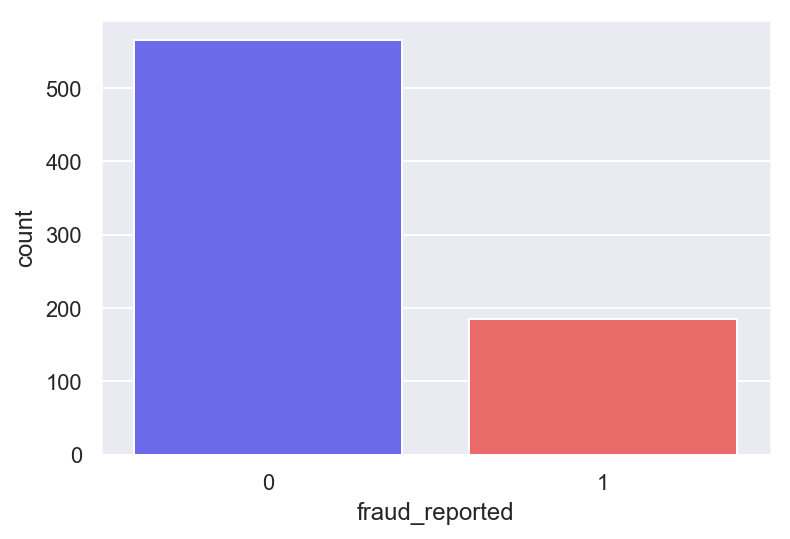

In [156]:
#dist of dv
sns.set()
sns.countplot(x=y_train, palette='seismic');

1    565
0    565
Name: fraud_reported, dtype: int64


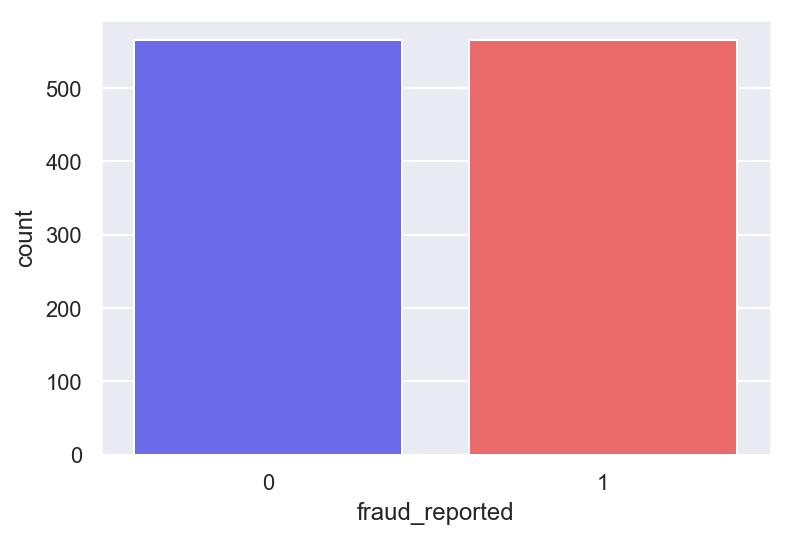

In [157]:
#SMOTE data for train set

oversample = SMOTE()
x_train, y_train = oversample.fit_resample(x_train, y_train)
print(y_train.value_counts())

sns.countplot(x=y_train, palette='seismic');

### Logistic regression

In [158]:
#ransearch log reg

lr = LogisticRegression(max_iter=200)

lr_values = {'solver': ['liblinear'],
            'penalty': ['l1', 'l2'],
            'C': np.logspace(-5, 5, 50),
            }

    
rs_lr2 = RandomizedSearchCV(lr, lr_values, cv=10, n_jobs = -1, random_state=42)
rs_lr2.fit(x_train, y_train)
print(rs_lr2.best_params_)

{'solver': 'liblinear', 'penalty': 'l1', 'C': 138.9495494373139}


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### KNN

In [159]:
# knn = KNeighborsClassifier()
# ss = StandardScaler()

knn_pipe = Pipeline([
    ("ss", StandardScaler()),
    ("knn", KNeighborsClassifier(n_jobs=-1))])

knn_values = {'knn__n_neighbors':[3,5,7,9,11],
              'knn__weights':['uniform', 'distance'],
              'knn__metric':['minkowski','euclidean','manhattan'],
              'knn__algorithm':['auto', 'ball_tree','kd_tree','brute'],
              'knn__leaf_size':[1,2,3,4,5,6,7,8,9,10]
             }

    
rs_knn2 = RandomizedSearchCV(knn_pipe, knn_values, cv=10, n_jobs = -1, random_state=42)
rs_knn2.fit(x_train, y_train)
print(rs_knn2.best_params_)

{'knn__weights': 'distance', 'knn__n_neighbors': 3, 'knn__metric': 'minkowski', 'knn__leaf_size': 5, 'knn__algorithm': 'auto'}


### Random forest

In [160]:
rf = RandomForestClassifier(n_jobs=-1)

rf_values = {'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
             'min_samples_leaf': [1, 2, 3, 4, 5],
             'min_samples_split': [2, 5, 7, 9, 11],
             'max_features': ['auto', 'sqrt'],
             'n_estimators': [150, 250, 350, 450, 500, 550, 600, 650],
             
              }


    
rs_rf2 = RandomizedSearchCV(rf, rf_values, cv=10, n_jobs = -1, random_state=42)
rs_rf2.fit(x_train, y_train)
print(rs_rf2.best_params_)

{'n_estimators': 500, 'min_samples_split': 7, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 30}


### XGBoost

In [161]:
xg = XGBClassifier(booster='gbtree', n_jobs=-1)

xg_values = {'max_depth': [3, 4, 5, 6],
             'eta': [0.05, 0.1, 0.15, 0.3],
             'reg_lambda': [0.01, 0.05, 0.1, 0.5, 1],
             'reg_alpha': [0.01, 0.05, 0.1, 0.5, 1],
             'gamma': [0, 1, 2, 3],
             'n_estimators': [150, 250, 350, 450, 500, 550, 600, 650],
             
              }


    
rs_xg2 = RandomizedSearchCV(xg, xg_values, cv=10, n_jobs = -1, random_state=42)
rs_xg2.fit(x_train, y_train)
print(rs_xg2.best_params_)

{'reg_lambda': 0.05, 'reg_alpha': 0.5, 'n_estimators': 350, 'max_depth': 5, 'gamma': 0, 'eta': 0.05}


### AdaBoost

In [162]:
ab = AdaBoostClassifier()

ab_values = {'n_estimators':[50,100,150,200,250,300,350,400,450,500,550,600],
            'learning_rate':[0.05,0.1,0.3,0.5]
              }


    
rs_ab2 = RandomizedSearchCV(ab, ab_values, cv=10, n_jobs = -1, random_state=42)
rs_ab2.fit(x_train, y_train)
print(rs_ab2.best_params_)

{'n_estimators': 200, 'learning_rate': 0.3}


In [163]:
classifiers2={'logreg2':rs_lr2, 'knn2':rs_knn2, 'Ranfor2':rs_rf2, 
             'XGB2':rs_xg2, 'AdaBoost2':rs_ab2} 

for key, value in classifiers2.items(): 
    print(scores(value,key))
    print("________________")
    print(" ")

logreg2 classification metric
CV scores: 0.827
train score: 0.883
test score: 0.708
Sensitivity: 0.403
Specificity: 0.809
Precision: 0.41
F1: 0.407
ROC AUC Score: 0.635
None
________________
 
knn2 classification metric
CV scores: 0.518
train score: 1.0
test score: 0.292
Sensitivity: 0.952
Specificity: 0.074
Precision: 0.253
F1: 0.4
ROC AUC Score: 0.561
None
________________
 
Ranfor2 classification metric
CV scores: 0.858
train score: 0.997
test score: 0.784
Sensitivity: 0.468
Specificity: 0.888
Precision: 0.58
F1: 0.518
ROC AUC Score: 0.804
None
________________
 
XGB2 classification metric
CV scores: 0.878
train score: 1.0
test score: 0.816
Sensitivity: 0.532
Specificity: 0.91
Precision: 0.66
F1: 0.589
ROC AUC Score: 0.828
None
________________
 
AdaBoost2 classification metric
CV scores: 0.863
train score: 0.928
test score: 0.776
Sensitivity: 0.516
Specificity: 0.862
Precision: 0.552
F1: 0.533
ROC AUC Score: 0.803
None
________________
 


### 3. Modeling with Oversampling using ADASYN

ADASYN does is same as SMOTE just with a minor improvement. After creating those sample, it adds a random small value to the points thus making it more realistic. In other words, instead of all the sample being linearly correlated to the parent they have a little more variance and noise in them and are a bit scattered. ADASYN over sampling was done only to the training set. After ADASYN, both fraud and non-fraud have 565 samples in the training set. The five classifiers were running on the ADASYN data set, with hyperparameter tuning.

In [164]:
#have to redefine since the smote has already altered the data

x = df_dummied.drop('fraud_reported', axis=1)
y = df_dummied['fraud_reported']

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=42)

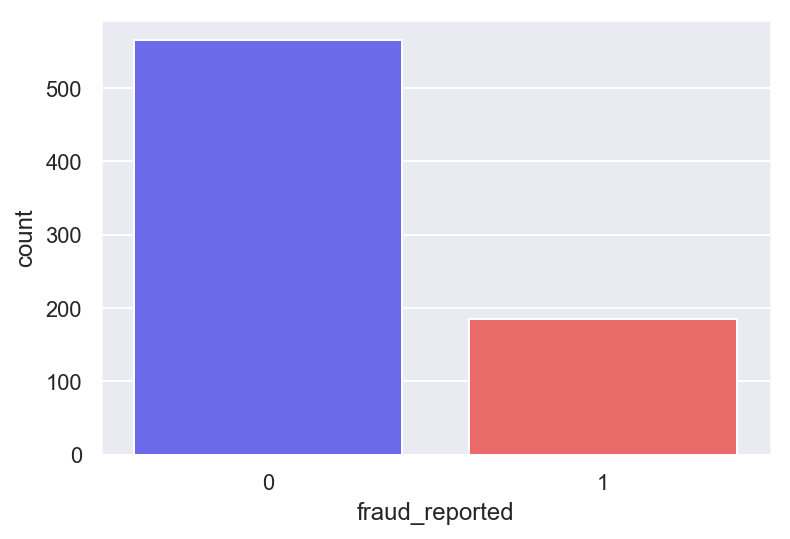

In [165]:
#dist of dv
sns.countplot(x=y_train, palette='seismic');

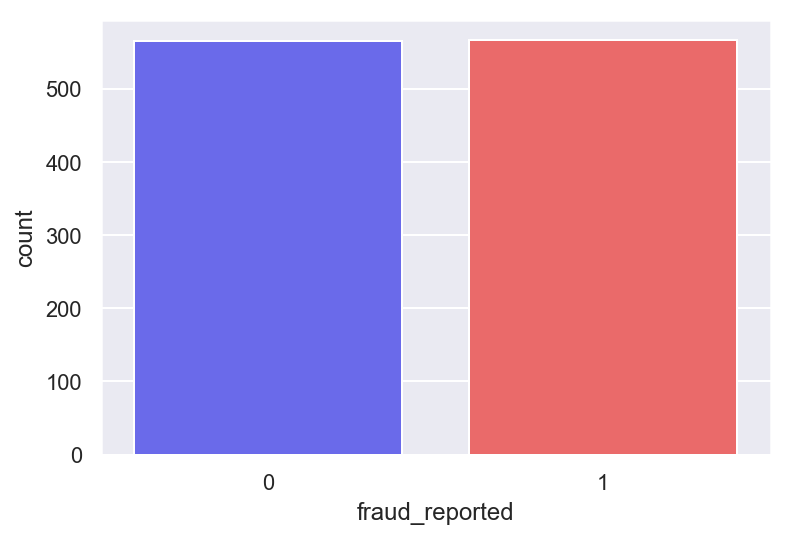

In [166]:
#adasyn data for train set

oversample = ADASYN()
x_train, y_train = oversample.fit_resample(x_train, y_train)
sns.countplot(x=y_train, palette='seismic');

### Logistic regression

In [167]:
#ransearch log reg

lr = LogisticRegression(max_iter=200)

lr_values = {'solver': ['liblinear'],
            'penalty': ['l1', 'l2'],
            'C': np.logspace(-5, 5, 50),
            }

    
rs_lr4 = RandomizedSearchCV(lr, lr_values, cv=10, n_jobs = -1, random_state=42)
rs_lr4.fit(x_train, y_train)
print(rs_lr4.best_params_)

{'solver': 'liblinear', 'penalty': 'l1', 'C': 138.9495494373139}


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### KNN

In [168]:
# knn = KNeighborsClassifier()
# ss = StandardScaler()

knn_pipe = Pipeline([
    ("ss", StandardScaler()),
    ("knn", KNeighborsClassifier(n_jobs=-1))])

knn_values = {'knn__n_neighbors':[3,5,7,9,11],
              'knn__weights':['uniform', 'distance'],
              'knn__metric':['minkowski','euclidean','manhattan'],
              'knn__algorithm':['auto', 'ball_tree','kd_tree','brute'],
              'knn__leaf_size':[1,2,3,4,5,6,7,8,9,10]
             }

    
rs_knn4 = RandomizedSearchCV(knn_pipe, knn_values, cv=10, n_jobs = -1, random_state=42)
rs_knn4.fit(x_train, y_train)
print(rs_knn4.best_params_)

{'knn__weights': 'distance', 'knn__n_neighbors': 3, 'knn__metric': 'minkowski', 'knn__leaf_size': 5, 'knn__algorithm': 'auto'}


### Random forest

In [169]:
rf = RandomForestClassifier(n_jobs=-1)

rf_values = {'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
             'min_samples_leaf': [1, 2, 3, 4, 5],
             'min_samples_split': [2, 5, 7, 9, 11],
             'max_features': ['auto', 'sqrt'],
             'n_estimators': [150, 250, 350, 450, 500, 550, 600, 650],
              }


rs_rf4 = RandomizedSearchCV(rf, rf_values, cv=10, n_jobs = -1, random_state=42)
rs_rf4.fit(x_train, y_train)
print(rs_rf4.best_params_)

{'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 90}


### XGBoostm

In [171]:
xg = XGBClassifier(booster='gbtree', n_jobs=-1)

xg_values = {'max_depth': [3, 4, 5, 6],
             'eta': [0.05, 0.1, 0.15, 0.3],
             'reg_lambda': [0.01, 0.05, 0.1, 0.5, 1],
             'reg_alpha': [0.01, 0.05, 0.1, 0.5, 1],
             'gamma': [0, 1, 2, 3],
             'n_estimators': [150, 250, 350, 450, 500, 550, 600, 650],
             
              }


    
rs_xg4 = RandomizedSearchCV(xg, xg_values, cv=10, n_jobs = -1, random_state=42)
rs_xg4.fit(x_train, y_train)
print(rs_xg4.best_params_)

{'reg_lambda': 0.05, 'reg_alpha': 0.5, 'n_estimators': 350, 'max_depth': 5, 'gamma': 0, 'eta': 0.05}


### AdaBoost

In [172]:
ab = AdaBoostClassifier()

ab_values = {'n_estimators':[50,100,150,200,250,300,350,400,450,500,550,600],
            'learning_rate':[0.05,0.1,0.3,0.5]
              }


    
rs_ab4 = RandomizedSearchCV(ab, ab_values, cv=10, n_jobs = -1, random_state=42)
rs_ab4.fit(x_train, y_train)
print(rs_ab4.best_params_)

{'n_estimators': 200, 'learning_rate': 0.3}


In [173]:
classifiers4={'logreg4':rs_lr4, 'knn4':rs_knn4, 'Ranfor4':rs_rf4, 
             'XGB4':rs_xg4, 'AdaBoost4':rs_ab4} 

for key, value in classifiers2.items(): 
    print(scores(value,key))
    print("________________")
    print(" ")

logreg2 classification metric
CV scores: 0.827
train score: 0.882
test score: 0.708
Sensitivity: 0.403
Specificity: 0.809
Precision: 0.41
F1: 0.407
ROC AUC Score: 0.635
None
________________
 
knn2 classification metric
CV scores: 0.518
train score: 1.0
test score: 0.292
Sensitivity: 0.952
Specificity: 0.074
Precision: 0.253
F1: 0.4
ROC AUC Score: 0.561
None
________________
 
Ranfor2 classification metric
CV scores: 0.858
train score: 0.99
test score: 0.784
Sensitivity: 0.468
Specificity: 0.888
Precision: 0.58
F1: 0.518
ROC AUC Score: 0.804
None
________________
 
XGB2 classification metric
CV scores: 0.878
train score: 0.998
test score: 0.816
Sensitivity: 0.532
Specificity: 0.91
Precision: 0.66
F1: 0.589
ROC AUC Score: 0.828
None
________________
 
AdaBoost2 classification metric
CV scores: 0.863
train score: 0.925
test score: 0.776
Sensitivity: 0.516
Specificity: 0.862
Precision: 0.552
F1: 0.533
ROC AUC Score: 0.803
None
________________
 


### 4. Modeling with Oversampling using bootstrapping

Unlike SMOTE or ADASYN, bootstrap draws from the already existing distribution and does not create synthetic data. Thus, data are simply repeating of existing and are perceived by many to be less biased. Bootstrap oversampling was conducted by randomly drawing from the existing fraud dataset with replacement until both fraud and non-frauds had the same sample size of 565. Bootstrap was only done on the training set. The five classifiers were running on the bootstrapped data set, with hyperparameter tuning.

In [174]:
#have to redefine since the smote has already altered the data

x = df_dummied.drop('fraud_reported', axis=1)
y = df_dummied['fraud_reported']

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=42)

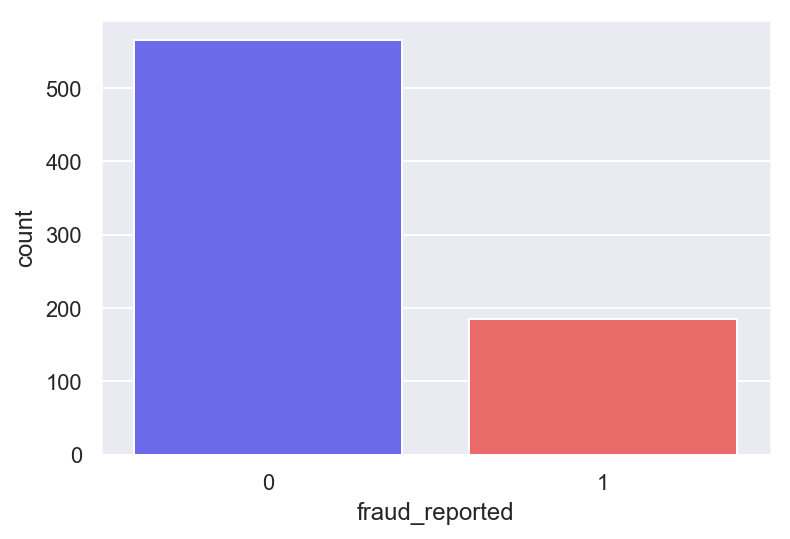

In [175]:
#dist of dv
sns.countplot(x=y_train, palette='seismic');

565 185


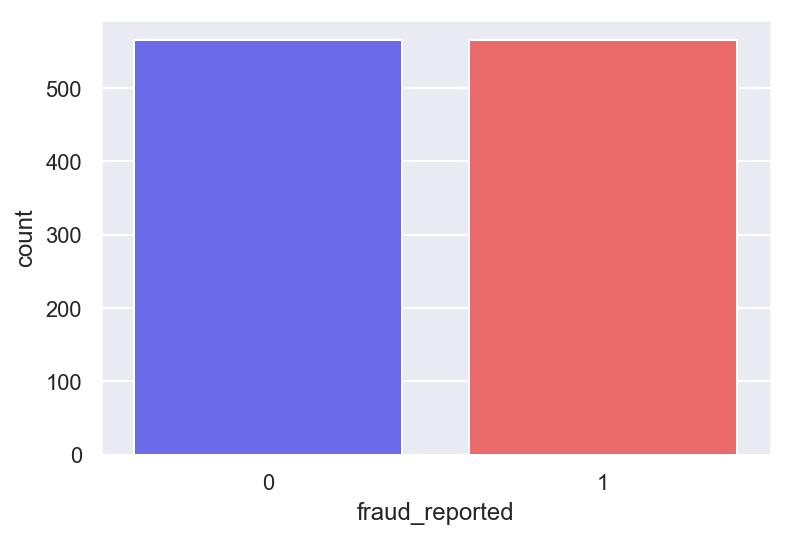

In [176]:
df = pd.concat([x_train, y_train], axis=1)

#count class
count_class_0, count_class_1 = df['fraud_reported'].value_counts()
print(count_class_0, count_class_1)

# Divide by class
df_class_0 = df[df['fraud_reported'] == 0]
df_class_1 = df[df['fraud_reported'] == 1]

#bootstrap into a new df
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_over = pd.concat([df_class_0, df_class_1_over], axis=0)

#resplit them
x_train = df_over.drop(columns='fraud_reported')
y_train = df_over.fraud_reported

sns.countplot(x=y_train, palette='seismic');

### Logistic regression

In [177]:
#ransearch log reg

lr = LogisticRegression(max_iter=200)

lr_values = {'solver': ['liblinear'],
            'penalty': ['l1', 'l2'],
            'C': np.logspace(-5, 5, 50),
            
            }

    
rs_lr3 = RandomizedSearchCV(lr, lr_values, cv=10, n_jobs = -1, random_state=42)
rs_lr3.fit(x_train, y_train)
print(rs_lr3.best_params_)

{'solver': 'liblinear', 'penalty': 'l1', 'C': 1456.3484775012444}


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### KNN

In [178]:
# knn = KNeighborsClassifier()
# ss = StandardScaler()

knn_pipe = Pipeline([
    ("ss", StandardScaler()),
    ("knn", KNeighborsClassifier(n_jobs=-1))])

knn_values = {'knn__n_neighbors':[3,5,7,9,11],
              'knn__weights':['uniform', 'distance'],
              'knn__metric':['minkowski','euclidean','manhattan'],
              'knn__algorithm':['auto', 'ball_tree','kd_tree','brute'],
              'knn__leaf_size':[1,2,3,4,5,6,7,8,9,10]
             }

    
rs_knn3 = RandomizedSearchCV(knn_pipe, knn_values, cv=10, n_jobs = -1, random_state=42)
rs_knn3.fit(x_train, y_train)
print(rs_knn3.best_params_)

{'knn__weights': 'distance', 'knn__n_neighbors': 3, 'knn__metric': 'minkowski', 'knn__leaf_size': 5, 'knn__algorithm': 'auto'}


### Random forest

In [179]:
rf = RandomForestClassifier(n_jobs=-1)

rf_values = {'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
             'min_samples_leaf': [1, 2, 3, 4, 5],
             'min_samples_split': [2, 5, 7, 9, 11],
             'max_features': ['auto', 'sqrt'],
             'n_estimators': [150, 250, 350, 450, 500, 550, 600, 650],
             
              }


    
rs_rf3 = RandomizedSearchCV(rf, rf_values, cv=10, n_jobs = -1, random_state=42)
rs_rf3.fit(x_train, y_train)
print(rs_rf3.best_params_)

{'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 90}


### XGBoost

In [180]:
xg = XGBClassifier(booster='gbtree', n_jobs=-1)

xg_values = {'max_depth': [3, 4, 5, 6],
             'eta': [0.05, 0.1, 0.15, 0.3],
             'reg_lambda': [0.01, 0.05, 0.1, 0.5, 1],
             'reg_alpha': [0.01, 0.05, 0.1, 0.5, 1],
             'gamma': [0, 1, 2, 3],
             'n_estimators': [150, 250, 350, 450, 500, 550, 600, 650],
             
              }


    
rs_xg3 = RandomizedSearchCV(xg, xg_values, cv=10, n_jobs = -1, random_state=42)
rs_xg3.fit(x_train, y_train)
print(rs_xg3.best_params_)

{'reg_lambda': 0.01, 'reg_alpha': 0.1, 'n_estimators': 350, 'max_depth': 3, 'gamma': 1, 'eta': 0.05}


### AdaBoost

In [183]:
ab = AdaBoostClassifier()

ab_values = {'n_estimators':[50,100,150,200,250,300,350,400,450,500,550,600],
            'learning_rate':[0.05,0.1,0.3,0.5]
              }


    
rs_ab3 = RandomizedSearchCV(ab, ab_values, cv=10, n_jobs = -1, random_state=42)
rs_ab3.fit(x_train, y_train)
print(rs_ab3.best_params_)

{'n_estimators': 250, 'learning_rate': 0.5}


In [184]:
classifiers3={'logreg3':rs_lr3, 'knn3':rs_knn3, 'Ranfor3':rs_rf3, 
             'XGB3':rs_xg3, 'AdaBoost3':rs_ab3, }

for key, value in classifiers3.items(): 
    print(scores(value,key))
    print("_________________")
    print(" ")

logreg3 classification metric
CV scores: 0.724
train score: 0.79
test score: 0.64
Sensitivity: 0.532
Specificity: 0.676
Precision: 0.351
F1: 0.423
ROC AUC Score: 0.637
None
_________________
 
knn3 classification metric
CV scores: 0.821
train score: 1.0
test score: 0.632
Sensitivity: 0.532
Specificity: 0.665
Precision: 0.344
F1: 0.418
ROC AUC Score: 0.615
None
_________________
 
Ranfor3 classification metric
CV scores: 0.921
train score: 0.999
test score: 0.804
Sensitivity: 0.548
Specificity: 0.888
Precision: 0.618
F1: 0.581
ROC AUC Score: 0.83
None
_________________
 
XGB3 classification metric
CV scores: 0.934
train score: 0.988
test score: 0.812
Sensitivity: 0.629
Specificity: 0.872
Precision: 0.619
F1: 0.624
ROC AUC Score: 0.819
None
_________________
 
AdaBoost3 classification metric
CV scores: 0.895
train score: 0.954
test score: 0.772
Sensitivity: 0.613
Specificity: 0.824
Precision: 0.535
F1: 0.571
ROC AUC Score: 0.8
None
_________________
 


<h2> <font color='#4682B4'> Ensemble </font> </h2>

Ensemble models in machine learning combine the decisions from multiple models to improve the overall performance and stability of the predictions.

Before ensembling, correlations of the predictions were ran. XGB, Random forest and AdaBoost have high correlation, perhaps as they all are CARTs (classification and regression tress). Other than that, models seem to capture different aspects of the feature space, as shown by the small to average correlation (Pearson’s heuristics) of their predictions.


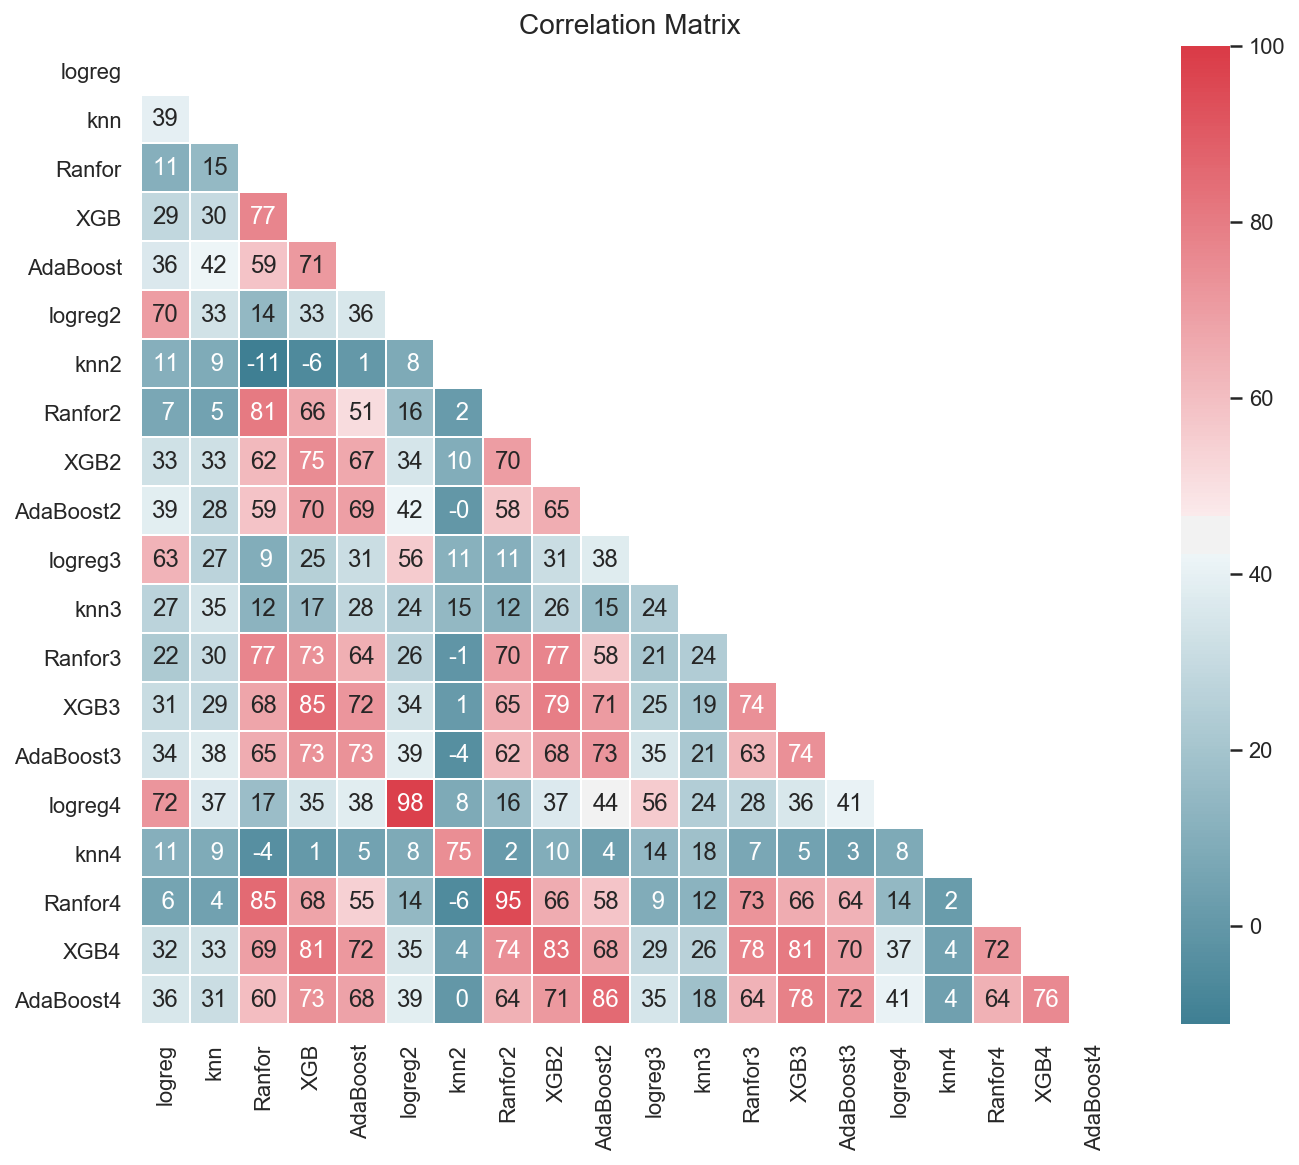

In [185]:
### see correlation of their predictions 

class_dict = {**classifiers, **classifiers2, **classifiers3, **classifiers4}

Pr = pd.DataFrame(columns=['logreg', 'knn', 'Ranfor', 'XGB', 'AdaBoost',
                           'logreg2', 'knn2', 'Ranfor2', 'XGB2', 'AdaBoost2',
                           'logreg3', 'knn3', 'Ranfor3', 'XGB3', 'AdaBoost3',
                           'logreg4', 'knn4', 'Ranfor4', 'XGB4', 'AdaBoost4'])

for key, value in class_dict.items():
    
    Pred = value.best_estimator_.predict(x_test)
    Pr[key] = Pred
    

sns.set_style("white")    
ax = corrmat(Pr.corr())

An ensemble may be able to outperform any single model by learning to combine their respective strength. However, the models we select for the ensemble should not be highly correlated. Else, our model will not be explaining unique variances and thus, unlikely to improve. The ensemble model will use the best logistic regression, KNN and the best of XGB, Random forest and AdaBoost (ensemble 3 model), based on F1 scores, from the models with class weighting, models with oversampling by SMOTE, ADASYN and Bootstrapping. 

The tree models selected are:
- Logistic regression with SMOTE (F1: 0.41)
- KNN with bootstrapping (F1: 0.42)
- Weighted XGBoost (F1: 0.72)

### 1. Max voting without oversampling 

The max voting method is generally used for classification problems. In this technique, multiple models are used to make predictions for each data point. The predictions by each model are considered as a ‘vote’. The predictions which we get from the majority of the models are used as the final prediction. The three selected models fitted together in a voting classifier. 

10-fold cross validation was performed with its mean scores printed, followed by computing of train and test accuracy scores. Then, the sensitivity, specificity, precision, F1 score and ROC AUC scores were computed. 


In [186]:
#have to redefine since the bootstap has already altered the data
x = df_dummied.drop('fraud_reported', axis=1)
y = df_dummied['fraud_reported']

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=42)

In [187]:
#fit best estimators into selected model
model_1 = rs_lr2.best_estimator_
model_2 = rs_knn3.best_estimator_
model_3= rs_xg.best_estimator_


In [188]:
model = VotingClassifier(estimators=[('lr', model_1), 
                                     ('knn', model_2), 
                                     ('xg', model_3),
                                    ], 
                         voting='soft')

model.fit(x_train,y_train)
print("fitted")

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


fitted


In [189]:
print("Max vote w oversampling")
kf=KFold(n_splits=10, shuffle=True, random_state=42)
print("cross val score:", round(cross_val_score(model, x_train, y_train, cv= kf).mean(),3))
print("train score:", round(model.score(x_train, y_train),3))
print("test score:", round(model.score(x_test, y_test),3))

#Evaluation metrics
predictions = model.predict(x_test)

TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

sensi = TP/(TP + FN)
speci= TN/(TN + FP)
preci = TP/(TP + FP)
f1= 2*(preci*sensi)/(preci+sensi)


# print("True Negatives: %s" % TN)
# print("False Positives: %s" % FP)
# print("False Negatives: %s" % FN)
# print("True Positives: %s" % TP)
# print('-----------------------')
print(f'Sensitivity: {round(sensi,3)}')
print(f'Specificity: {round(speci,3)}')
print(f'Precision: {round(preci,3)}')
print(f'F1: {round(f1,3)}')

pred_proba = [i[1] for i in model.predict_proba(x_test)]
auc_score = roc_auc_score(y_test, pred_proba) 
print('ROC AUC Score:', round(auc_score,3))

Max vote w oversampling


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

cross val score: 0.805
train score: 0.999
test score: 0.78
Sensitivity: 0.371
Specificity: 0.915
Precision: 0.59
F1: 0.455
ROC AUC Score: 0.804


### 2. Max voting with oversampling 

As bootstrapping in general produced the best F1 scores out of the other oversampling technique in this project, it was used here for the max voting ensemble. After the training set was bootstrapped, the process is the same as the max voting without oversampling

In [190]:
#have to redefine since the bootstap has already altered the data

x = df_dummied.drop('fraud_reported', axis=1)
y = df_dummied['fraud_reported']

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=42)

565 185


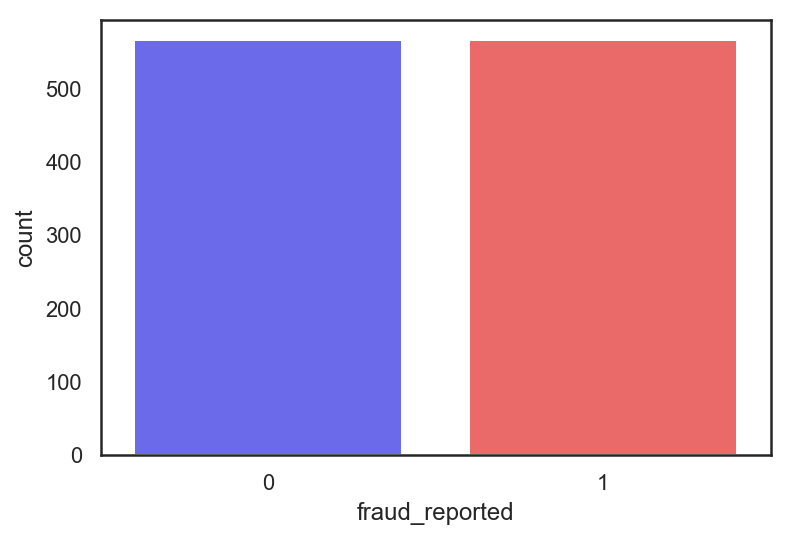

In [191]:
df = pd.concat([x_train, y_train], axis=1)

#count class
count_class_0, count_class_1 = df['fraud_reported'].value_counts()
print(count_class_0, count_class_1)

# Divide by class
df_class_0 = df[df['fraud_reported'] == 0]
df_class_1 = df[df['fraud_reported'] == 1]

#bootstrap into a new df
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_over = pd.concat([df_class_0, df_class_1_over], axis=0)

#resplit them
x_train = df_over.drop(columns='fraud_reported')
y_train = df_over.fraud_reported

sns.countplot(x=y_train, palette='seismic');

In [192]:
#best estimator
model_1 = rs_lr3.best_estimator_
model_2 = rs_knn3.best_estimator_
model_3= rs_xg.best_estimator_

In [193]:
#soft’, predicts the class label based on the argmax of the sums of the predicted probabilities, 


model_mv2 = VotingClassifier(estimators=[('lr', model_1), 
                                     ('knn', model_2), 
                                     ('xg', model_3),
                                    ], 
                         voting='soft')

model_mv2.fit(x_train,y_train)
print("fitted")

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


fitted


In [194]:
print("Max vote w oversampling")
kf=KFold(n_splits=10, shuffle=True, random_state=42)
print("cross val score:", round(cross_val_score(model_mv2, x_train, y_train, cv= kf).mean(),3))
print("train score:", round(model_mv2.score(x_train, y_train),3))
print("test score:", round(model_mv2.score(x_test, y_test),3))

#Evaluation metrics
predictions = model_mv2.predict(x_test)

TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

sensi = TP/(TP + FN)
speci= TN/(TN + FP)
preci = TP/(TP + FP)
f1= 2*(preci*sensi)/(preci+sensi)

print(f'Sensitivity: {round(sensi,3)}')
print(f'Specificity: {round(speci,3)}')
print(f'Precision: {round(preci,3)}')
print(f'F1: {round(f1,3)}')

pred_proba = [i[1] for i in model_mv2.predict_proba(x_test)]
auc_score = roc_auc_score(y_test, pred_proba) 
print('ROC AUC Score:', round(auc_score,3))

Max vote w oversampling


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

cross val score: 0.903
train score: 0.995
test score: 0.756
Sensitivity: 0.565
Specificity: 0.819
Precision: 0.507
F1: 0.534
ROC AUC Score: 0.792


### 3. Blending without oversampling

In the first step of the blending method, the training set is broken down into 2 parts, a new training set and a holdout set called validation set by a ratio of 75:25 respectively. The blending method fits the 3 selected model onto the new training set and make predictions on the validation and test set concurrently. The 3 different prediction of the validation set is stacked into one long column. Same is done for the predictions of the test set. A meta model, logistic regression in this case, is then fitted on the stacked validation predictions and scored on the stacked test predictions.

<br>
<details><summary>Here is an illustration of what I did for my blending ensemble:</summary>

![](images/figen.PNG)
    
</details>



10-fold cross validation was performed with its mean scores printed, followed by computing of train and test accuracy scores. Then, the sensitivity, specificity, precision, F1 score and ROC AUC scores were computed. 

<br>
<details><summary>More about Blending </summary>
The simplest kind of ensemble is the unweighted average of the predictions of the models that form a model library. For example, if a model library includes three models for an interval target (as shown in the following figure), the unweighted average would entail dividing the sum of the predicted values of the three candidate models by three. In an unweighted average, each model takes the same weight when an ensemble model is built.

More generally, you can think about using weighted averages. For example, you might believe that some of the models are better or more accurate and you want to manually assign higher weights to them. But an even better approach might be to estimate these weights more intelligently by using another layer of learning algorithm. This approach is called model stacking or blending.
    
This second-layer algorithm is trained to optimally combine the model predictions to form a new set of predictions. For example, when linear regression is used as second-layer modeling, it estimates these weights by minimizing the least square errors. 
    
Blending is a word introduced by the Netflix competition winners. It is closely related to stacked generalization, but simpler and less risk of an information leak. 

Some researchers and data scientist use “stacked ensembling” and “blending” interchangeably. With blending, instead of creating out-of-fold predictions for the train set, you create a small holdout set of the training set. Predictions are then used as features and a meta-model, usually a linear model, is used to make the final and actual scoring and predictions. The meta-model used in this model is a logistic regression. 

Blending has a few benefits:
- Simpler than stacking.
- Wards against an information leak: The generalizers and stackers use different data.
- You do not need to share a seed for stratified folds with your teammates. 

The cons are:
- You use less data overall, compared to stacking.
- Final model usually overfits to the holdout set.

</details>

In [196]:
x = df_dummied.drop('fraud_reported', axis=1)
y = df_dummied['fraud_reported']

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=42)

In [197]:
x_train_2, x_val, y_train_2, y_val = train_test_split(x_train, y_train, stratify=y_train, random_state=42)

In [198]:
#model has been fitted above
model_1 = rs_lr3.best_estimator_
model_2 = rs_knn3.best_estimator_
model_3= rs_xg.best_estimator_

#make predictions for each val data 
pred_1 = model_1.predict(x_val)
pred_2 = model_2.predict(x_val)
pred_3 = model_3.predict(x_val)


#make predictions for test data
test_pred_1 = model_1.predict(x_test)
test_pred_2 = model_2.predict(x_test)
test_pred_3 = model_3.predict(x_test)


#form a new dataset for validation and test via stacking the prediction
stack_preds = np.column_stack((pred_1, pred_2, pred_3))

stack_test_preds = np.column_stack((test_pred_1, test_pred_2, test_pred_3))


In [199]:
#specify meta model
meta_model = LogisticRegression()

lr_values = {'solver': ['liblinear'],
               'penalty': ['l1', 'l2'],
               'C': np.logspace(-10, 10, 100)}
              
    
meta_rs = RandomizedSearchCV(meta_model, lr_values, cv=10, n_jobs = -1, random_state=42)
meta_rs.fit(stack_preds, y_val)
print(meta_rs.best_params_)

{'solver': 'liblinear', 'penalty': 'l2', 'C': 0.31257158496882353}


In [200]:
#Evaluation metrics
best_meta = meta_rs.best_estimator_
predictions = best_meta.predict(stack_test_preds)

print("Stack Ensemble w/o oversampling")
kf=KFold(n_splits=10, shuffle=True, random_state=42)
print("cross val score:", cross_val_score(best_meta, stack_preds, y_val, cv= kf).mean())
print("val score:", best_meta.score(stack_preds, y_val))
print("test score:", best_meta.score(stack_test_preds, y_test))

TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

sensi = TP/(TP + FN)
speci= TN/(TN + FP)
preci = TP/(TP + FP)
f1= 2*(preci*sensi)/(preci+sensi)

print(f'Sensitivity: {round(sensi,3)}')
print(f'Specificity: {round(speci,3)}')
print(f'Precision: {round(preci,3)}')
print(f'F1: {round(f1,3)}')

pred_proba = [i[1] for i in meta_rs.predict_proba(stack_test_preds)]
auc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC Score:', auc_score)

Stack Ensemble w/o oversampling
cross val score: 1.0
val score: 1.0
test score: 0.756
Sensitivity: 0.484
Specificity: 0.846
Precision: 0.508
F1: 0.496
ROC AUC Score: 0.7556623198352781


### 4. Blending with oversampling

As bootstrapping in general produced the best F1 scores out of the other oversampling technique in this project, it was used here for the blending ensemble. After the training set was bootstrapped, the process is the same as the blending ensemble without oversampling

In [201]:
x = df_dummied.drop('fraud_reported', axis=1)
y = df_dummied['fraud_reported']

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=42)

565 185


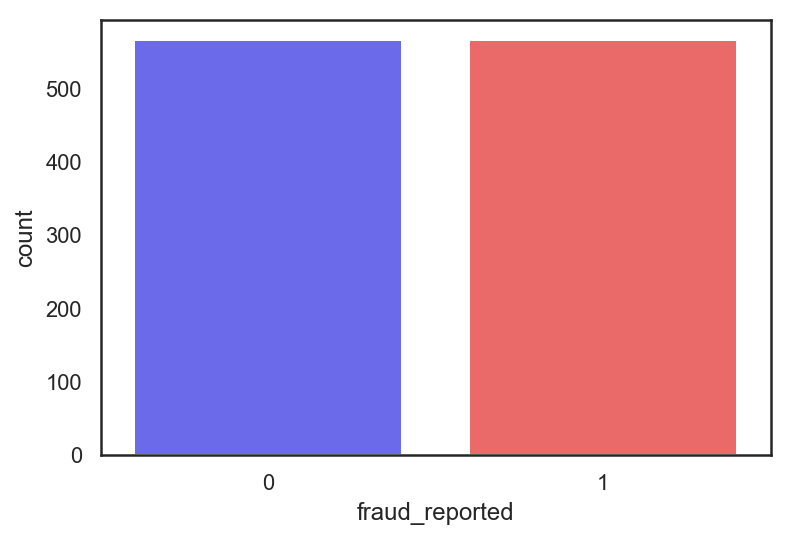

In [202]:
df = pd.concat([x_train, y_train], axis=1)

#count class
count_class_0, count_class_1 = df['fraud_reported'].value_counts()
print(count_class_0, count_class_1)

# Divide by class
df_class_0 = df[df['fraud_reported'] == 0]
df_class_1 = df[df['fraud_reported'] == 1]

#bootstrap into a new df
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_over = pd.concat([df_class_0, df_class_1_over], axis=0)

#resplit them
x_train = df_over.drop(columns='fraud_reported')
y_train = df_over.fraud_reported

sns.countplot(x=y_train, palette='seismic');

In [203]:
x_train_2, x_val, y_train_2, y_val = train_test_split(x_train, y_train, stratify=y_train, random_state=42)

In [204]:
#model has been fitted above
model_1 = rs_lr3.best_estimator_
model_2 = rs_knn3.best_estimator_
model_3= rs_xg.best_estimator_

#make predictions for each val data 
pred_1 = model_1.predict(x_val)
pred_2 = model_2.predict(x_val)
pred_3 = model_3.predict(x_val)


#make predictions for test data
test_pred_1 = model_1.predict(x_test)
test_pred_2 = model_2.predict(x_test)
test_pred_3 = model_3.predict(x_test)


#form a new dataset for validationa and test via stacking the prediction
stack_preds = np.column_stack((pred_1, pred_2, pred_3))

stack_test_preds = np.column_stack((test_pred_1, test_pred_2, test_pred_3))

In [205]:
#specify meta model
meta_model = LogisticRegression()

lr_values = {'solver': ['liblinear'],
               'penalty': ['l1', 'l2'],
               'C': np.logspace(-10, 10, 100)}
              


    
meta_rs = RandomizedSearchCV(meta_model, lr_values, cv=10, n_jobs = -1, random_state=42)
meta_rs.fit(stack_preds, y_val)
print(meta_rs.best_params_)

{'solver': 'liblinear', 'penalty': 'l1', 'C': 911162.7561154868}


In [206]:
#Evaluation metrics
best_meta = meta_rs.best_estimator_
predictions = best_meta.predict(stack_test_preds)

print("Stack Ensemble w oversampling")
kf=KFold(n_splits=10, shuffle=True, random_state=42)
print("cross val score:", cross_val_score(best_meta, stack_preds, y_val, cv= kf).mean())
print("val score:", best_meta.score(stack_preds, y_val))
print("test score:", best_meta.score(stack_test_preds, y_test))

TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

sensi = TP/(TP + FN)
speci= TN/(TN + FP)
preci = TP/(TP + FP)
f1= 2*(preci*sensi)/(preci+sensi)


# print("True Negatives: %s" % TN)
# print("False Positives: %s" % FP)
# print("False Negatives: %s" % FN)
# print("True Positives: %s" % TP)
# print('-----------------------')
print(f'Sensitivity: {round(sensi,3)}')
print(f'Specificity: {round(speci,3)}')
print(f'Precision: {round(preci,3)}')
print(f'F1: {round(f1,3)}')

pred_proba = [i[1] for i in meta_rs.predict_proba(stack_test_preds)]
auc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC Score:', auc_score)

Stack Ensemble w oversampling
cross val score: 0.9751231527093596
val score: 0.9858657243816255
test score: 0.644
Sensitivity: 0.758
Specificity: 0.606
Precision: 0.388
F1: 0.514
ROC AUC Score: 0.762783115991764


<h2> <font color='#4682B4'> Evaluation </font> </h2>

Cross validation accuracy scores, accuracy scores on training set, accuracy scores on test set, sensitivity, specificity, precision, F1 score and ROC AUC was computed and printed as shown in the table below. 

**Observations:**

- Comparing across models that were fitted on no oversampling dataset, on SMOTE dataset, on ADASYN dataset and on bootstrapped dataset, I picked the best logistic regression, KNN and CART model.
- The best logistic regression model was the one trained on the SMOTE dataset. It had a F1 score of 0.41 and an AUC of 0.64
- The best KNN model was the one trained on the bootstrap dataset. It had a F1 score of 0.42 and an AUC of 0.60. 
- CARTs performed very well on this data set. However, since CARTs' predictions are all highly correlated, the best of them were selected. The best CART model was the weighted XGBoost on the dataset with no oversampling. It yields a F1 score of 0.72 and an AUC of 0.84.
- Overall, the bootstrapping method seem to have the best F1 scores when compared to the other oversampling methods. 
- The max voting model that was trained on the bootstrapped dataset performed the best out of all ensemble models with an F1 score of 0.55 and an AUC of 0.77. 
- The ensemble models did not perform better than the weighted XGBoost on the dataset with no oversampling. This may be because the difference in scores of the XGBoost and the 2 other selected model were big, and its scores were already high. The other 2 models had much lower F1 and AUC scores and thus may have hindered performance of the ensemble. Ensemble models may perform better when all models perform averagely well instead.

![](images/e1.PNG)

![](images/e2.PNG)

## Final Model: Weighted XGBoost

The final fitted model is the weighted XGBoost on the dataset with no oversampling. The best estimators of the model are as follows:

- Scale_pos_weight: 3.054054054054054, 
- Reg_lambda (L2 regularization weight): 0.1, 
- Reg_alpha (L1 regularization weight): 0.05, 
- N_estimators: 550, 
- Max_depth: 6, 
- Gamma: 3, 
- Eta: 0.05

<br>
<details><summary>More information on XGBoost</summary>

XGBoost stands for extreme gradient boost.
XGBoost is a form of gradient boosted CART.

The Gradient Boosting algorithm involves three elements:

- A loss function to be optimized, such as cross entropy for classification or mean squared error for regression problems.
- A weak learner to make predictions, such as a greedily constructed decision tree.
- An additive model used to add weak learners to minimize the loss function.

Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models. It builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function. 

It optimizes a cost function over function space by iteratively choosing a function (weak hypothesis) that points in the negative gradient direction. Small steps towards the right direction make gradient boosting accurate and generalizable. 

XGBoost is an implementation of gradient boosted decision trees designed for speed and performance and allows for L1 and L2 (or both) regularization. 

More information about these parameters can be found at: iihttps://xgboost.readthedocs.io/en/latest/parameter.html

More information on XGBoost can be found in Tianqi Chen's (main author of XGB) lecture: https://www.youtube.com/watch?v=Vly8xGnNiWs&feature=emb_logo

</details>


In [207]:
x = df_dummied.drop('fraud_reported', axis=1)
y = df_dummied['fraud_reported']

In [208]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=42)

In [209]:
print("Final Model: Weighted XGBoost")
print("train score:", round(rs_xg.best_estimator_.score(x_train, y_train),3))
print("test score:", round(rs_xg.best_estimator_.score(x_test, y_test),3))


Final Model: Weighted XGBoost
train score: 0.967
test score: 0.844


<h2> <font color='#4682B4'> Final fitted model's performance </font> </h2>

The model had a training accuracy score of 0.967 and a test accuracy of 0.844. The high accuracy score hint of a low bias (it is only a hint as accuracy is not a good measure of bias in imbalance class problems).
An accuracy score difference of 0.123 between train and test is relatively small. Thus, this model can be said to have low variance and is generalizable on unseen data. 

The number of cases for each class of the test set is shown in the confusion matrix below. The y-axis shows the actual classes while the x-axis shows the predicted classes. 
- True negative refers to non-fraud cases that are classified as non-fraud cases (161 cases, which makes up 64.40% of the test set's size).
- True positive refers to fraud cases that are correctly classified as fraud cases (50 cases, which makes up 20.00% of the test set's size).
- False negative are fraud cases that are classified as non-fraud cases (12 cases, which makes up 4.80% of the test set's size).
- False positive are non-fraud cases that are classified as fraud cases (27 cases, which makes up 10.80% of the test set's size). 

Percentage out of total sample size of the test set is printed on each quadrant. 

#confusion matrix
predictions = rs_xg.best_estimator_.predict(x_test)
cf_matrix = confusion_matrix(y_test, predictions)

#labels for the inside of heatmap
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['n={0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

#put them next line
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

#in array 2,2 cos the heatmap will be 2,2
labels = np.asarray(labels).reshape(2,2)

#class labeling
yticklabels=['Not Fraud','Fraud']
xticklabels=['Predicted as\nNot Fraud','Predicted as\nFraud']


### Set the default matplotlib figure size to 7x7:
fix, ax = plt.subplots(figsize=(6,5))

### Plot the heatmap with seaborn.
### Assign the matplotlib axis the function returns. This will let us resize the labels.
sns.set()
ax = sns.heatmap(cf_matrix, annot=labels, 
            xticklabels = xticklabels, yticklabels = yticklabels, 
            fmt='', cmap='Blues');

### Resize the labels.
ax.set_title('Confusion matrix', fontsize=15,  fontweight='bold')
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=11, ha= 'center', rotation=0 )
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=11, va="center", rotation=0);

The summary of the classification report is presented below. 


- Sensitivity (recall of fraud cases) is derived from:
    - True positive/(True positive + False negative)
    - Sensitivity summarizes our true positive rate, which is how many we got correct out of all the positive cases.
    - Sensitivity for the final model is 81%.


- Specificity (recall of non-fraud cases) is derived from:
    - True negative/(True negative + False positive)
    - Specificity summarizes our true negative rate, which is how many we got correct out of all the negative cases.
    - Specificity for the final model is 86%


- Precision of fraud cases are derived from:
    - True positive/(True positive + False positive)
    - Precision of fraud cases summarize the accuracy of fraud cases detected. That is, out of all that I predicted as fraud, how many are correct.
    - Precision of fraud detection is 65%.


- Precision of non-fraud cases are derived from:
    - True negative/(True negative + False negative)
    - Precision of non-fraud cases summarize the accuracy of non-fraud cases detected. That is, out of all that I predicted as non-fraud, how many are correct. 
    - Precision of non-fraud detection is 93%.


- F1 scores are the harmonic mean of recall and precision and is derived from:
    - (2 x recall x precision)\(recall + precision)
    - As we are interested in fraud cases, only the F1 scores on fraud cases are reported. 
    - The F1 score of the model is 72%. 
    

In sum, the model has outperformed the baseline F1 scores by a huge margin. 


In [210]:
#classification report

predictions = rs_xg.best_estimator_.predict(x_test)
print(classification_report(y_test, predictions, target_names=['Not Fraud',"Fraud"]))


              precision    recall  f1-score   support

   Not Fraud       0.93      0.86      0.89       188
       Fraud       0.65      0.81      0.72        62

    accuracy                           0.84       250
   macro avg       0.79      0.83      0.81       250
weighted avg       0.86      0.84      0.85       250



The ROC curve below summarizes how well our model is at balancing between the true positive rate(sensitivity) and the false positive rate(1-specificity). Ideally, we want to have a 100% true positive rate of predicting fraud and a 100% true negative rate of predicting non-frauds (or a 0% false positive which is 100% - 100% true negative rate). This means we have perfect prediction for both classes. However, in imbalance class problems, this is extremely hard to achieve in the real world. On top of that, there is a trade of between the true positive rate and the true negative rate and conversely the false positive rate. 

This graph summarizes how well we can distinguish between two classes at each threshold of the true positive and false positive rate. The area under curve is used as a summary percentage of this metric. In sum, the model has outperformed the baseline ROC AUC scores by a huge margin. 

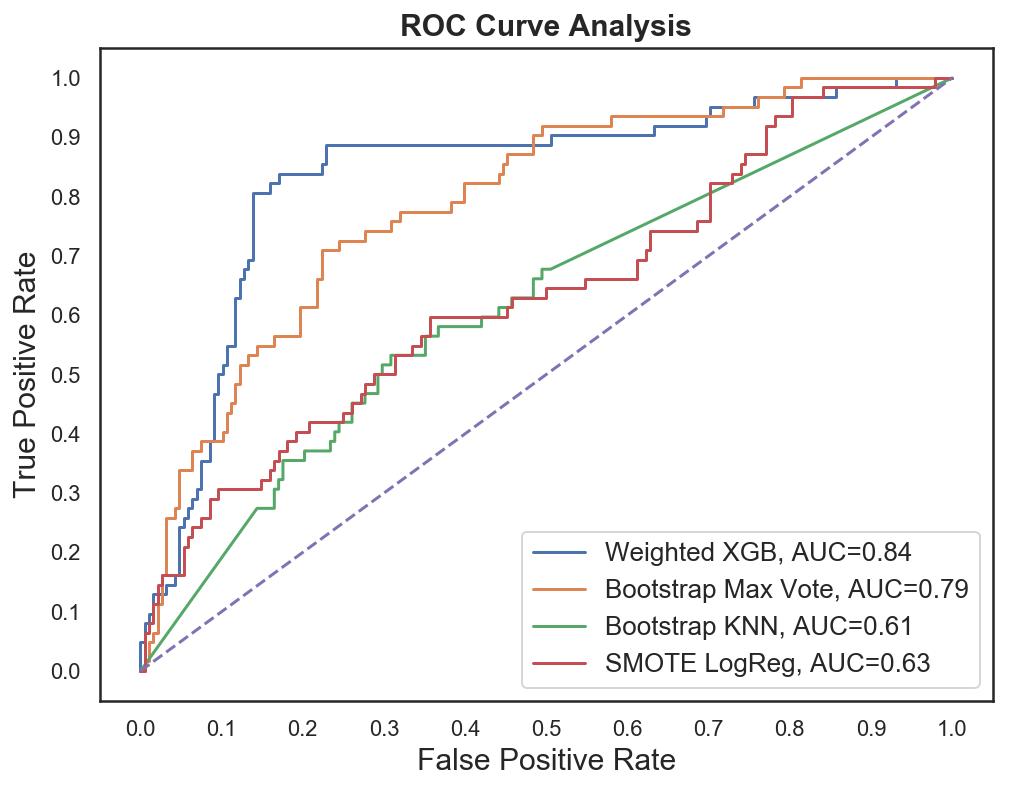

In [211]:
# Instantiate the classfiers and make a list
classifiers_name = [rs_xg.best_estimator_, 
                   model_mv2, 
                   rs_knn3.best_estimator_,
                   rs_lr2.best_estimator_]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers_name:
    yproba = cls.predict_proba(x_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table['names'] = ['Weighted XGB', 'Bootstrap Max Vote', 'Bootstrap KNN','SMOTE LogReg']
result_table.set_index('names', inplace=True)

#Plot the figure
fig = plt.figure(figsize=(8,6))

sns.set_style("white")

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.2f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='m', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

Although our model performed better in predicting non-fraud cases, the model has performed very well on fraud cases as well. We have a higher false alarm than frauds escaping the detection. It is better in our case to identify more frauds than to let fraud cases escape detection. Thus, this model has succeeded in its purpose to detect fraud claims. Unlike the baseline model that sacrifices too much resources into investigations and hinder customer experience, we are also able to balance this out in this model. We can detect more fraud and we are able to balance this with correct prediction of non-fraud cases. 

### Top features

Importance provides a score that indicates how useful or valuable each feature was in the construction of the boosted decision trees within the model. The more an attribute is used to make key decisions with decision trees, the higher its relative importance. This importance is calculated explicitly for each attribute in the dataset, allowing attributes to be ranked and compared to each other.

**Weight:**

The number of times a feature is used to split the data across all trees. The final measure, implemented exclusively in XGBoost, is counting the number of samples affected by the splits based on a feature.

The figure below summarizes the top 20 ranked by feature importance, based on weight. Drivers with hobbies such as chess, cross-fit seemed to be more prone to frauds. Incident severity and property claim are amongst the highest as well. Interaction terms such as premium and total claim amount, vehicle claim amount and incident severity were also top features by weight. 

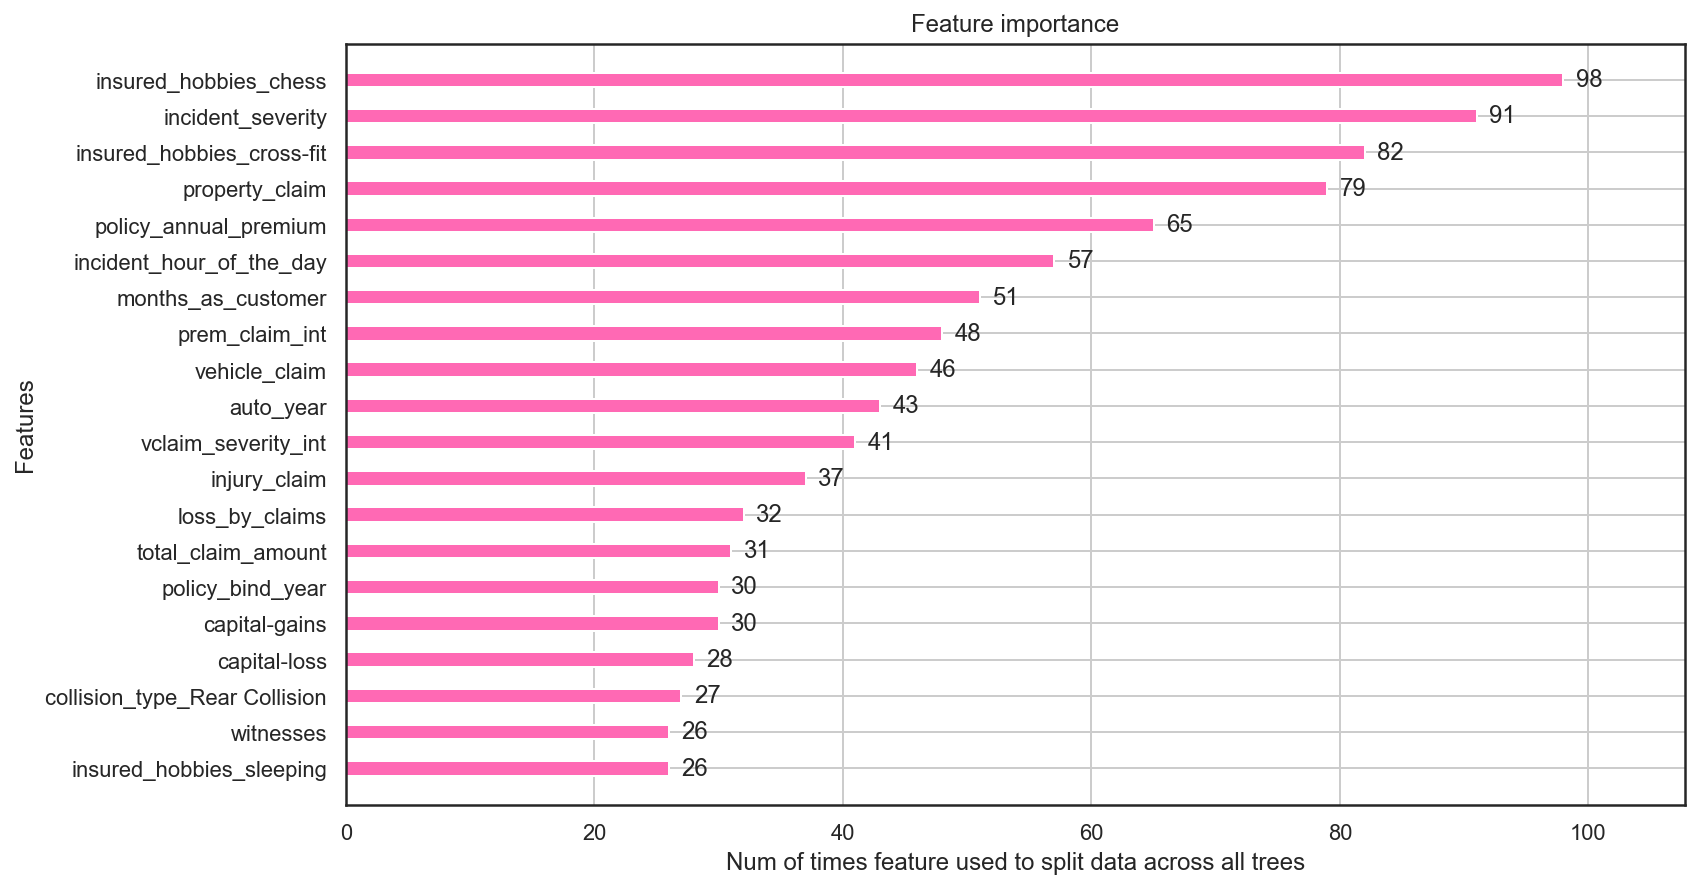

In [212]:
# plot feature importance

fig, ax = plt.subplots(figsize=(12, 7))
plot_importance(rs_xg.best_estimator_, importance_type='weight', 
                max_num_features=20, height=0.4, ax=ax, xlabel='Num of times feature used to split data across all trees',
               color='hotpink');


**Gain:**

It is sometimes called “Gini importance” or “mean decrease impurity” and is defined as the total decrease in node impurity (weighted by the probability of reaching that node (which is approximated by the proportion of samples reaching that node) averaged over all trees of the ensemble.

<br>
<details><summary>More information on mean decrease in impurity:</summary>

Gini Impurity measures how often a randomly chosen record from the data set used to train the model will be incorrectly labelled if it was randomly labelled according to the distribution of labels in the subset (e.g., if half of the records in a group are "A" and the other half of the records are "B", a record randomly labelled based on the composition of that group has a 50% chance of being labelled incorrectly). Gini Impurity reaches zero when all records in a group fall into a single category (i.e., if there is only one possible label in a group, a record will be given that label 100% of the time). This measure is essentially the probability of a new record being incorrectly classified at a given node in a Decision Tree, based on the training data.

Gini Importance can be leveraged to calculate Mean Decrease in Gini, which is a measure of variable importance for estimating a target variable. Mean Decrease in Gini is the average (mean) of a variable’s total decrease in node impurity, weighted by the proportion of samples reaching that node in each individual decision tree in the random forest. This is effectively a measure of how important a variable is for estimating the value of the target variable across all the trees that make up the forest. A higher Mean Decrease in Gini indicates higher variable importance.

The most important variables to the model will be highest in the plot and have the largest Mean Decrease in Gini Values, conversely, the least important variable will be lowest in the plot and have the smallest Mean Decrease in Gini values.
    
</details>

The figure below summarizes the top 20 ranked by feature importance, based on weight. Incident severity is once again amongst the most important. Hobbies such as chess and CrossFit are also amongst the top features when looking at mean decrease in impurity. Interaction terms such as total claims and incident severity are top features as well. 

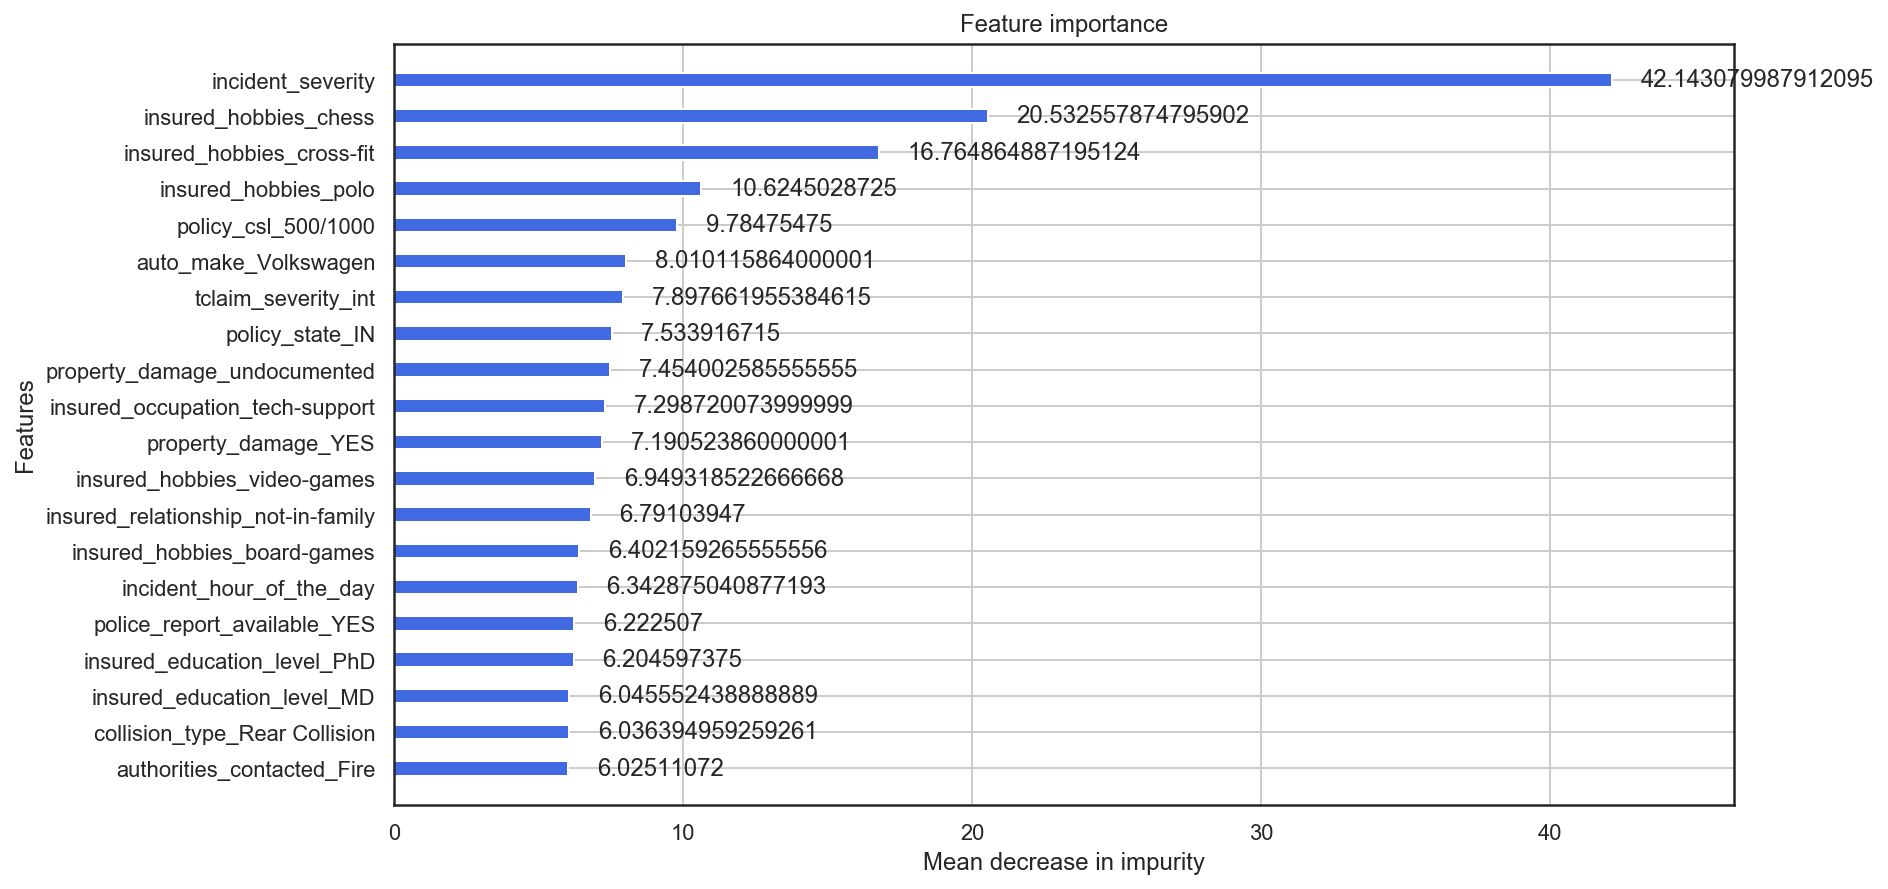

In [213]:
# plot feature importance
fig, ax = plt.subplots(figsize=(12, 7))
plot_importance(rs_xg.best_estimator_, importance_type='gain', 
                max_num_features=20, height=0.4, ax=ax, xlabel='Mean decrease in impurity', color='royalblue');

<h2> <font color='#4682B4'> Conclusion and Limitations </font> </h2>

Fraud accounted for between 15 percent and 17 percent of total claims payments for auto insurance bodily injury in 2012, according to an Insurance Research Council (IRC) study. The study estimated that between \\$5.6 billion and \\$7.7 billion was fraudulently added to paid claims for auto insurance bodily injury payments in 2012, compared with a range of \\$4.3 billion to \\$5.8 billion in 2002.

This project has built a model that can detect auto insurance fraud. In doing so, the model can reduces loses for insurance companies. The challenge behind fraud detection in machine learning is that frauds are far less common as compared to legit insurance claims. 

Five different classifiers were used in this project: logistic regression, K-nearest neighbours, Random forest, XGBoost, AdaBoost. Four different ways of handling imbalance classes were tested out with these five classifiers: model with class weighting and hyperparameter tuning, oversampling with SMOTE, oversampling with ADASYN and oversampling with bootstrapping. On top of that two max vote ensembles were built. One on the train set and one on the bootstrapped train set. Two blending ensembles were also performed. One on the train set and one on the bootstrapped train set as well. 

The best and final fitted model was a weighted XGBoost what yelled a F1 score of 0.72 and a ROC AUC of 0.84. The model performed far better than the baseline F1 score of 0.397 and ROC AUC target of 0.7. The model's F1 score and ROC AUC scores were the highest amongst the other models. In conclusion, the model was able to correctly distinguish between fraud claims and legit claims with high accuracy. 

The study is not without limitations. Firstly, this study is restricted by its small sample size. Statistical models are more stable when data sets are larger. It also generalizes better as it takes a bigger proportion of the actual population. Furthermore, the data only capture incident claims of 3 states from 01 January 2015 to 01 March 2015. This means that we do not know the proportion of auto insurance policy holder who had no incidents compared to those who had incidents. We are also restricted to incidents between 2 months which may not be an accurate picture of the year. This is important as certain time of the year may correlate to higher incident rates such as St. Patrick’s Day or other holidays. Future studies may investigate acquiring a larger data set with multiple years. However, due to the sensitive nature of fraud and confidential information tagged to such data, this may remain a challenge.
